# Part1 - Exploratory Data Analysis of Parkinson's Disease Detection through Voice technique

## Objective:
   ### To explore and analyse the data provided by following method:
   1. Reading the data.
   2. Cleansing the data
   3. Correlation analysis
   4. Linear Relationship analysis
   5. Plotting numeric variables
   6. Plotting Categorical variables
   7. Feature Importance
   8. Summary and Conclusion
   


## Introduction
Parkinson’s disease (PD) is a neurodegenerative disor- der of central nervous system that causes partial or full loss in motor reflexes, speech, behavior, mental processing, and other vital functions. In 1817, PD was described as “shaking palsy” by Doctor James Parkinson . It is generally observed in elderly people and causes disorders in speech and motor abil- ities (writing, balance, etc.) of 90% of the patients . Ensuing Alzheimer, PD is the second common neurological health prob- lem in elder ages and it is estimated that nearly 10 million people all around the world and approximately 100 000 in Turkey are suffering from this disease . Particularly, PD is generally seen in one out of every hundred people aged over 65. Currently, there is no known cure for the disease . Although, there is significant amount of drug therapies to decrease difficulties caused by the disorder, PD is usually diagnosed and treated using invasive methods . Therefore, this complicates the process of diagnosis and treatment of patients who are grieving from the disease.\
\
**Reference**:
Collection and Analysis of a Parkinson Speech Dataset With Multiple Types of Sound Recordings
Betul Erdogdu Sakar, M. Erdem Isenkul, C. Okan Sakar, Ahmet Sertbas, Fikret Gurgen, Sakir Delil, Hulya Apaydin, and Olcay Kursun.\
\
**IEEE JOURNAL OF BIOMEDICAL AND HEALTH INFORMATICS, VOL. 17, NO. 4, JULY 2013**

### Abbreviations
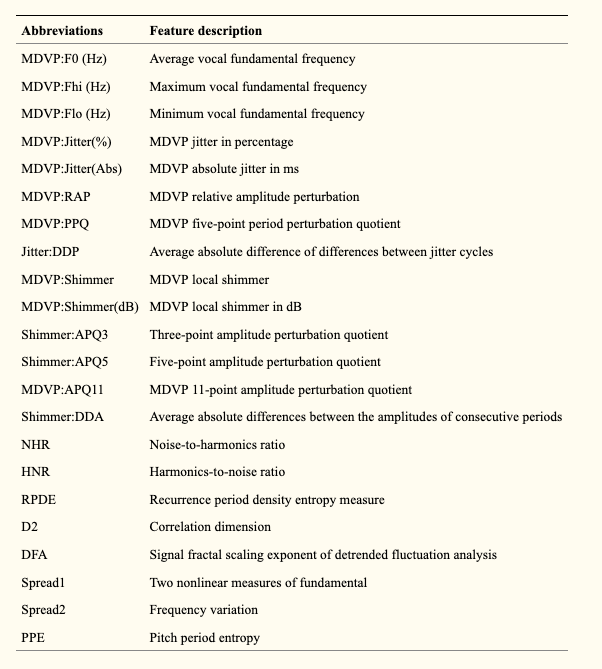
### References
1. https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5434464/
2. https://ieeexplore.ieee.org/document/6451090
3. https://ieeexplore.ieee.org/document/7176431

### (1) Importing Python libraries


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas_profiling import ProfileReport
import ipywidgets as widgets
import itertools
from scipy.stats import shapiro
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
import re
import random


from tqdm import tqdm
from IPython.display import clear_output
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)  


%matplotlib inline
plt.rcParams["figure.figsize"] = (15,10)
pd.set_option('display.max_colwidth', 500)

### (2) Reading the CSV File

In [2]:

df = pd.read_csv("Data - Parkinsons")
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.06545  0.02211  21.033       1  0.414783  0.815285 -4.813031   
1      0.09403  0.01929  19.085       1  0.458359  0.819521 -4.075192   
2      0.08270  0.01309  20.651       1  0.429895  0.825288 -4.443179   
3      0.08771  0.01353  20.644       1  0.434969  0.819235 -4.117501   
4      0.10470  0.01767  19.649       1  0.417356  0.823484 -3.747787   

    spread2        D2       PPE  
0  0.266482  2.301442  0.284654  
1  0.335590  2.486855  0.368674  
2  0.311173  2.342259  0.332634  
3  0.334147  2.405554  0.368975  
4  0.234513  2.332180  0.410335  

[5 rows x 24 columns]

### (3) Describe the features in the data column

In [3]:
df.shape

(195, 24)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
df.describe().T

count        mean        std         min         25%  \
MDVP:Fo(Hz)       195.0  154.228641  41.390065   88.333000  117.572000   
MDVP:Fhi(Hz)      195.0  197.104918  91.491548  102.145000  134.862500   
MDVP:Flo(Hz)      195.0  116.324631  43.521413   65.476000   84.291000   
MDVP:Jitter(%)    195.0    0.006220   0.004848    0.001680    0.003460   
MDVP:Jitter(Abs)  195.0    0.000044   0.000035    0.000007    0.000020   
MDVP:RAP          195.0    0.003306   0.002968    0.000680    0.001660   
MDVP:PPQ          195.0    0.003446   0.002759    0.000920    0.001860   
Jitter:DDP        195.0    0.009920   0.008903    0.002040    0.004985   
MDVP:Shimmer      195.0    0.029709   0.018857    0.009540    0.016505   
MDVP:Shimmer(dB)  195.0    0.282251   0.194877    0.085000    0.148500   
Shimmer:APQ3      195.0    0.015664   0.010153    0.004550    0.008245   
Shimmer:APQ5      195.0    0.017878   0.012024    0.005700    0.009580   
MDVP:APQ          195.0    0.024081   0.016947    0.007190    0.013080   
Shimmer:DDA       195.0    0.046993   0.030459    0.013640    0.024735   
NHR               195.0    0.024847   0.040418    0.000650    0.005925   
HNR               195.0   21.885974   4.425764    8.441000   19.198000   
status            195.0    0.753846   0.431878    0.000000    1.000000   
RPDE              195.0    0.498536   0.103942    0.256570    0.421306   
DFA               195.0    0.718099   0.055336    0.574282    0.674758   
spread1           195.0   -5.684397   1.090208   -7.964984   -6.450096   
spread2           195.0    0.226510   0.083406    0.006274    0.174351   
D2                195.0    2.381826   0.382799    1.423287    2.099125   
PPE               195.0    0.206552   0.090119    0.044539    0.137451   

                         50%         75%         max  
MDVP:Fo(Hz)       148.790000  182.769000  260.105000  
MDVP:Fhi(Hz)      175.829000  224.205500  592.030000  
MDVP:Flo(Hz)      104.315000  140.018500  239.170000  
MDVP:Jitter(%)      0.004940    0.007365    0.033160  
MDVP:Jitter(Abs)    0.000030    0.000060    0.000260  
MDVP:RAP            0.002500    0.003835    0.021440  
MDVP:PPQ            0.002690    0.003955    0.019580  
Jitter:DDP          0.007490    0.011505    0.064330  
MDVP:Shimmer        0.022970    0.037885    0.119080  
MDVP:Shimmer(dB)    0.221000    0.350000    1.302000  
Shimmer:APQ3        0.012790    0.020265    0.056470  
Shimmer:APQ5        0.013470    0.022380    0.079400  
MDVP:APQ            0.018260    0.029400    0.137780  
Shimmer:DDA         0.038360    0.060795    0.169420  
NHR                 0.011660    0.025640    0.314820  
HNR                22.085000   25.075500   33.047000  
status              1.000000    1.000000    1.000000  
RPDE                0.495954    0.587562    0.685151  
DFA                 0.722254    0.761881    0.825288  
spread1            -5.720868   -5.046192   -2.434031  
spread2             0.218885    0.279234    0.450493  
D2                  2.361532    2.636456    3.671155  
PPE                 0.194052    0.252980    0.527367

In [6]:
# Describe numeric variable against the target variables 'status'
columns_to_show = [cols for cols in df.columns if cols not in ('status', 'name')]
[display(f"{inds} : {cols}",df.groupby(['status'])[cols].agg([np.mean,min,max,np.std]).T) for inds,cols in enumerate(columns_to_show)];


'0 : MDVP:Fo(Hz)'

status           0           1
mean    181.937771  145.180762
min     110.739000   88.333000
max     260.105000  223.361000
std      52.731067   32.348050

'1 : MDVP:Fhi(Hz)'

status           0           1
mean    223.636750  188.441463
min     113.597000  102.145000
max     592.030000  588.518000
std      96.727067   88.339180

'2 : MDVP:Flo(Hz)'

status           0           1
mean    145.207292  106.893558
min      74.287000   65.476000
max     239.170000  199.020000
std      58.757070   32.274358

'3 : MDVP:Jitter(%)'

status         0         1
mean    0.003866  0.006989
min     0.001780  0.001680
max     0.013600  0.033160
std     0.002055  0.005240

'4 : MDVP:Jitter(Abs)'

status         0         1
mean    0.000023  0.000051
min     0.000007  0.000010
max     0.000080  0.000260
std     0.000015  0.000037

'5 : MDVP:RAP'

status         0         1
mean    0.001925  0.003757
min     0.000920  0.000680
max     0.006240  0.021440
std     0.001066  0.003241

'6 : MDVP:PPQ'

status         0         1
mean    0.002056  0.003900
min     0.001060  0.000920
max     0.005640  0.019580
std     0.000943  0.002998

'7 : Jitter:DDP'

status         0         1
mean    0.005776  0.011273
min     0.002760  0.002040
max     0.018730  0.064330
std     0.003199  0.009724

'8 : MDVP:Shimmer'

status         0         1
mean    0.017615  0.033658
min     0.009540  0.010220
max     0.040870  0.119080
std     0.005544  0.019970

'9 : MDVP:Shimmer(dB)'

status         0         1
mean    0.162958  0.321204
min     0.085000  0.090000
max     0.405000  1.302000
std     0.057822  0.207798

'10 : Shimmer:APQ3'

status         0         1
mean    0.009504  0.017676
min     0.004680  0.004550
max     0.023360  0.056470
std     0.003456  0.010797

'11 : Shimmer:APQ5'

status         0         1
mean    0.010509  0.020285
min     0.006060  0.005700
max     0.024980  0.079400
std     0.003231  0.012847

'12 : MDVP:APQ'

status         0         1
mean    0.013305  0.027600
min     0.007190  0.008110
max     0.027450  0.137780
std     0.003825  0.018062

'13 : Shimmer:DDA'

status         0         1
mean    0.028511  0.053027
min     0.014030  0.013640
max     0.070080  0.169420
std     0.010368  0.032391

'14 : NHR'

status         0         1
mean    0.011483  0.029211
min     0.000650  0.002310
max     0.107150  0.314820
std     0.019088  0.044447

'15 : HNR'

status         0          1
mean    24.67875  20.974048
min     17.88300   8.441000
max     33.04700  29.928000
std      3.43454   4.339143

'16 : RPDE'

status         0         1
mean    0.442552  0.516816
min     0.256570  0.263654
max     0.663842  0.685151
std     0.092199  0.101254

'17 : DFA'

status         0         1
mean    0.695716  0.725408
min     0.626710  0.574282
max     0.785714  0.825288
std     0.051346  0.054786

'18 : spread1'

status         0         1
mean   -6.759264 -5.333420
min    -7.964984 -7.120925
max    -5.198864 -2.434031
std     0.642782  0.970792

'19 : spread2'

status         0         1
mean    0.160292  0.248133
min     0.006274  0.063412
max     0.291954  0.450493
std     0.062982  0.077809

'20 : D2'

status         0         1
mean    2.154491  2.456058
min     1.423287  1.765957
max     2.882450  3.671155
std     0.310269  0.375742

'21 : PPE'

status         0         1
mean    0.123017  0.233828
min     0.044539  0.093193
max     0.252404  0.527367
std     0.044820  0.084271

#### Observations:
1. There are totally 24 columns and 195 rows of data. Also, there are 6 samples of data for each person being tested ofr PD.
2. Except for the column Name and status all columns are of data type float.
3. The column status is the target variable with data type as Integer.

### (4) Find out  NANs,Zeros, Negatives numbers in the data set

In [7]:
if 'status' not in columns_to_show:
    columns_to_show.append('status')
else:
    pass
pd.DataFrame(data={'NANs':list(df[columns_to_show].isna().sum()),
                   'Zeros':[df[df[i] == 0 ][i].count() for i in columns_to_show],
                   'Negatives':[df[df[j] < 0 ][j].count() for j in columns_to_show]},
            index=columns_to_show)

NANs  Zeros  Negatives
MDVP:Fo(Hz)          0      0          0
MDVP:Fhi(Hz)         0      0          0
MDVP:Flo(Hz)         0      0          0
MDVP:Jitter(%)       0      0          0
MDVP:Jitter(Abs)     0      0          0
MDVP:RAP             0      0          0
MDVP:PPQ             0      0          0
Jitter:DDP           0      0          0
MDVP:Shimmer         0      0          0
MDVP:Shimmer(dB)     0      0          0
Shimmer:APQ3         0      0          0
Shimmer:APQ5         0      0          0
MDVP:APQ             0      0          0
Shimmer:DDA          0      0          0
NHR                  0      0          0
HNR                  0      0          0
RPDE                 0      0          0
DFA                  0      0          0
spread1              0      0        195
spread2              0      0          0
D2                   0      0          0
PPE                  0      0          0
status               0     48          0

#### Observations :
1. There are non NaNs.
2. Zero values are seen only in the target column status and it is valid as it represents a class of people wihout PD.
3. Negative values are found in the column spread1 and is also valid.

### (6) Create a dataframe to hold the types of all variables along with their unique values

In [8]:
## Function to create the list of continuous and categorical variables.
def create_variable_list(df,min_cats,stats=False):
    '''
    Function for categoring the continuous and categorical columns 
    Usage: 
        create_variable_list(df,min_cats,stats):
        (1) df : Pandas data frame.
        (2) min_cats : Threshold for a variables to be deemed as a Categorical Variable
        (3) stats :( dafult=False) Return a table of variable name, variable type, number of unique values and list of unique values.
                    
        Return : Returns two lists each with categorical and continuous variables respectively.
                 Also if stats=True, then return a table of data types
        
    '''
    categorical =[]
    continuous = []
    objects = []
    var_df = pd.DataFrame(columns=['Variable',
                                       'Type',
                                       'Categorical_Class',
                                       'Uniques',
                                       'N-Uniques'])
    
    for col in df.columns:
        if (df[col].dtype.name == 'int64' or df[col].dtype.name == 'float64'):
            if df[col].nunique() > min_cats :
                continuous.append(col)
            else:
                categorical.append(col)
        elif (df[col].dtype.name == 'category'):
            categorical.append(col)
        else:
            objects.append(col)
            
    if stats == True : 
        
        for cats in categorical:
            if df[cats].nunique() == 2 :
                cat_class = 'Binary'
            else:
                cat_class = 'Multi'
            var_df = var_df.append({'Variable' : cats,
                                    'Type' :'Categorical',
                                    'Categorical_Class':cat_class,
                                    'Uniques': df[cats].unique(),
                                    'N-Uniques': len(df[cats].unique())},
                                   ignore_index=True)
            
        for conts in continuous:
            var_df = var_df.append({'Variable' : conts,
                                    'Type' :'Continuous',
                                    #'Uniques': df[conts].unique(),
                                    'N-Uniques': len(df[conts].unique())},
                                   ignore_index=True)
        for obs in objects:
            var_df = var_df.append({'Variable' : obs,
                                    'Type' :'Objects',
                                    #'Uniques': df[conts].unique(),
                                    'N-Uniques': len(df[obs].unique())},
                                   ignore_index=True)
        return categorical,continuous,var_df
    else:
        return categorical,continuous

In [9]:
_,_,cats_df1= create_variable_list(df,10,stats=True)
cats_df1

Variable         Type Categorical_Class Uniques N-Uniques
0             status  Categorical            Binary  [1, 0]         2
1        MDVP:Fo(Hz)   Continuous               NaN     NaN       195
2       MDVP:Fhi(Hz)   Continuous               NaN     NaN       195
3       MDVP:Flo(Hz)   Continuous               NaN     NaN       195
4     MDVP:Jitter(%)   Continuous               NaN     NaN       173
5   MDVP:Jitter(Abs)   Continuous               NaN     NaN        19
6           MDVP:RAP   Continuous               NaN     NaN       155
7           MDVP:PPQ   Continuous               NaN     NaN       165
8         Jitter:DDP   Continuous               NaN     NaN       180
9       MDVP:Shimmer   Continuous               NaN     NaN       188
10  MDVP:Shimmer(dB)   Continuous               NaN     NaN       149
11      Shimmer:APQ3   Continuous               NaN     NaN       184
12      Shimmer:APQ5   Continuous               NaN     NaN       189
13          MDVP:APQ   Continuous               NaN     NaN       189
14       Shimmer:DDA   Continuous               NaN     NaN       189
15               NHR   Continuous               NaN     NaN       185
16               HNR   Continuous               NaN     NaN       195
17              RPDE   Continuous               NaN     NaN       195
18               DFA   Continuous               NaN     NaN       195
19           spread1   Continuous               NaN     NaN       195
20           spread2   Continuous               NaN     NaN       194
21                D2   Continuous               NaN     NaN       195
22               PPE   Continuous               NaN     NaN       195
23              name      Objects               NaN     NaN       195

#### Observations :
1. Excpet for satus which is target variable. All columns are numeric and continuous values.


### (8) Correlations and their statistical significance

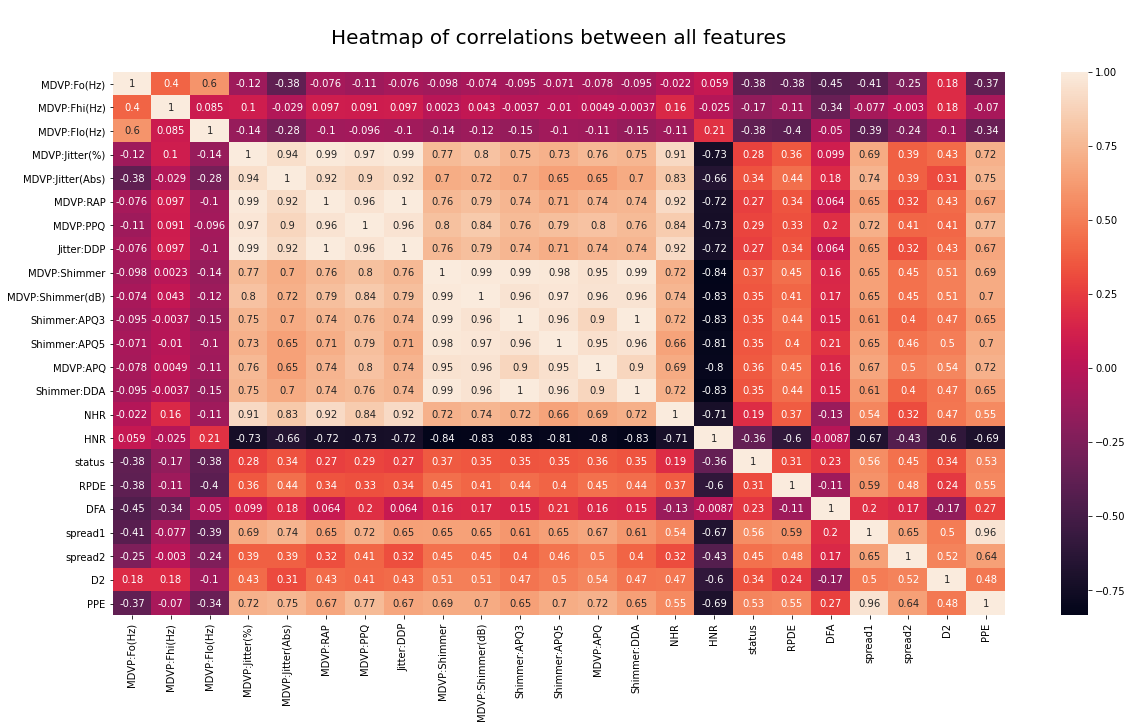

In [10]:
# Heatmap of of all variables.
fig,ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True);
plt.title("\nHeatmap of correlations between all features\n",{'fontsize':20});

#### Observations:
1. The heatmap shows that there are strong correlations across multiple variables. 
2. We observe both +ve and -ve correlation.
3. Need to verify the correlation of all columns w.r.t target variable and also their statuistical significance. 

#### (a) Do these features exhibit correlation with the target variable "status"?

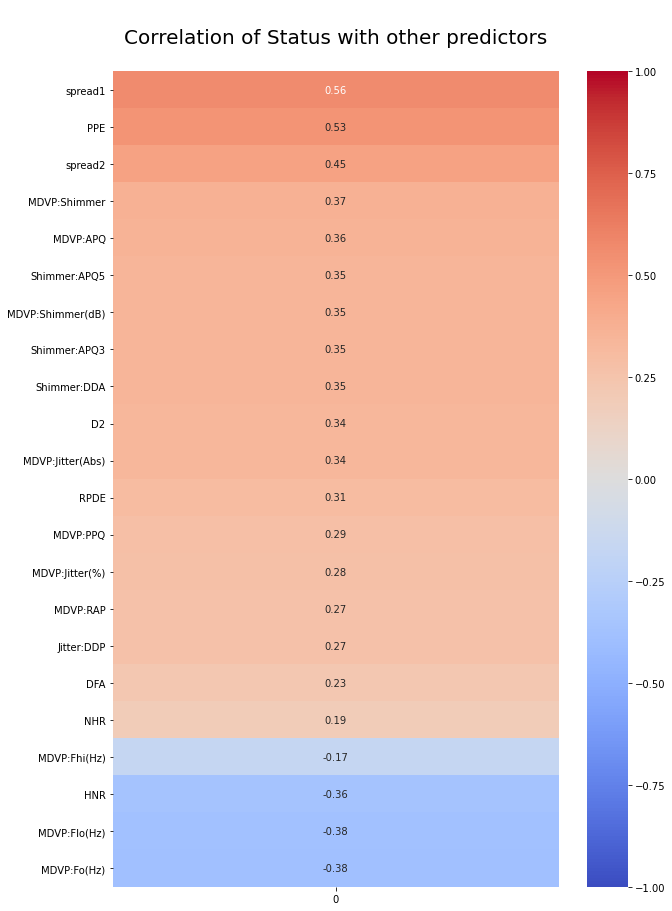

In [11]:
if 'status' in columns_to_show:
    columns_to_show.remove('status')
else:
    pass
correlations = df[columns_to_show].corrwith(df['status'],method='pearson').to_frame()
sorted_correlations = correlations.sort_values(0,ascending=False)
fig, ax = plt.subplots(figsize=(10,15))
sns.heatmap(sorted_correlations, cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);
plt.title("\nCorrelation of Status with other predictors\n",fontsize=20);

#### Observations:
1. We observe that almost all variables have either +ve or -ve correlation with the target variable.
2. Variables name and staus has been intentially omitted from this chart as former is a string and latter being the target variable. 

#### (b) Are these correlation statistically significant at $\alpha$=0.05 ?

In [12]:
#Statistical Significance of correlation of predictirs with independent variable i.e 'Personal Loan'
alpha = 0.05
print("Statistical significance of correlation between predictors and Personal Loan\n=========================================================")
print(f"Level of Significance(alpha) :{alpha}\n")
cols_to_drop = ['status','name']

columns_to_test = [cols for cols in df.columns if cols not in cols_to_drop]

# print(columns_to_test)
p_col,coef_col,feature=[],[],[]
for cols in columns_to_test:
    pearson_coef, p_value=stats.pearsonr(df[cols], df['status'])
    if p_value < alpha :
        feature.append(cols)
        p_col.append(p_value)
        coef_col.append(pearson_coef)

pearson_corr_df = pd.DataFrame({'Features':feature,
                  'Pearson_Coefficients':coef_col,
                  'P_Value':p_col}).sort_values(by='Pearson_Coefficients',ascending=False)
pearson_corr_df.set_index('Features',inplace=True)
pearson_corr_df
        

Statistical significance of correlation between predictors and Personal Loan
Level of Significance(alpha) :0.05



Pearson_Coefficients       P_Value
Features                                            
spread1                       0.564838  7.909651e-18
PPE                           0.531039  1.392619e-15
spread2                       0.454842  2.391729e-11
MDVP:Shimmer                  0.367430  1.264702e-07
MDVP:APQ                      0.364316  1.643238e-07
Shimmer:APQ5                  0.351148  4.823575e-07
MDVP:Shimmer(dB)              0.350697  5.000743e-07
Shimmer:APQ3                  0.347617  6.386194e-07
Shimmer:DDA                   0.347608  6.390539e-07
D2                            0.340232  1.135925e-06
MDVP:Jitter(Abs)              0.338653  1.282252e-06
RPDE                          0.308567  1.139896e-05
MDVP:PPQ                      0.288698  4.257767e-05
MDVP:Jitter(%)                0.278220  8.209989e-05
MDVP:RAP                      0.266668  1.643393e-04
Jitter:DDP                    0.266646  1.645466e-04
DFA                           0.231739  1.115116e-03
NHR                           0.189429  7.994851e-03
MDVP:Fhi(Hz)                 -0.166136  2.027567e-02
HNR                          -0.361515  2.074677e-07
MDVP:Flo(Hz)                 -0.380200  4.197004e-08
MDVP:Fo(Hz)                  -0.383535  3.121919e-08

####  Observations:
1. Correlation of all numeric variable are statistically significant w.r.t the target variable.
2. We also need to verify the correlation between variables.

In [56]:
## Determine Correlation coefficient for each pair of predictors and their statistical significance
pd.set_option('display.max_rows', 500)
alpha = 0.05
# corr_thresh = -1

xy_pairs = [_ for _ in itertools.combinations(columns_to_show,2)]
corr_df = pd.DataFrame(columns=['Variable 1','Variable 2','Corr_Coeff','P_Value'])
for pairs in xy_pairs:
    corr_0 = df[pairs[0]].corr(df[pairs[1]])
    pearson_coef, p_value=stats.pearsonr(df[pairs[0]], df[pairs[1]])
    if p_value < alpha:
        corr_df = corr_df.append({'Variable 1':pairs[0],'Variable 2':pairs[1],'Corr_Coeff':corr_0,'P_Value':p_value},ignore_index=True)

print(f"Minimum Correlation Coefficient: {corr_df['Corr_Coeff'].min()} \nMaximum Correlation Coefficient:  {corr_df['Corr_Coeff'].max()}")
display(corr_df)

Minimum Correlation Coefficient: -0.8352706760187866 
Maximum Correlation Coefficient:  0.9999999636932831


Variable 1        Variable 2  Corr_Coeff        P_Value
0         MDVP:Fo(Hz)      MDVP:Fhi(Hz)    0.400985   6.282219e-09
1         MDVP:Fo(Hz)      MDVP:Flo(Hz)    0.596546   3.508989e-20
2         MDVP:Fo(Hz)  MDVP:Jitter(Abs)   -0.382027   3.570558e-08
3         MDVP:Fo(Hz)              RPDE   -0.383894   3.023501e-08
4         MDVP:Fo(Hz)               DFA   -0.446013   6.382812e-11
5         MDVP:Fo(Hz)           spread1   -0.413738   1.832868e-09
6         MDVP:Fo(Hz)           spread2   -0.249450   4.368751e-04
7         MDVP:Fo(Hz)                D2    0.177980   1.280033e-02
8         MDVP:Fo(Hz)               PPE   -0.372356   8.310494e-08
9        MDVP:Fhi(Hz)               NHR    0.163766   2.215866e-02
10       MDVP:Fhi(Hz)               DFA   -0.343097   9.100823e-07
11       MDVP:Fhi(Hz)                D2    0.176323   1.367329e-02
12       MDVP:Flo(Hz)  MDVP:Jitter(Abs)   -0.277815   8.416287e-05
13       MDVP:Flo(Hz)      MDVP:Shimmer   -0.144543   4.379366e-02
14       MDVP:Flo(Hz)      Shimmer:APQ3   -0.150747   3.541664e-02
15       MDVP:Flo(Hz)       Shimmer:DDA   -0.150737   3.542868e-02
16       MDVP:Flo(Hz)               HNR    0.210851   3.088604e-03
17       MDVP:Flo(Hz)              RPDE   -0.400143   6.801912e-09
18       MDVP:Flo(Hz)           spread1   -0.394857   1.114893e-08
19       MDVP:Flo(Hz)           spread2   -0.243829   5.925682e-04
20       MDVP:Flo(Hz)               PPE   -0.340071   1.150013e-06
21     MDVP:Jitter(%)  MDVP:Jitter(Abs)    0.935714   2.822016e-89
22     MDVP:Jitter(%)          MDVP:RAP    0.990276  2.733690e-167
23     MDVP:Jitter(%)          MDVP:PPQ    0.974256  8.051125e-127
24     MDVP:Jitter(%)        Jitter:DDP    0.990276  2.716732e-167
25     MDVP:Jitter(%)      MDVP:Shimmer    0.769063   2.266875e-39
26     MDVP:Jitter(%)  MDVP:Shimmer(dB)    0.804289   1.683971e-45
27     MDVP:Jitter(%)      Shimmer:APQ3    0.746625   5.238276e-36
28     MDVP:Jitter(%)      Shimmer:APQ5    0.725561   3.713141e-33
29     MDVP:Jitter(%)          MDVP:APQ    0.758255   1.050781e-37
30     MDVP:Jitter(%)       Shimmer:DDA    0.746635   5.221228e-36
31     MDVP:Jitter(%)               NHR    0.906959   2.141514e-74
32     MDVP:Jitter(%)               HNR   -0.728165   1.705488e-33
33     MDVP:Jitter(%)              RPDE    0.360673   2.224220e-07
34     MDVP:Jitter(%)           spread1    0.693577   2.659839e-29
35     MDVP:Jitter(%)           spread2    0.385123   2.708336e-08
36     MDVP:Jitter(%)                D2    0.433434   2.464038e-10
37     MDVP:Jitter(%)               PPE    0.721543   1.212142e-32
38   MDVP:Jitter(Abs)          MDVP:RAP    0.922911   6.164495e-82
39   MDVP:Jitter(Abs)          MDVP:PPQ    0.897778   1.193017e-70
40   MDVP:Jitter(Abs)        Jitter:DDP    0.922913   6.149211e-82
41   MDVP:Jitter(Abs)      MDVP:Shimmer    0.703322   2.017562e-30
42   MDVP:Jitter(Abs)  MDVP:Shimmer(dB)    0.716601   5.049306e-32
43   MDVP:Jitter(Abs)      Shimmer:APQ3    0.697153   1.044878e-29
44   MDVP:Jitter(Abs)      Shimmer:APQ5    0.648961   1.073976e-24
45   MDVP:Jitter(Abs)          MDVP:APQ    0.648793   1.113822e-24
46   MDVP:Jitter(Abs)       Shimmer:DDA    0.697170   1.040301e-29
47   MDVP:Jitter(Abs)               NHR    0.834972   5.894911e-52
48   MDVP:Jitter(Abs)               HNR   -0.656810   1.893295e-25
49   MDVP:Jitter(Abs)              RPDE    0.441839   1.005472e-10
50   MDVP:Jitter(Abs)               DFA    0.175036   1.438693e-02
51   MDVP:Jitter(Abs)           spread1    0.735779   1.663465e-34
52   MDVP:Jitter(Abs)           spread2    0.388543   1.989371e-08
53   MDVP:Jitter(Abs)                D2    0.310694   9.841979e-06
54   MDVP:Jitter(Abs)               PPE    0.748162   3.164110e-36
55           MDVP:RAP          MDVP:PPQ    0.957317  5.525189e-106
56           MDVP:RAP        Jitter:DDP    1.000000   0.000000e+00
57           MDVP:RAP      MDVP:Shimmer    0.759581   6.636832e-38
58           MDVP:RAP  MDVP:Shimmer(dB)    0.790652   5.48

#### Observations:
1. There are 230 pairs of variables possible of which correlation of 185 variables are statistically significant.
2. The correlation coefficient that is statistically significant ranges between **-0.84 to 0.99**
3. Theis means there could significant Variance Inflation Factor in the data that also needs to be analysed.

In [14]:
def get_VIF_Table(df):
    '''
    Function to get the Variance Inflation Factor from the data frame:
    Usage: get_VIF_Table(pd.DataFrame)
    (1) df : Dataframe
    
    Return:
        Returns the Table containing the list of column names or features and VIF for each of them.
    '''
    from statsmodels.stats.outliers_influence import variance_inflation_factor 
    X = df
    vif_data = pd.DataFrame() 
    vif_data["feature"] = df.columns 
    vif_data["VIF"] =[variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    vif_data['VIF'] = vif_data['VIF'].map(lambda a: '%2.2f' % a) 
    return vif_data

In [78]:
vif_df = get_VIF_Table(df[columns_to_show])
vif_df['VIF'] = vif_df['VIF'].astype('float64')
vif_df.sort_values(by='VIF',inplace=True,ascending=False)
vif_df

feature          VIF
10      Shimmer:APQ3  51152986.52
13       Shimmer:DDA  51126303.41
7         Jitter:DDP   3103948.97
5           MDVP:RAP   3101964.45
8       MDVP:Shimmer      2653.66
3     MDVP:Jitter(%)       506.56
17               DFA       414.91
18           spread1       384.37
11      Shimmer:APQ5       342.84
9   MDVP:Shimmer(dB)       303.10
6           MDVP:PPQ       273.80
12          MDVP:APQ       184.05
21               PPE       133.49
15               HNR       132.11
4   MDVP:Jitter(Abs)       122.72
20                D2       112.65
0        MDVP:Fo(Hz)       102.24
16              RPDE        55.61
19           spread2        23.08
2       MDVP:Flo(Hz)        18.05
14               NHR        16.00
1       MDVP:Fhi(Hz)         8.88

In [81]:
new_cols = vif_df[vif_df['VIF'] < 100]['feature'].values
vif_df = get_VIF_Table(df[new_cols])
vif_df['VIF'] = vif_df['VIF'].astype('float64')
vif_df.sort_values(by='VIF',inplace=True,ascending=False)
vif_df

feature    VIF
0          RPDE  15.34
1       spread2  11.14
2  MDVP:Flo(Hz)   5.73
3  MDVP:Fhi(Hz)   5.23
4           NHR   1.59

#### Observations:
1. As we observe the data has multi collinearity and the same needs to be handled while modelling.
2. Shimmer:APQ3 and Shimmer:DDA are collinear.
3. Jitter:DDP and MDVP:RAP is also colliner.
4. We also observe that variables, RPDE,spread2, MDVP:Flo(Hz), MDVP:Fhi(Hz) and NHR have much lower VIF.
5. We will also verify later as to what variables provide significant variance to the dataset.

### (9) Visualise Linear Relationships

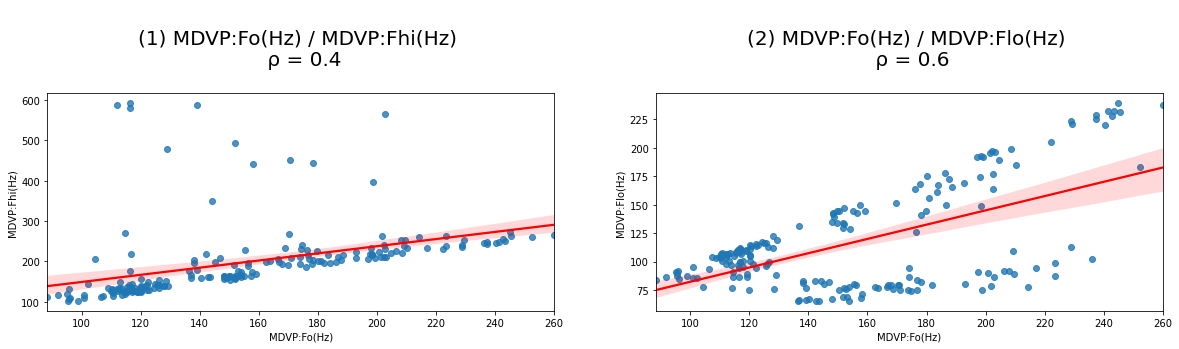

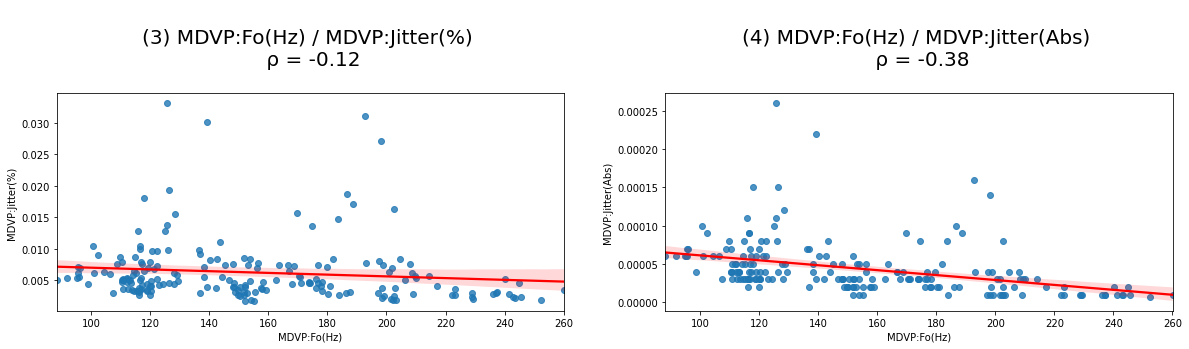

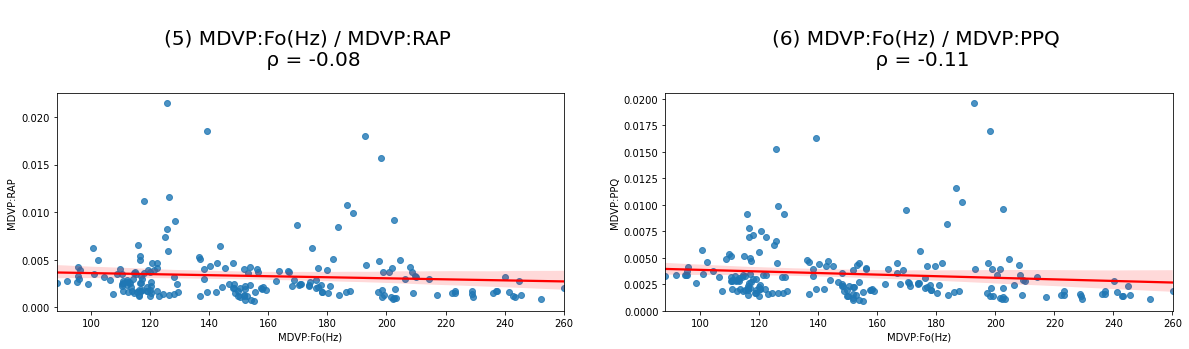

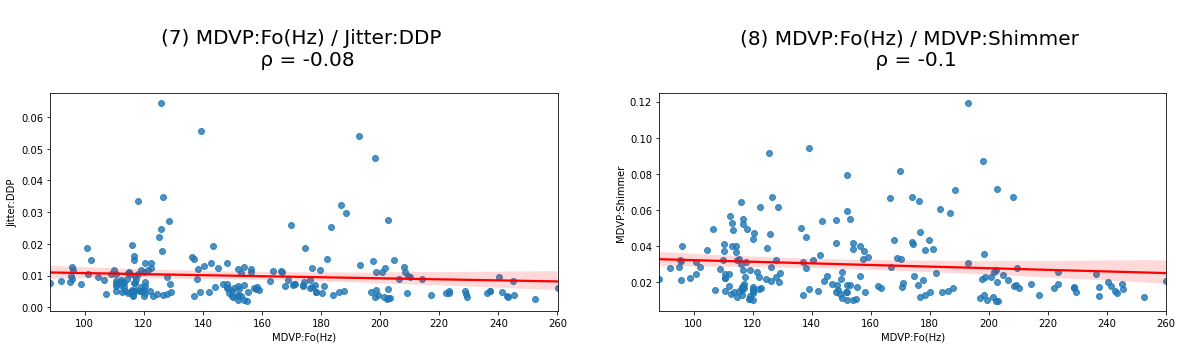

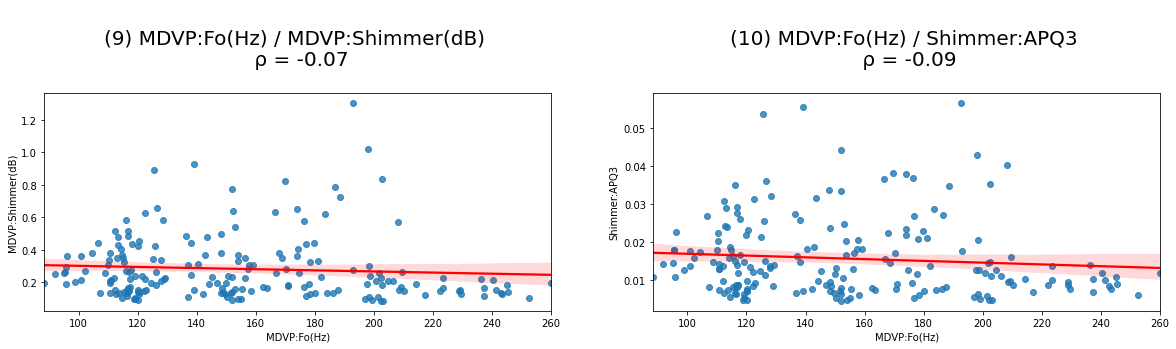

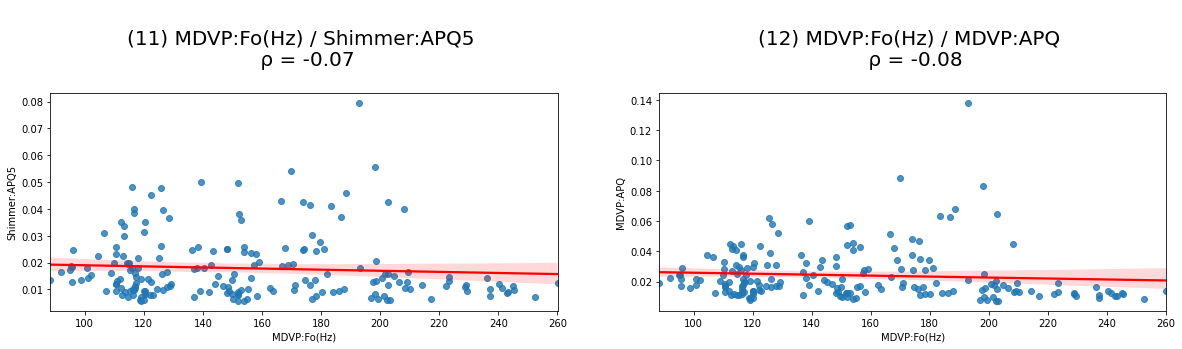

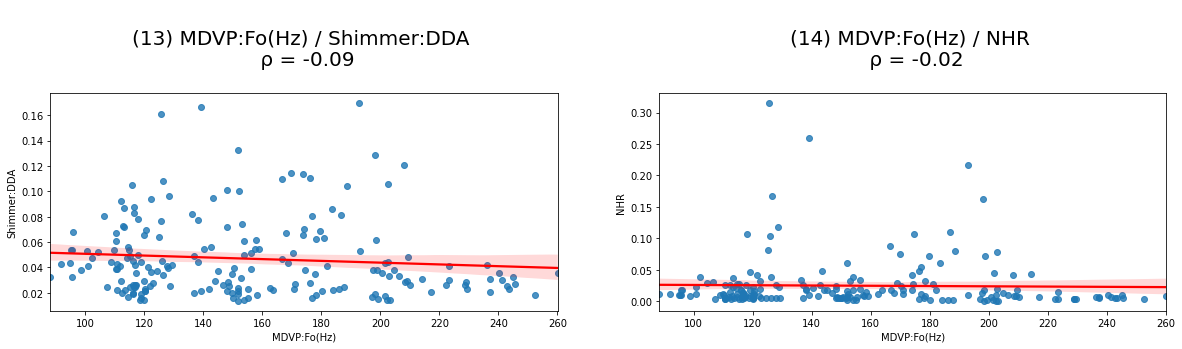

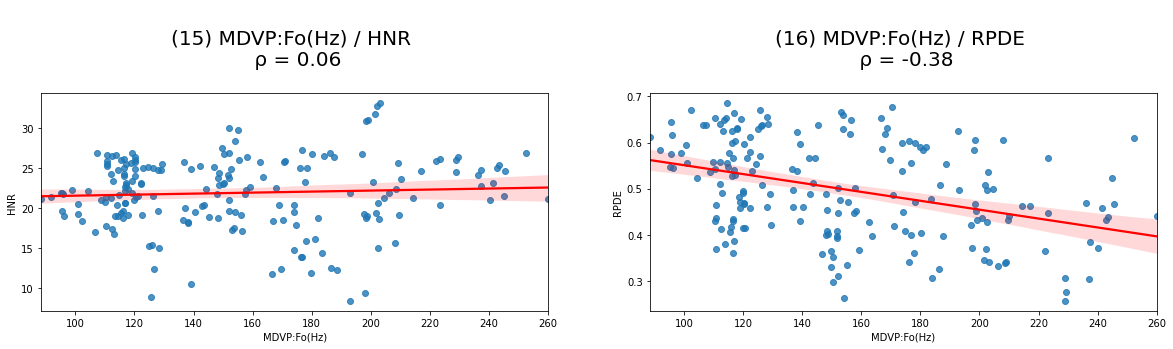

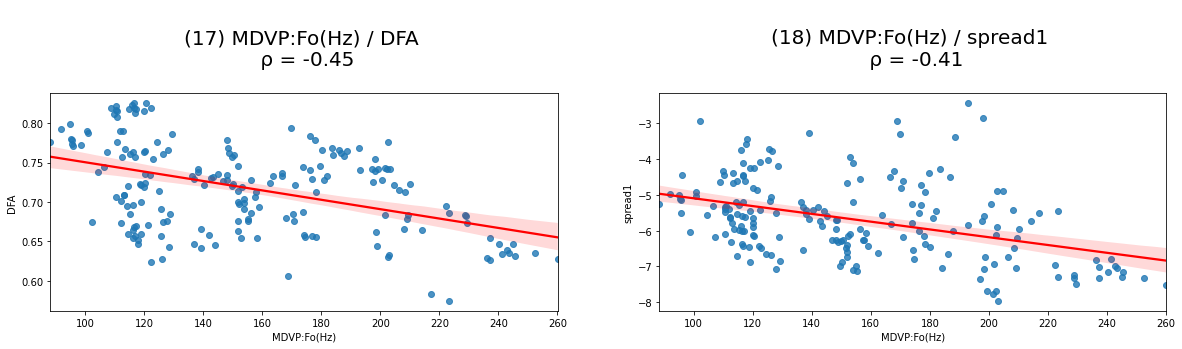

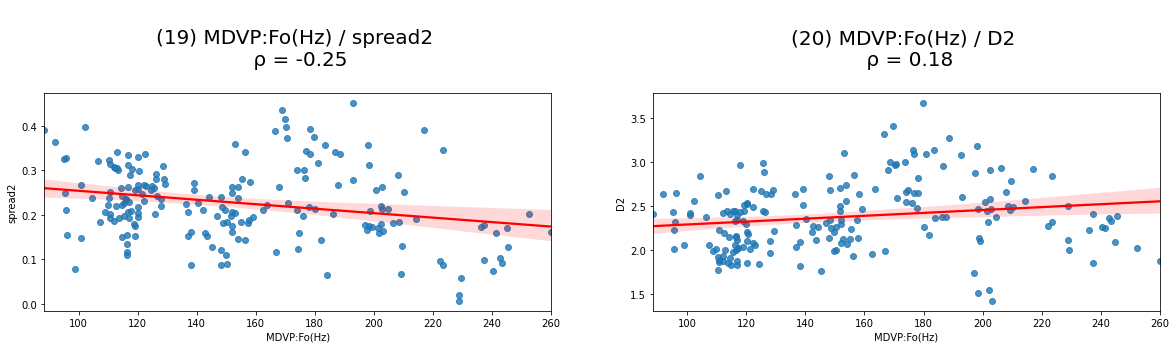

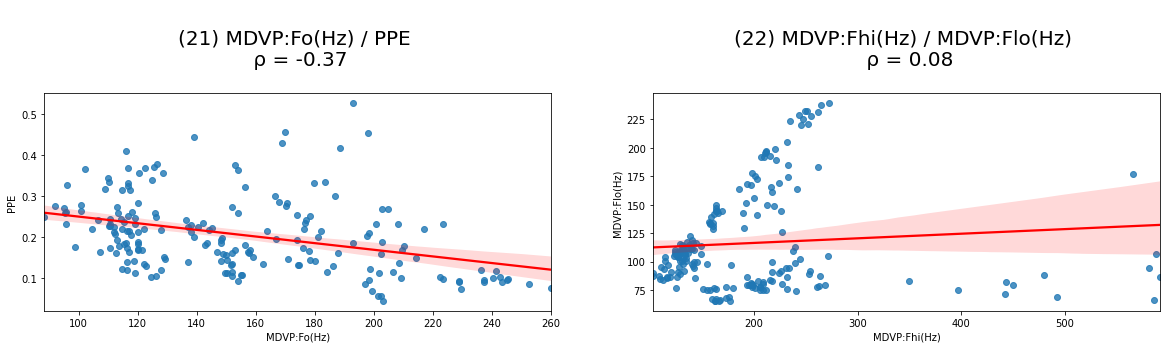

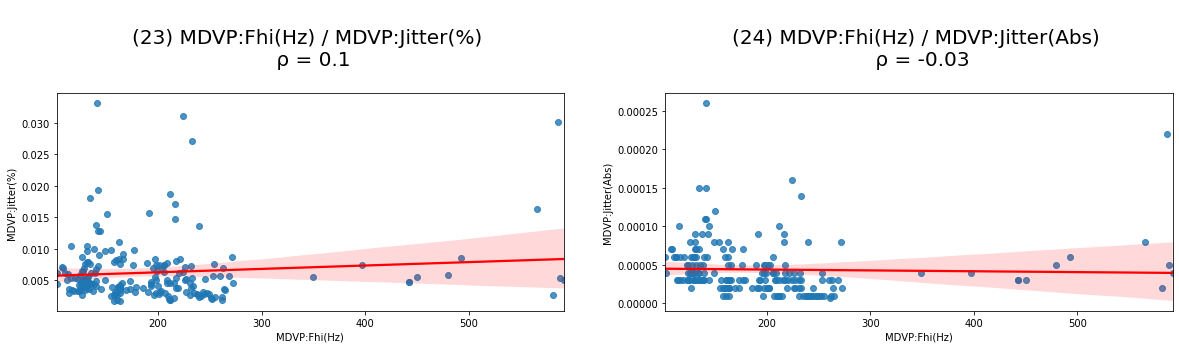

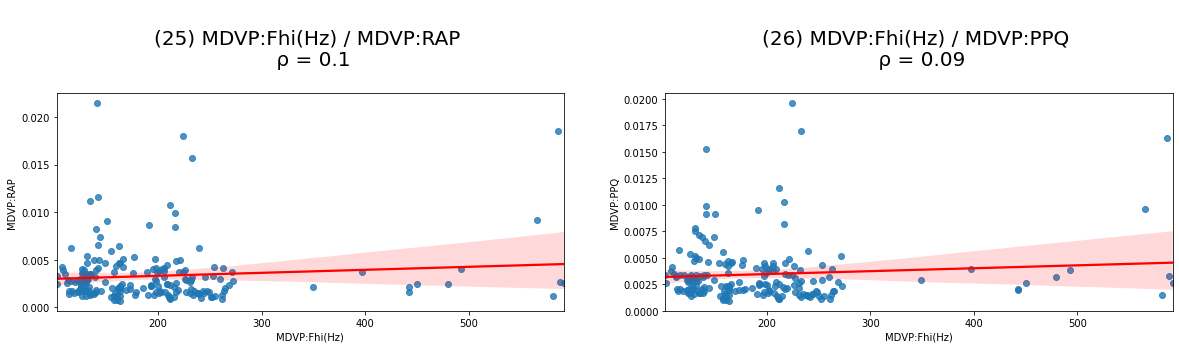

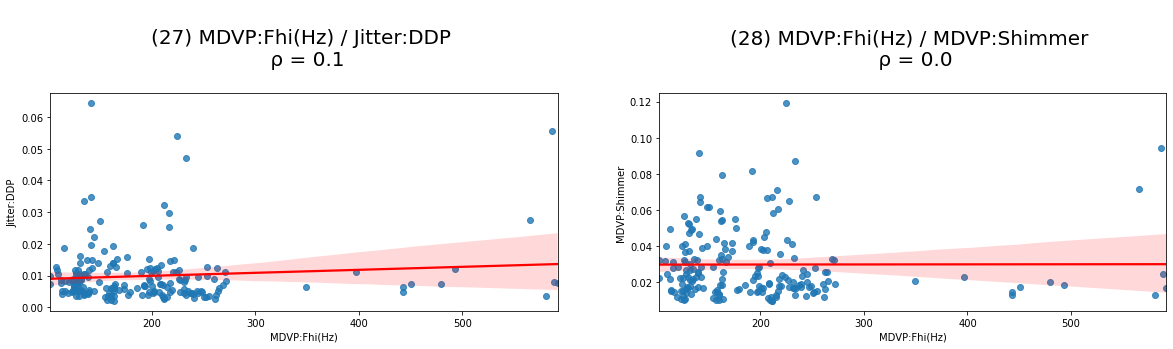

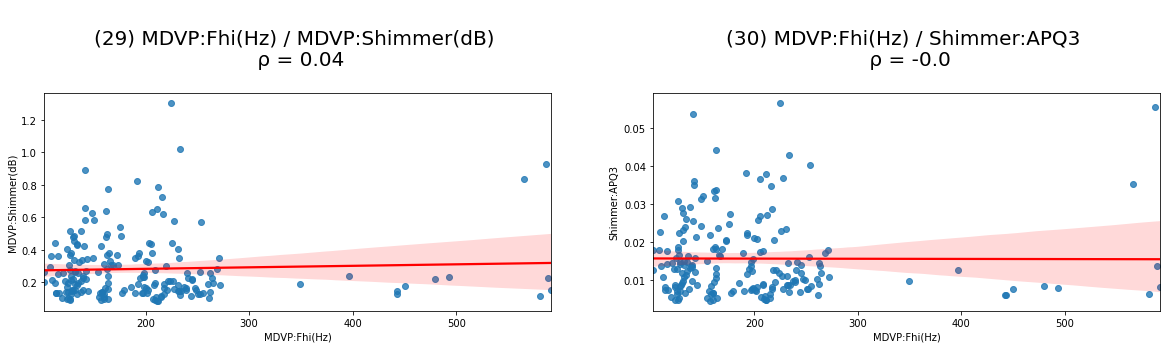

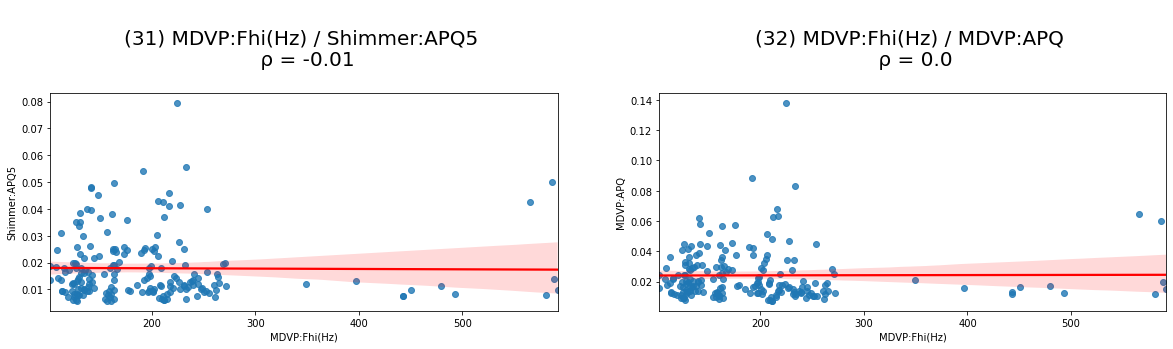

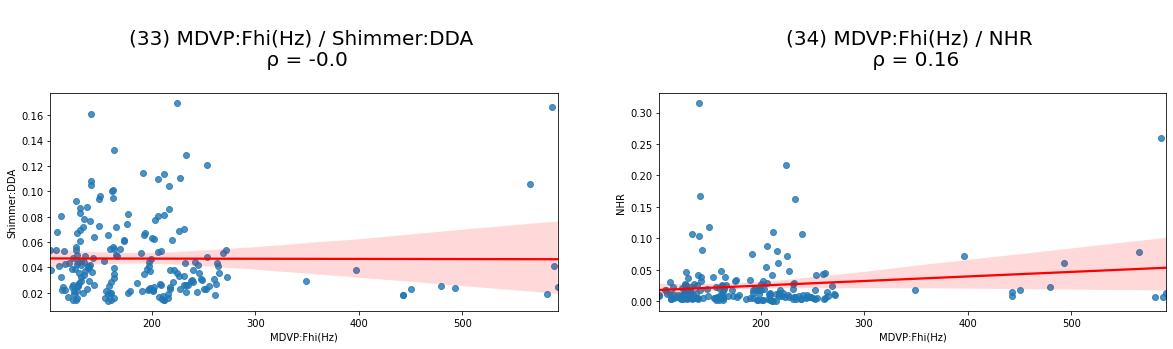

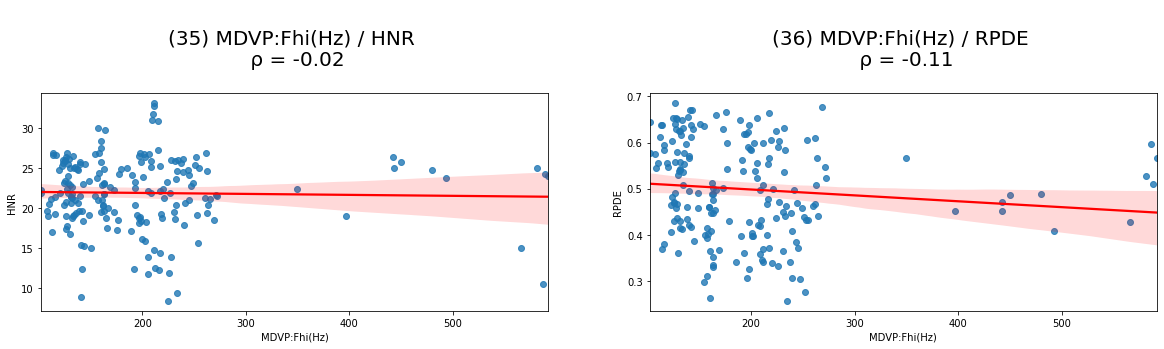

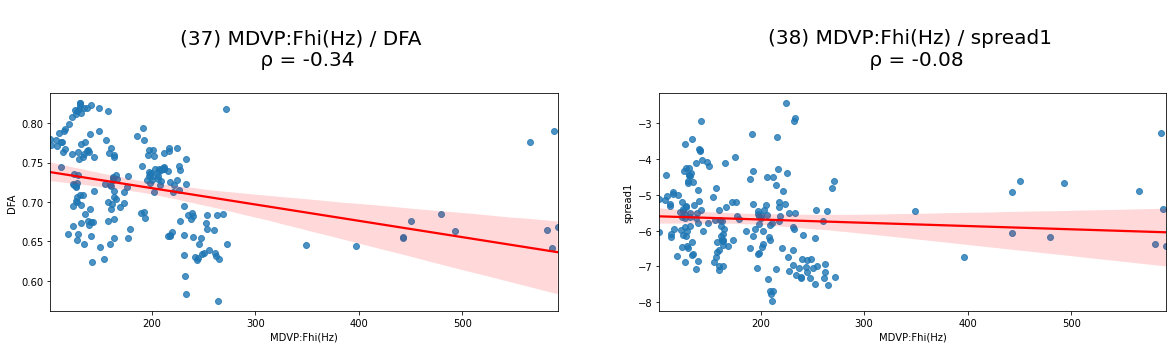

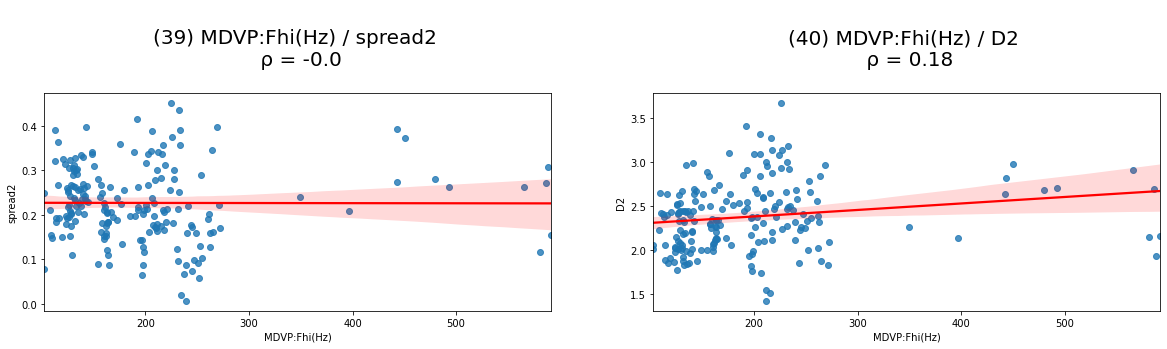

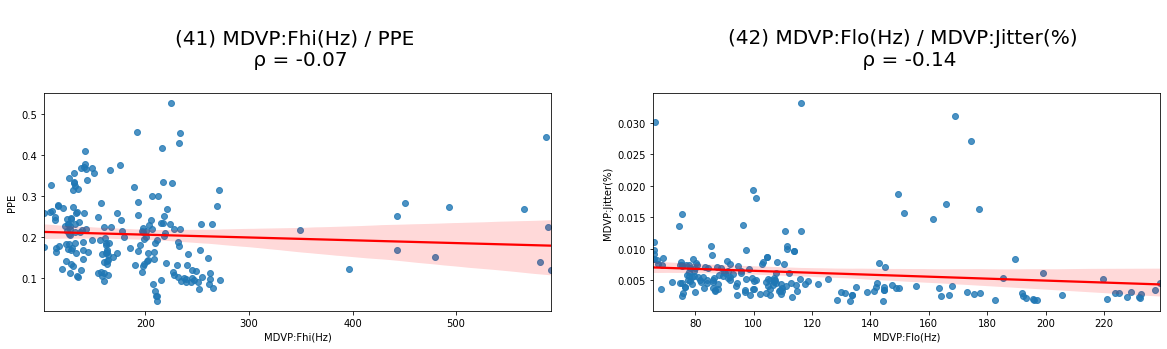

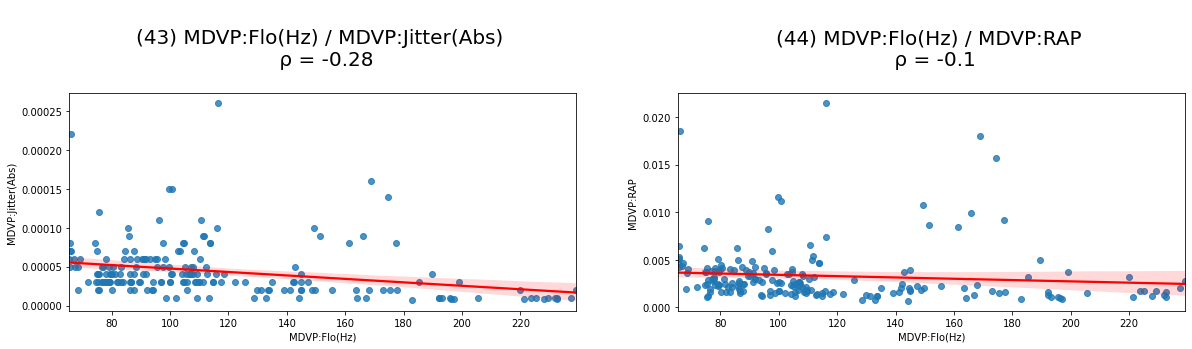

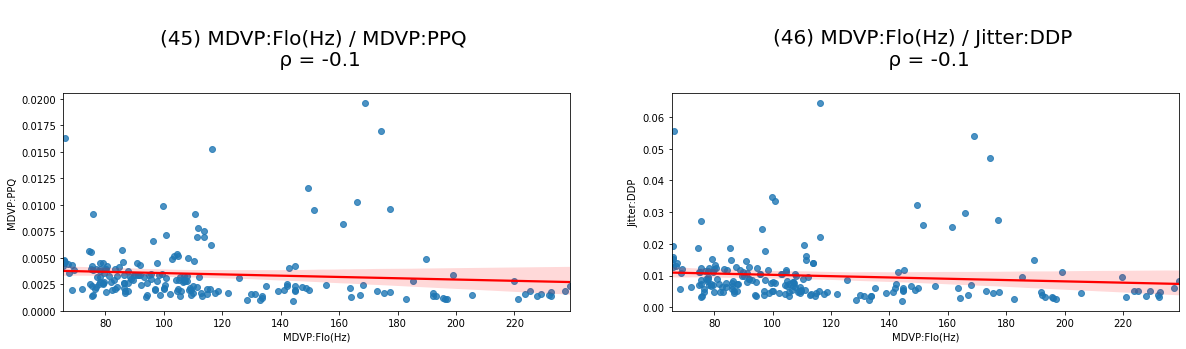

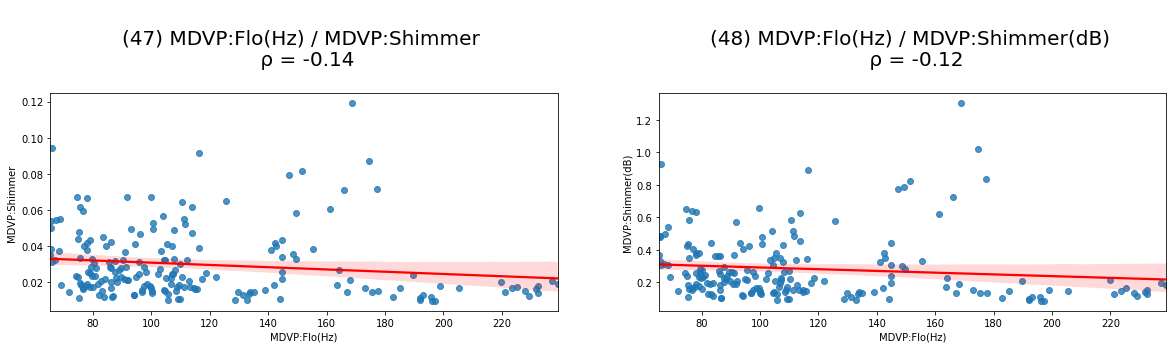

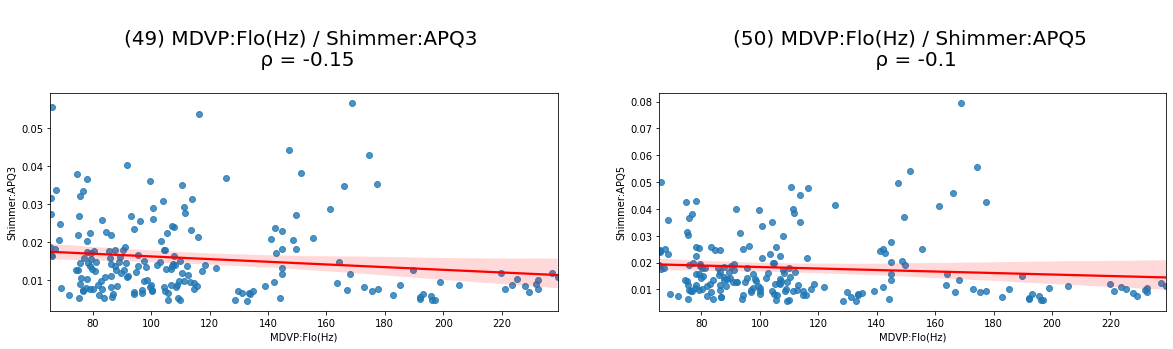

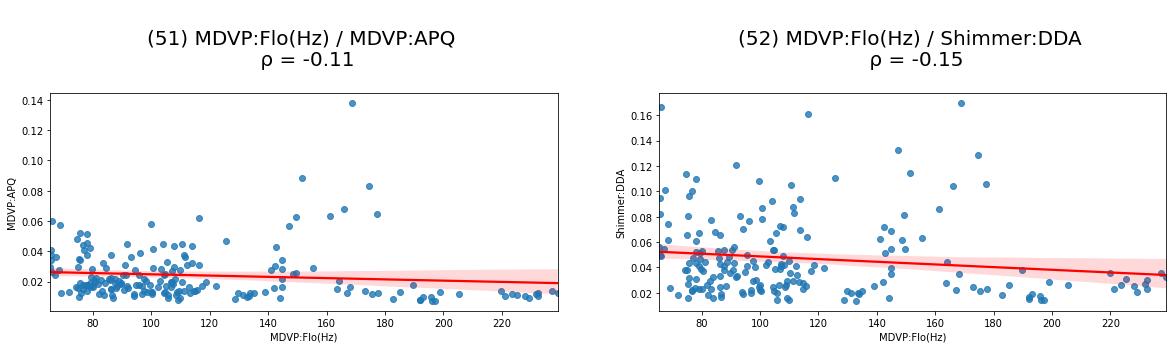

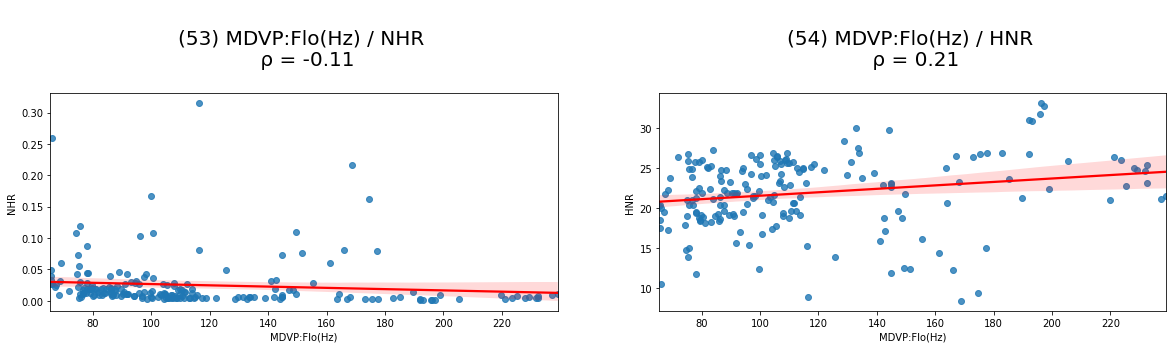

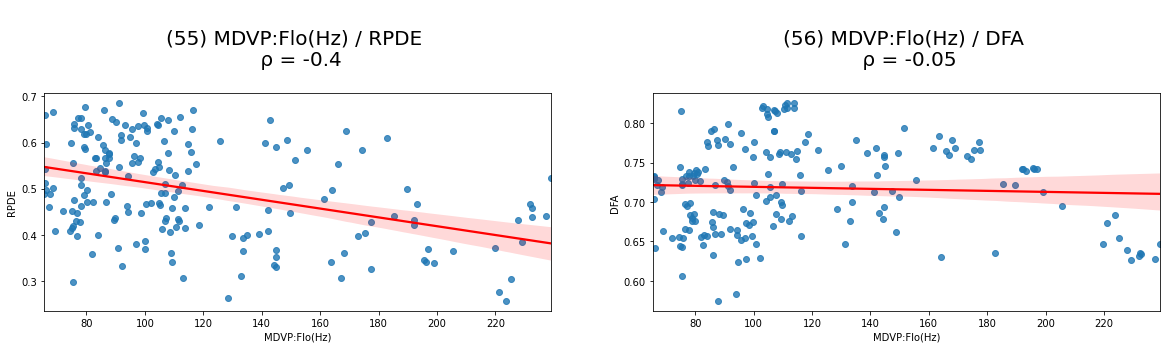

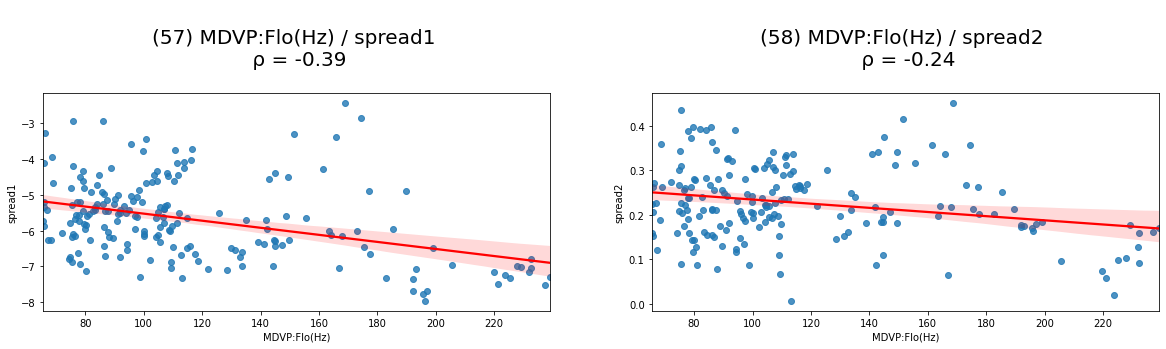

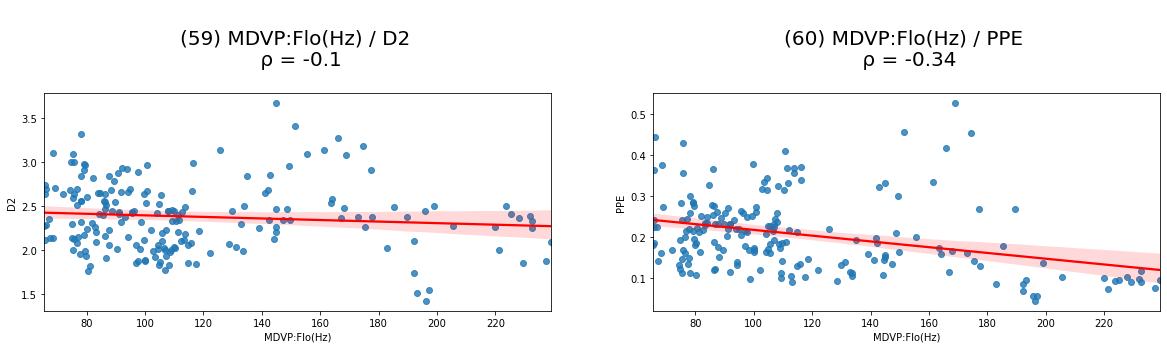

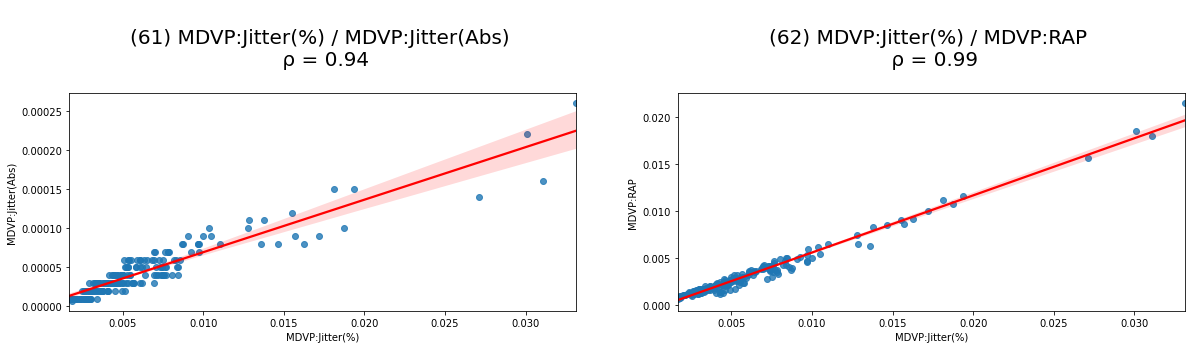

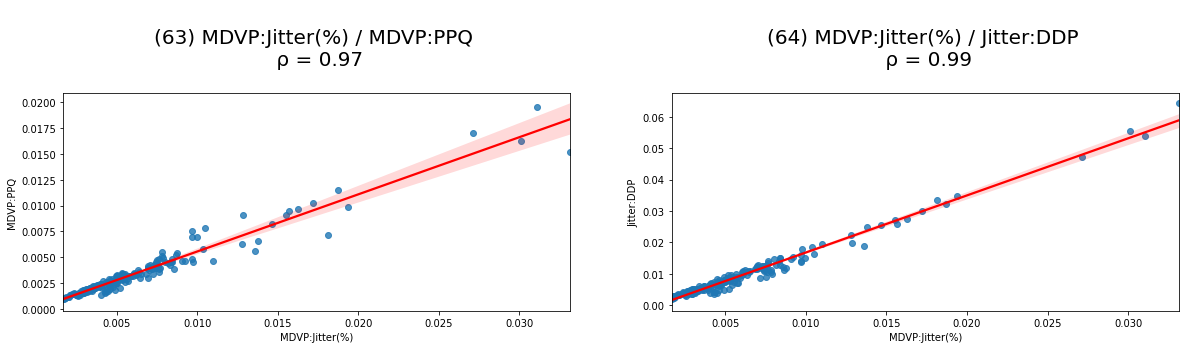

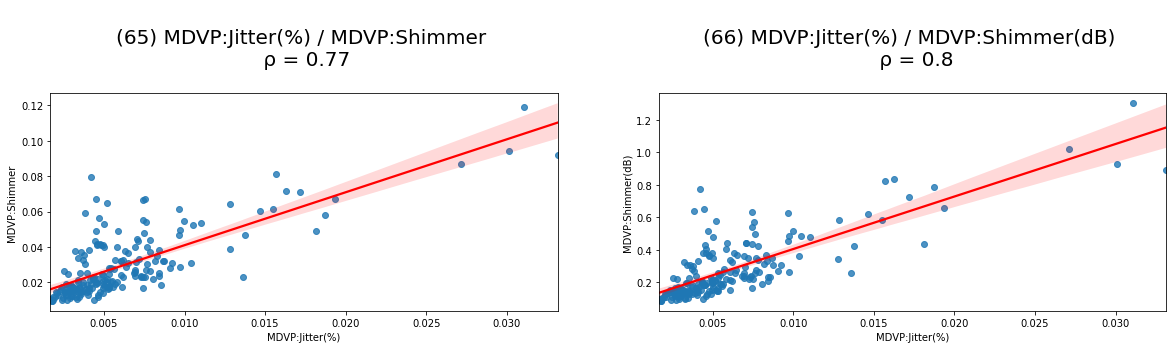

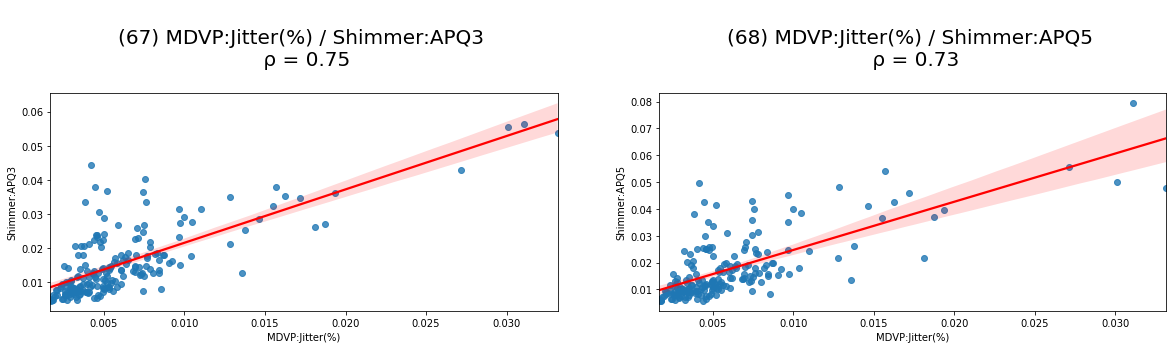

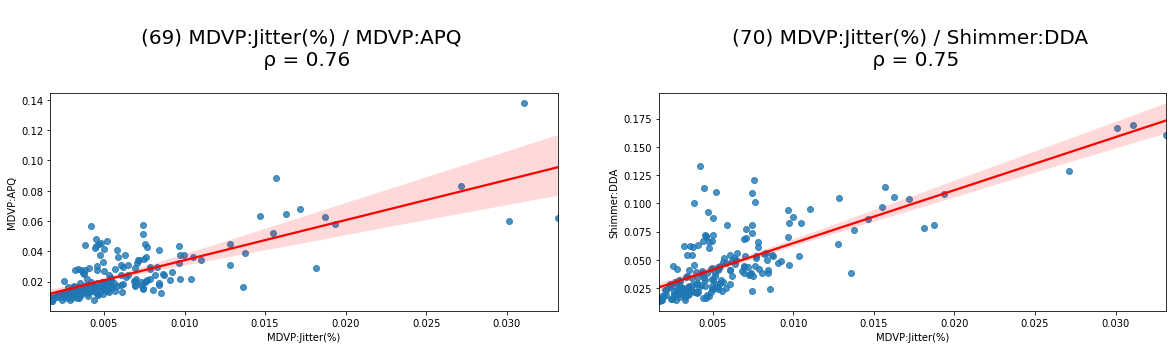

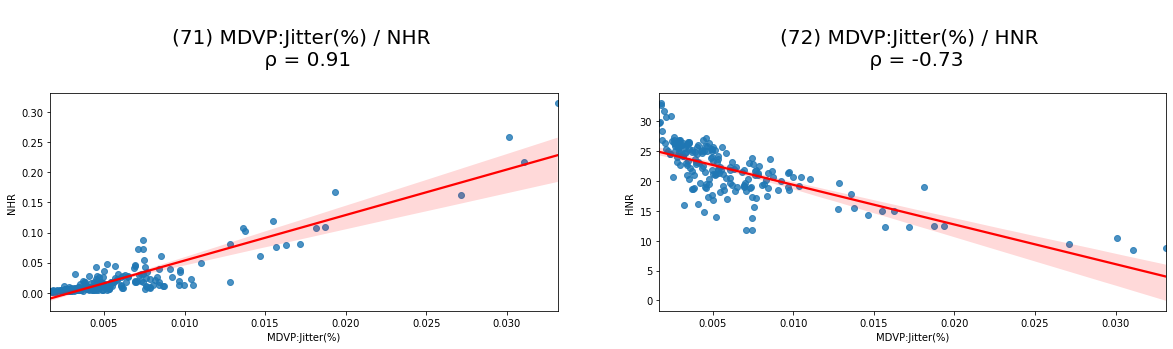

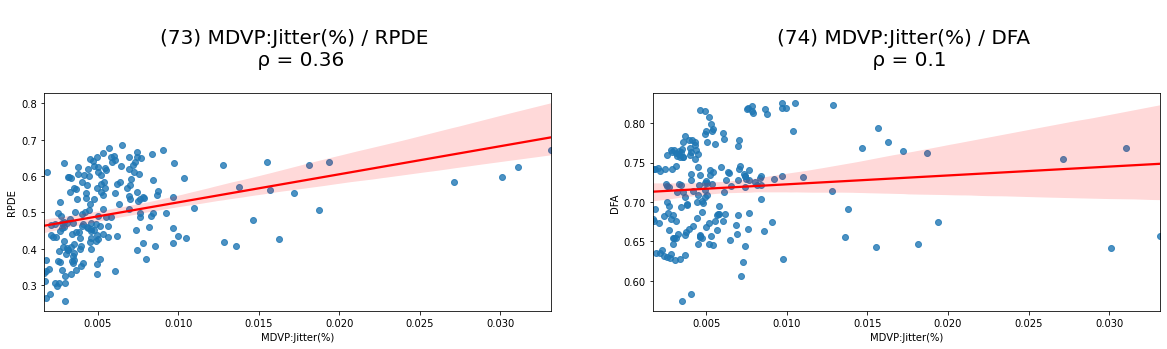

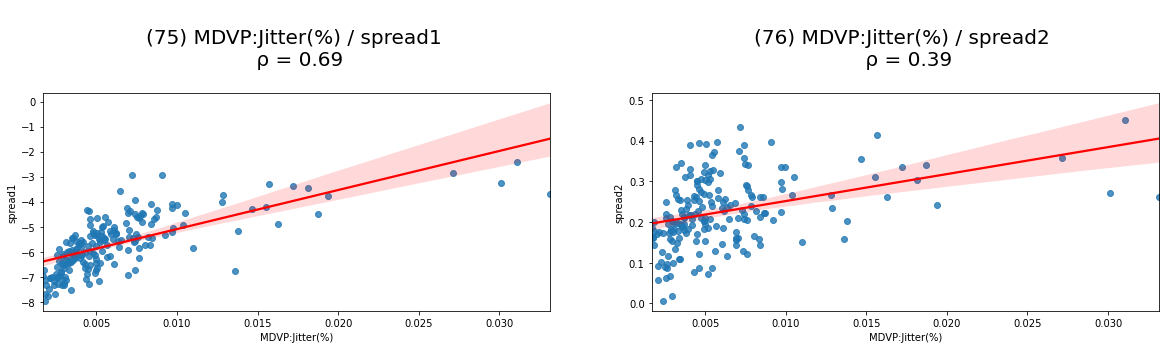

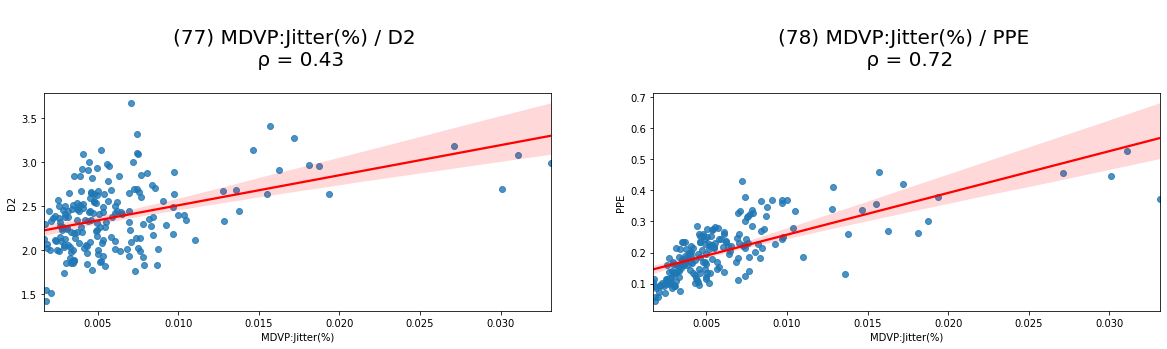

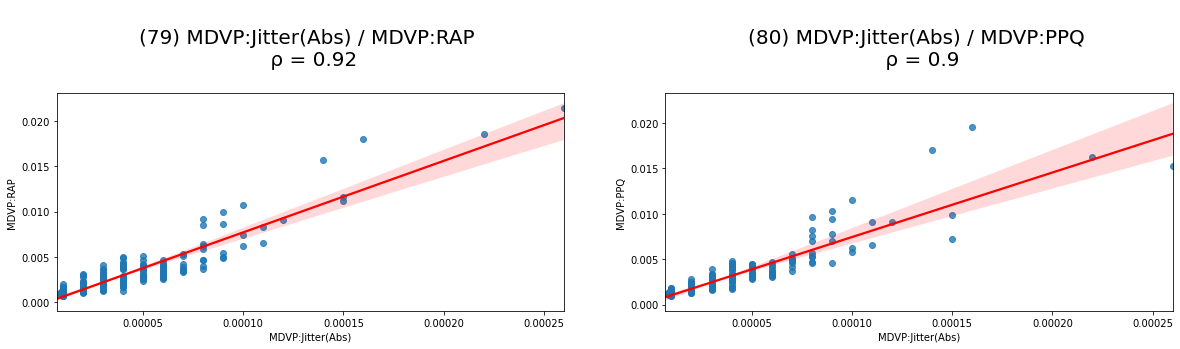

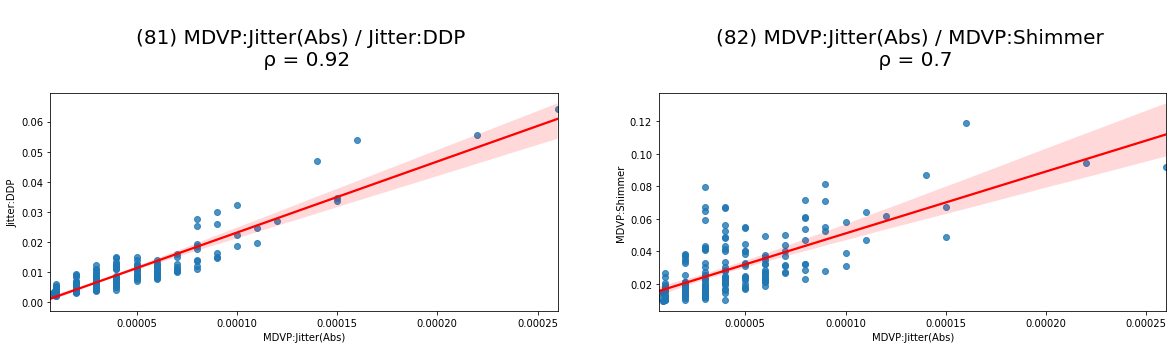

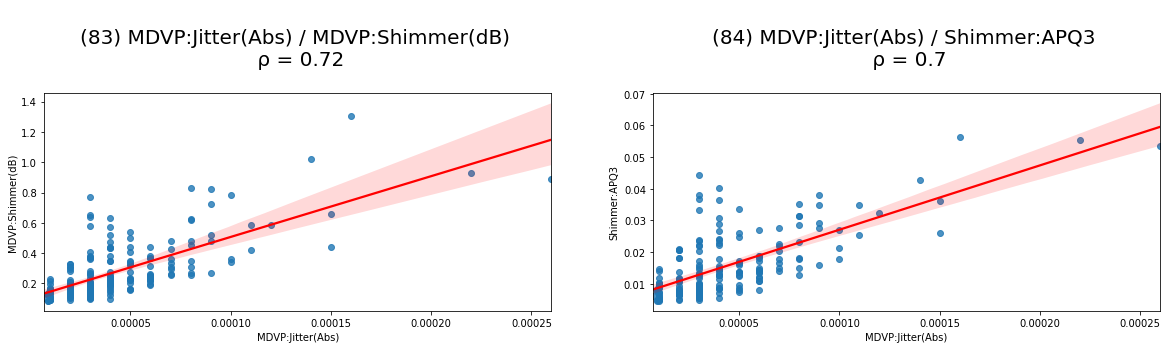

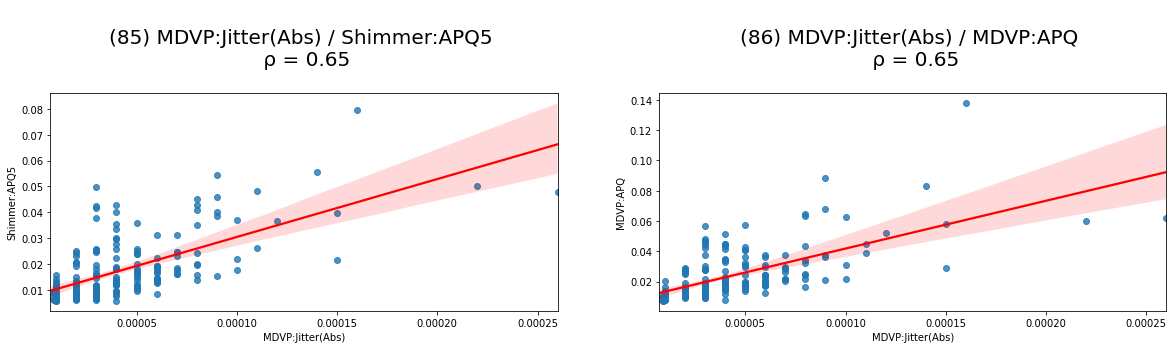

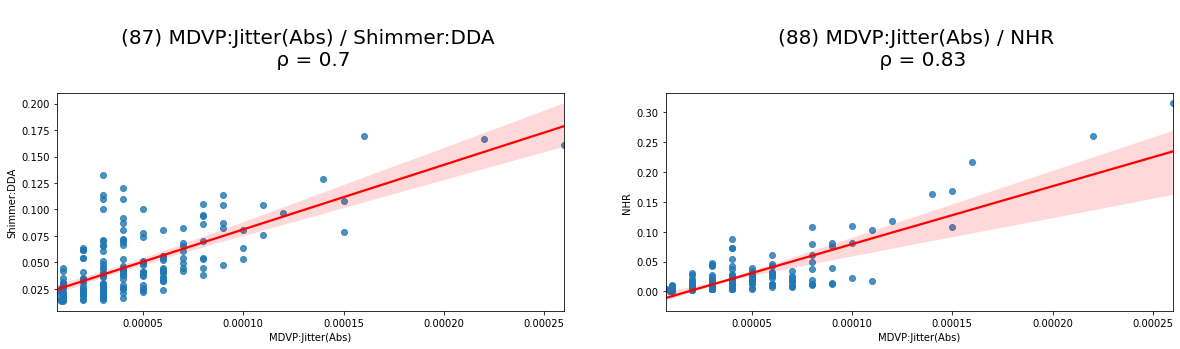

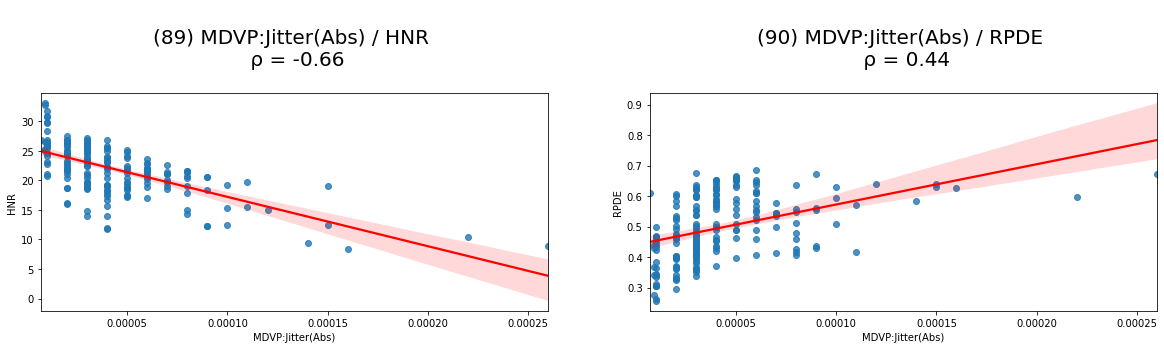

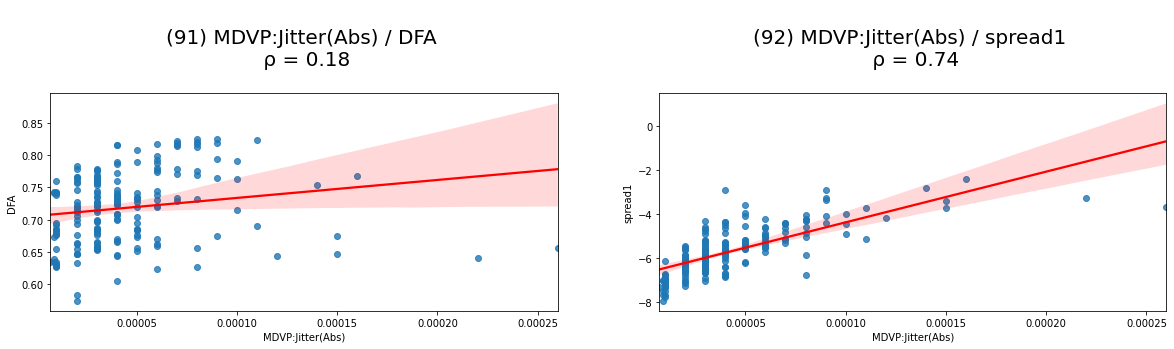

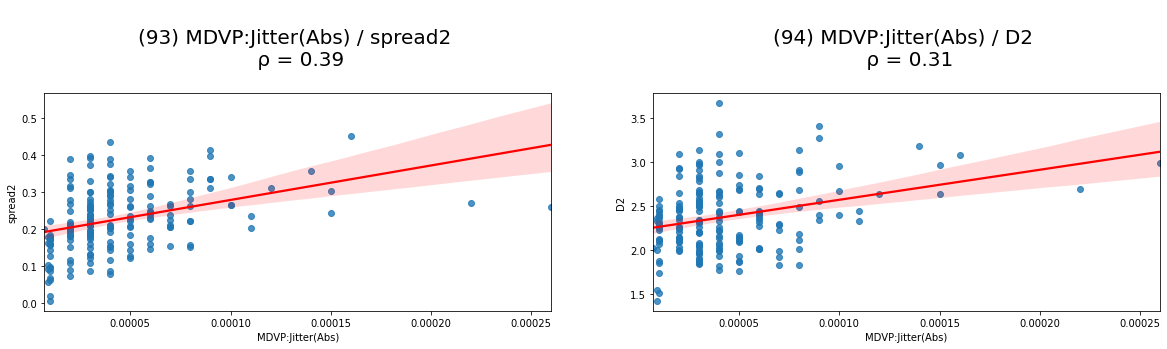

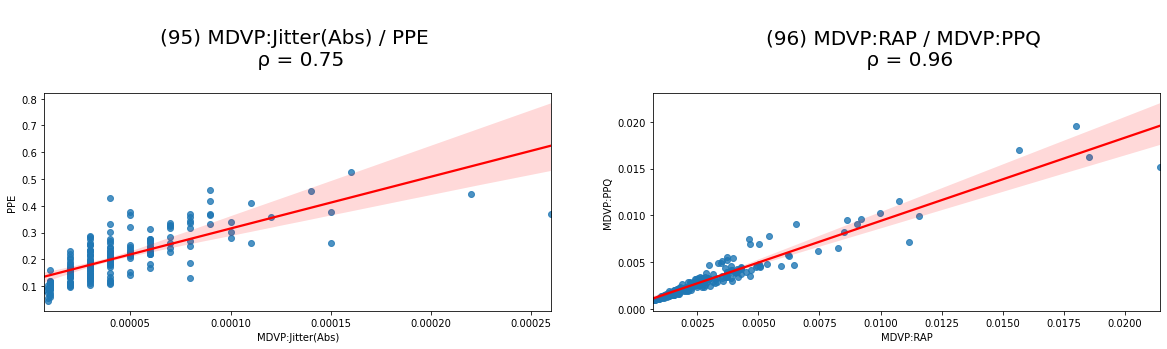

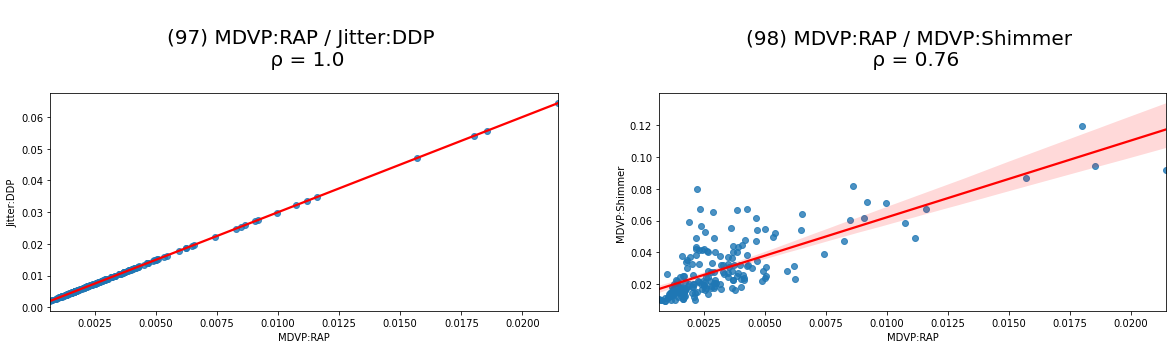

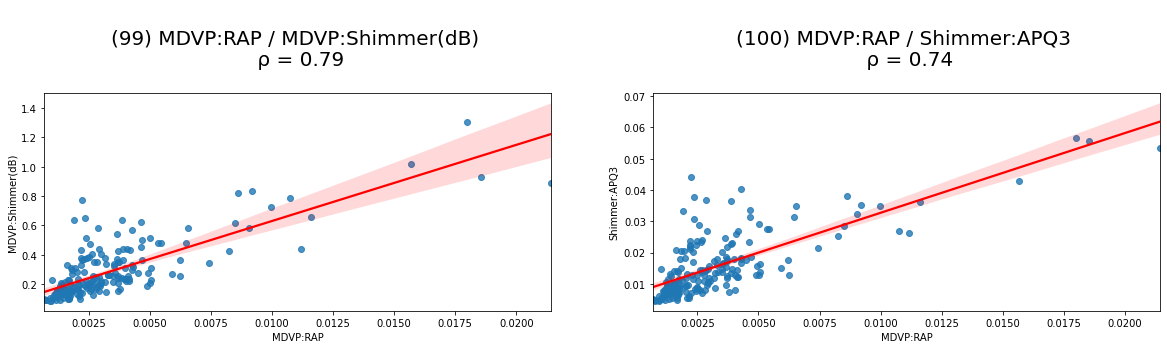

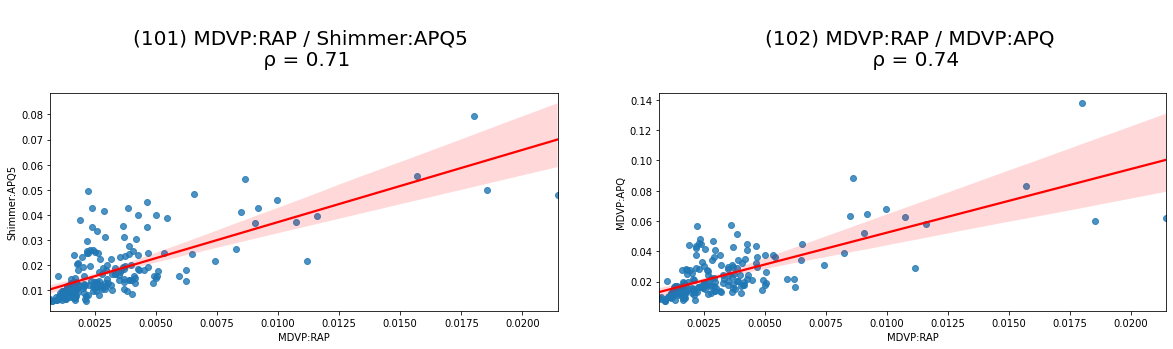

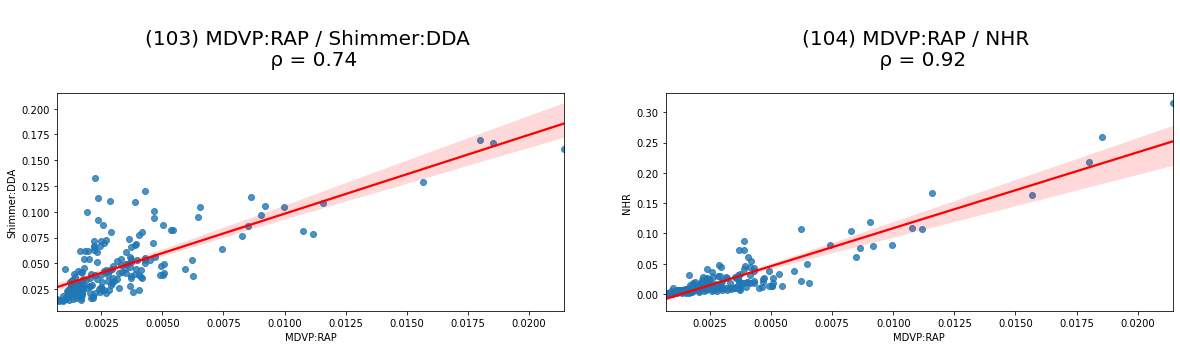

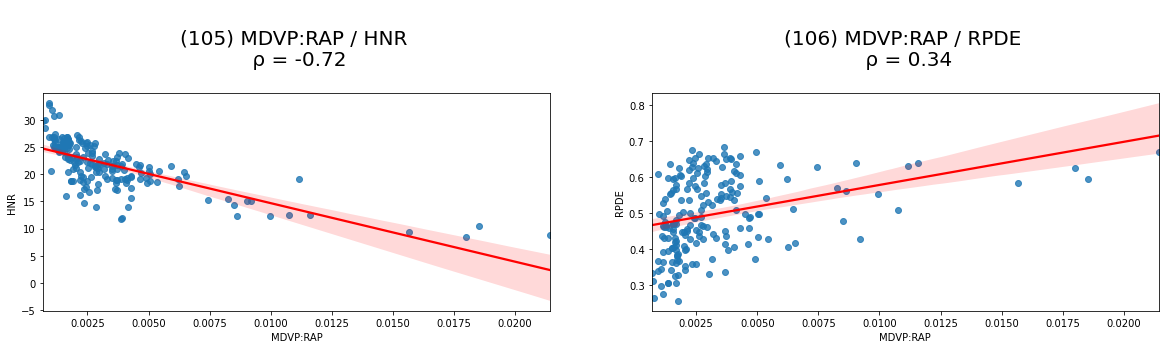

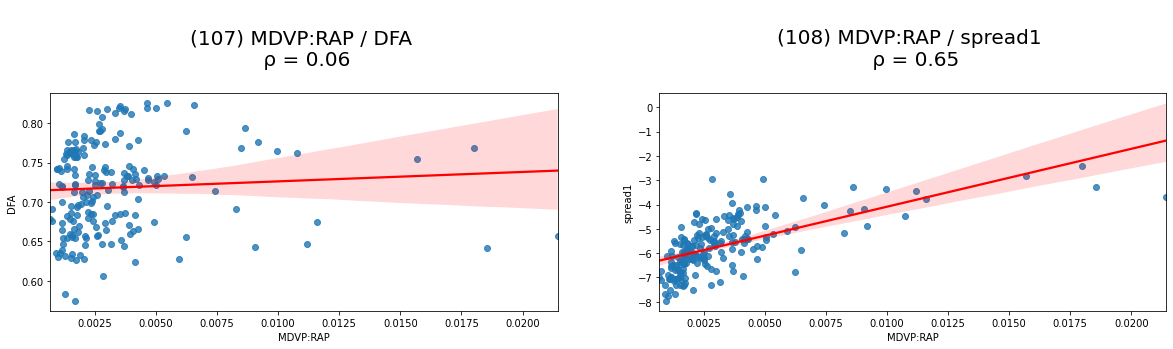

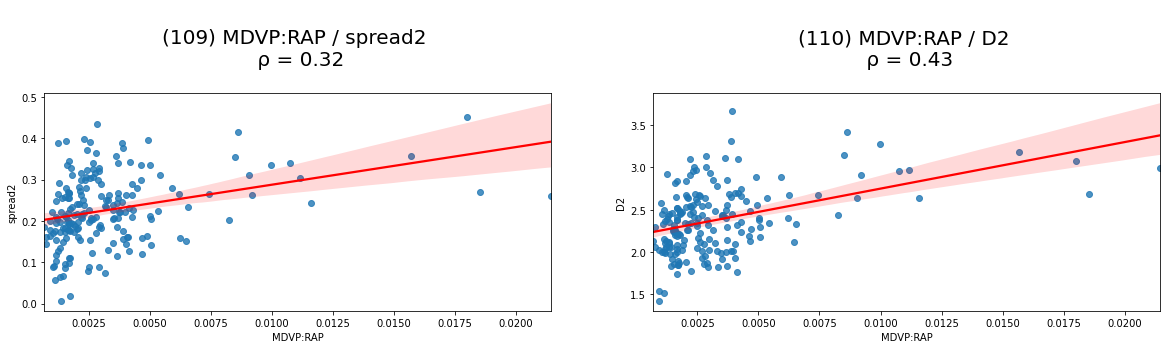

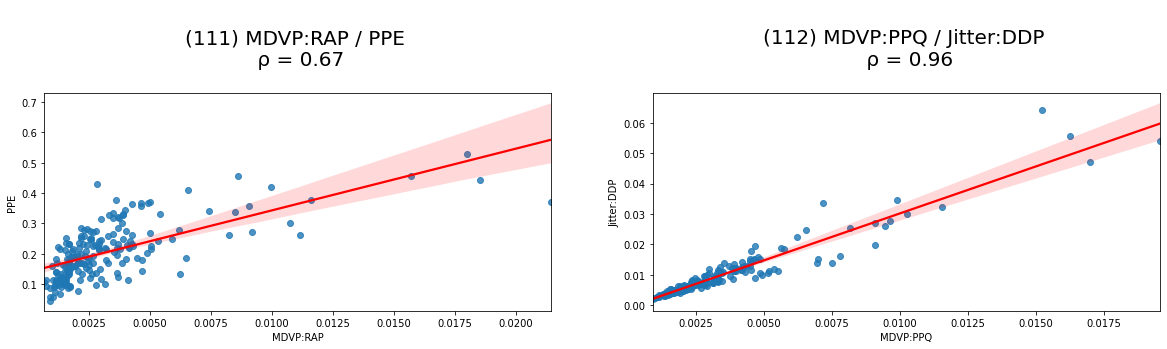

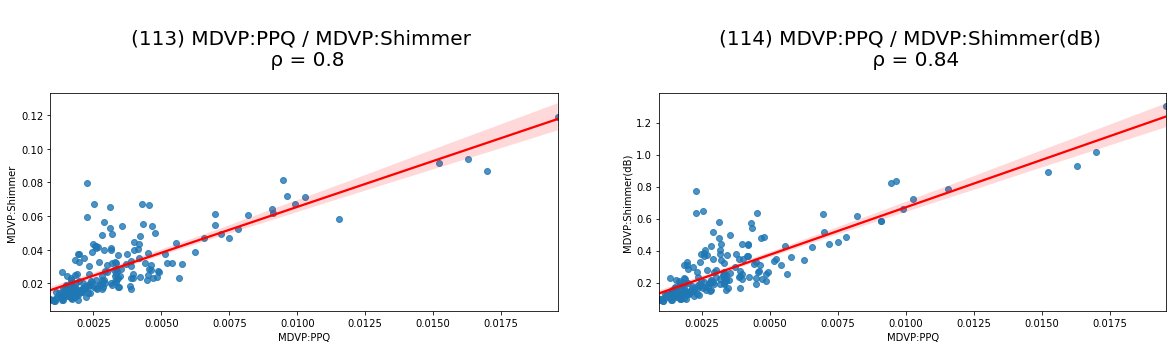

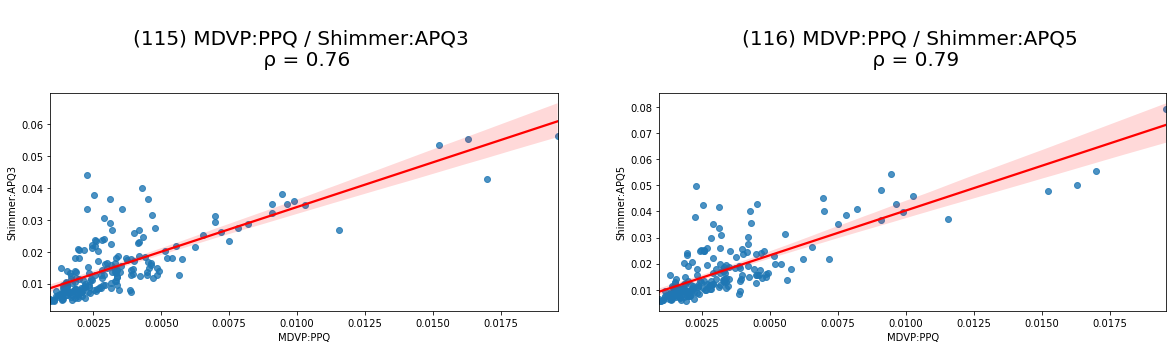

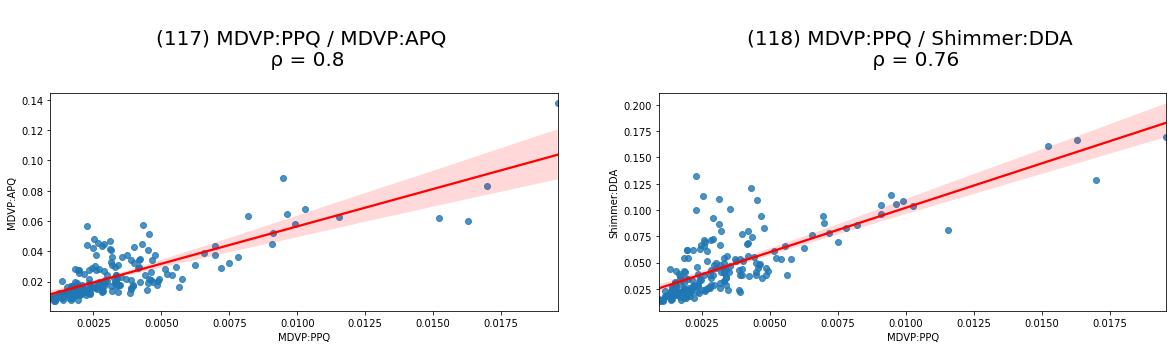

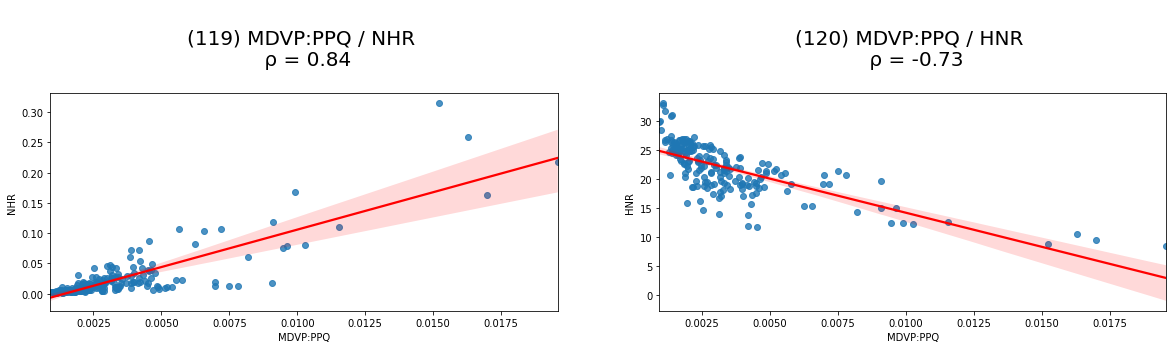

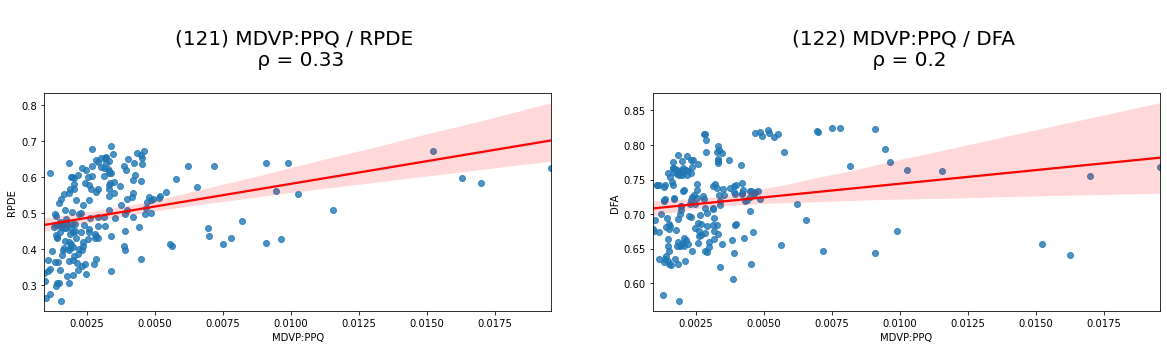

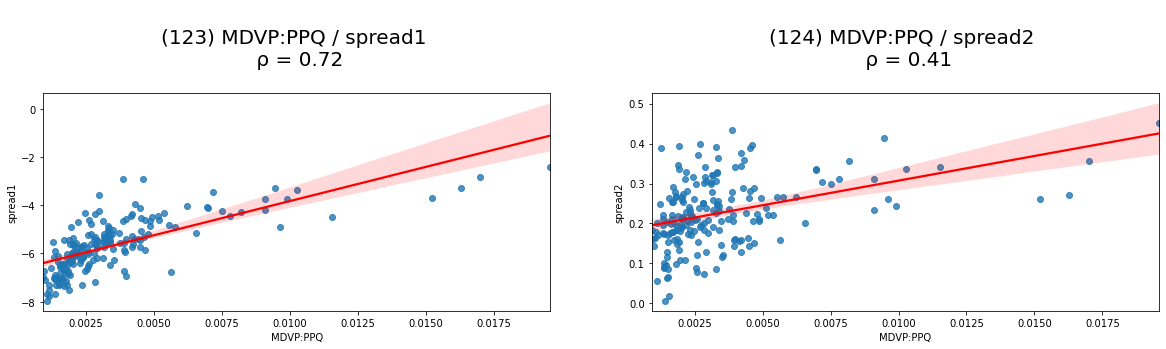

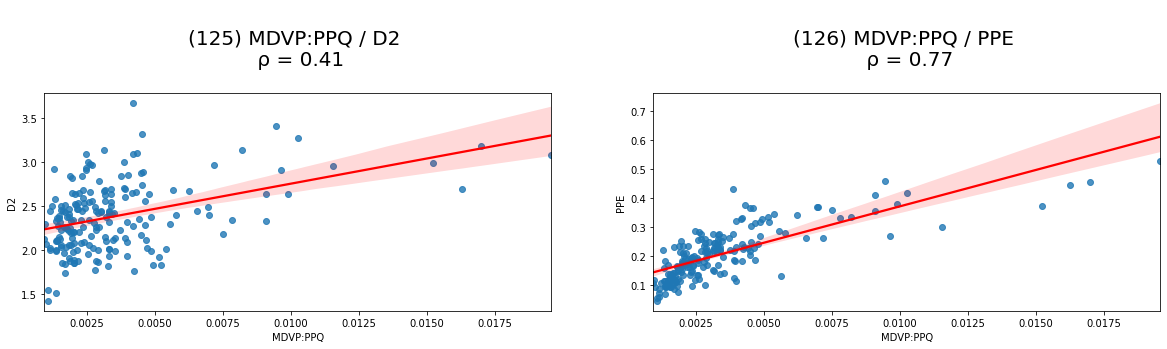

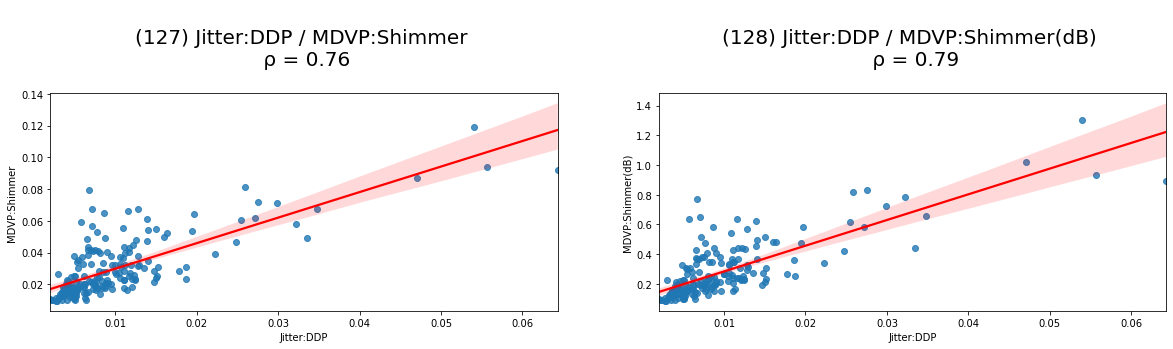

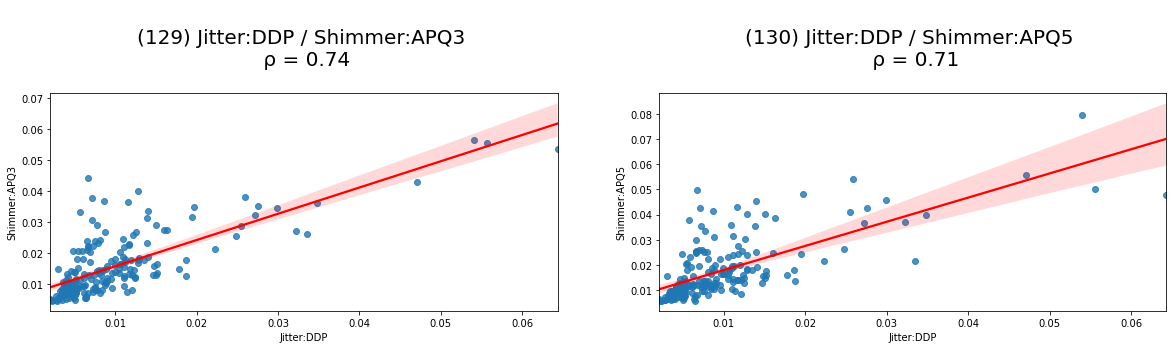

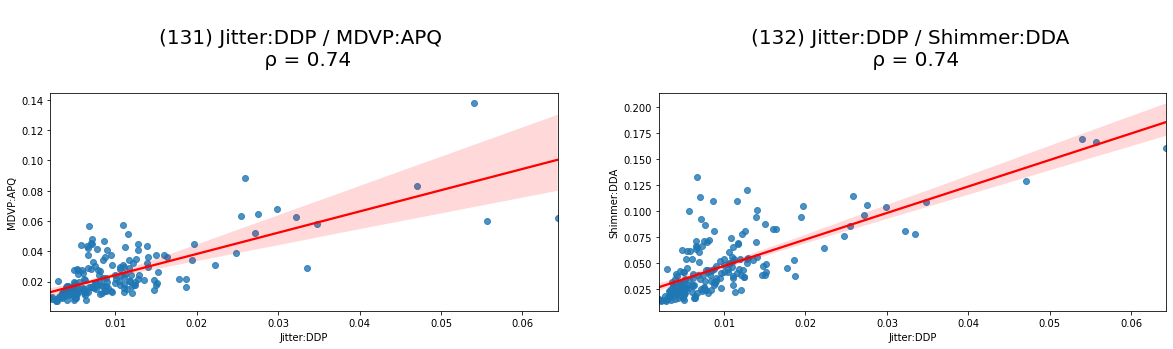

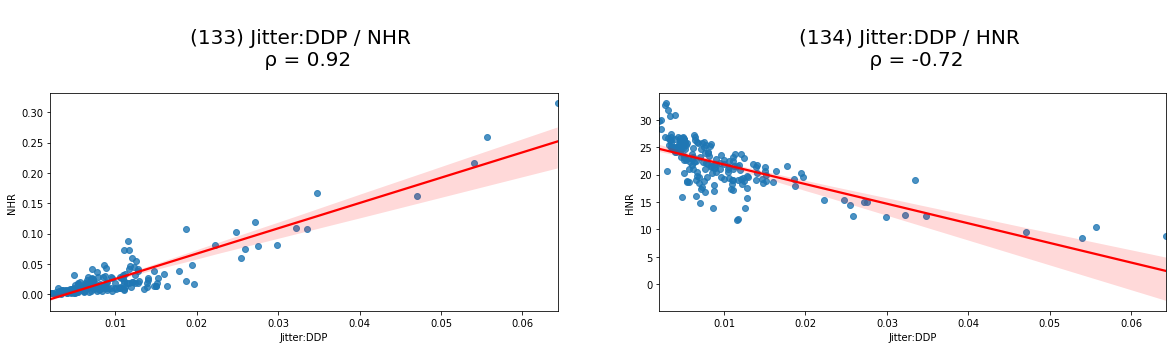

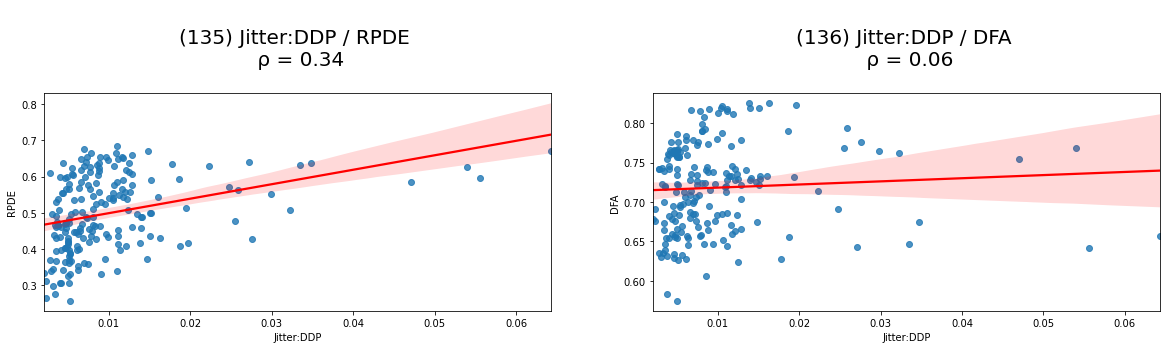

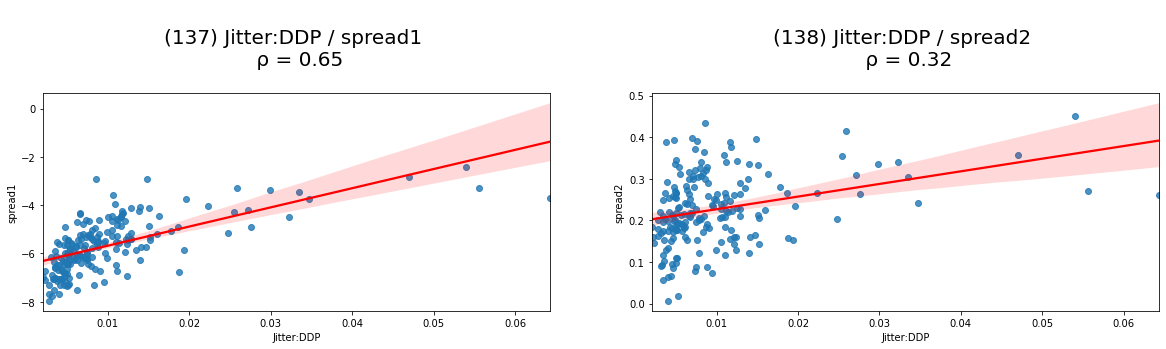

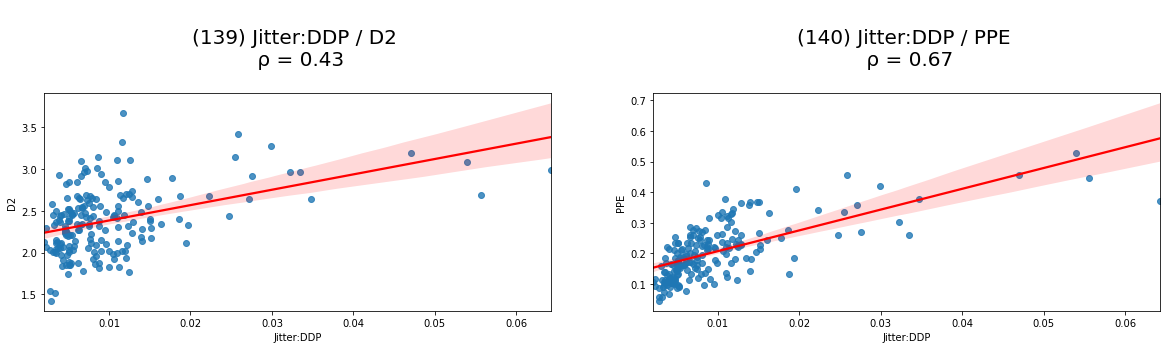

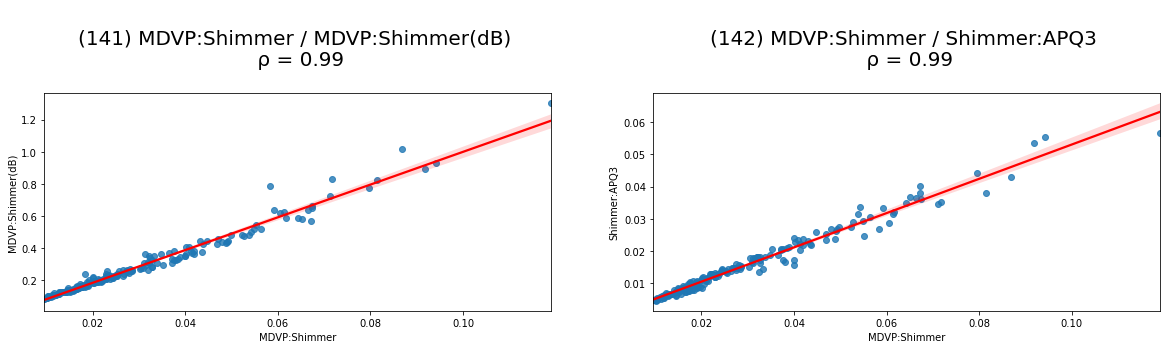

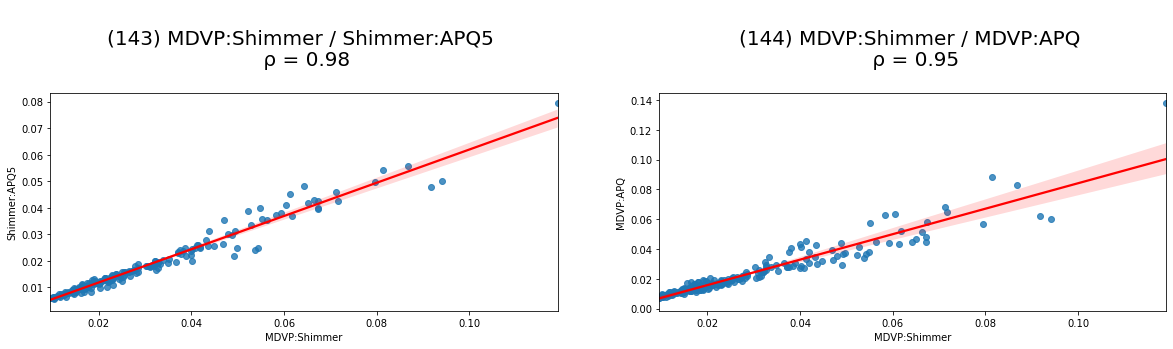

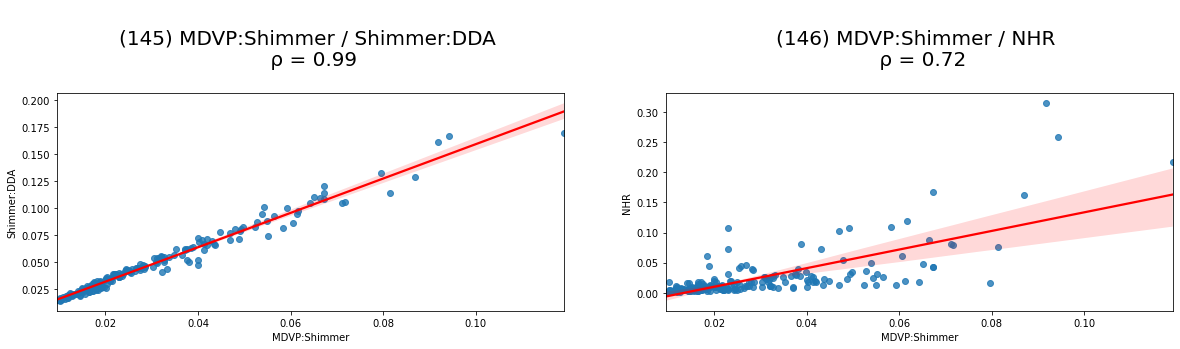

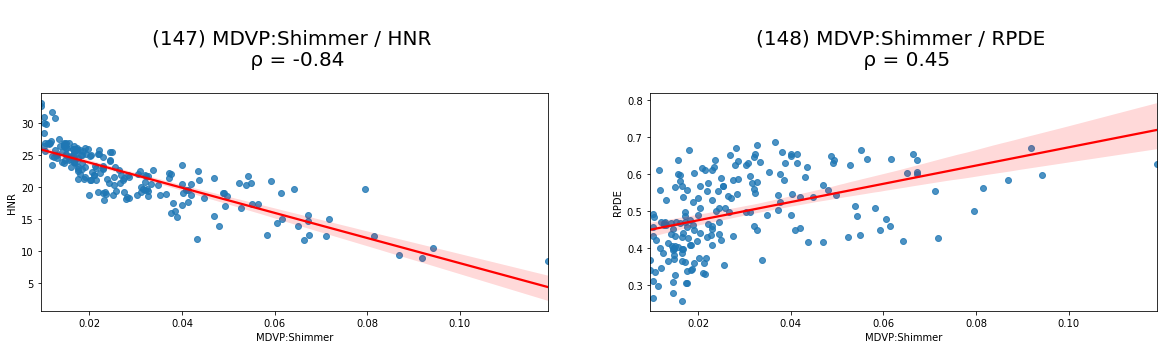

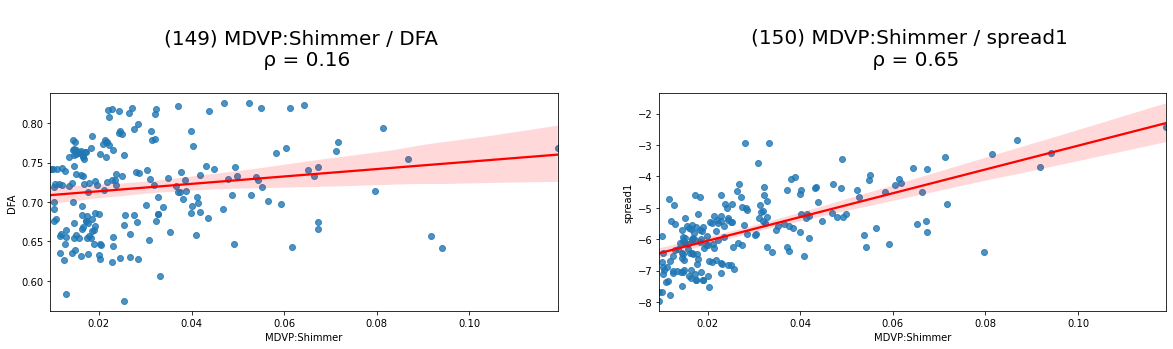

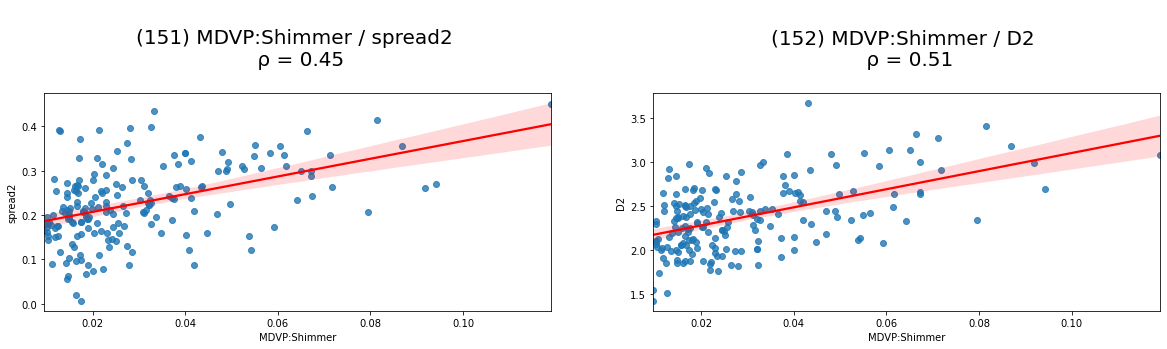

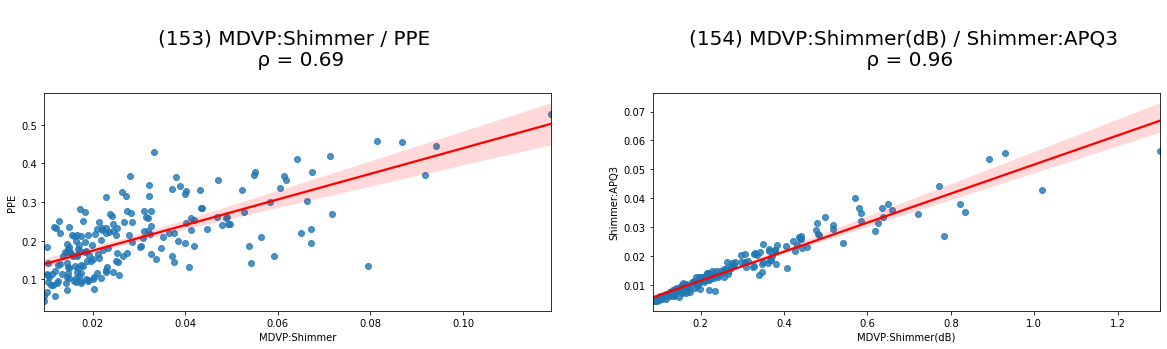

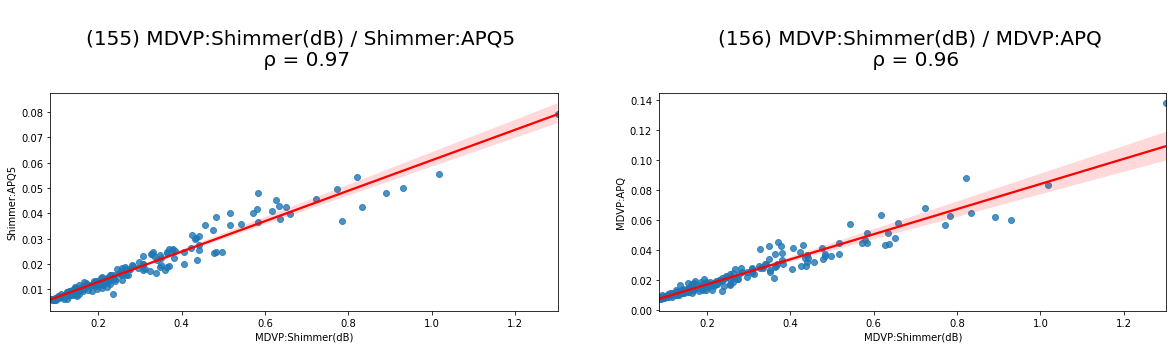

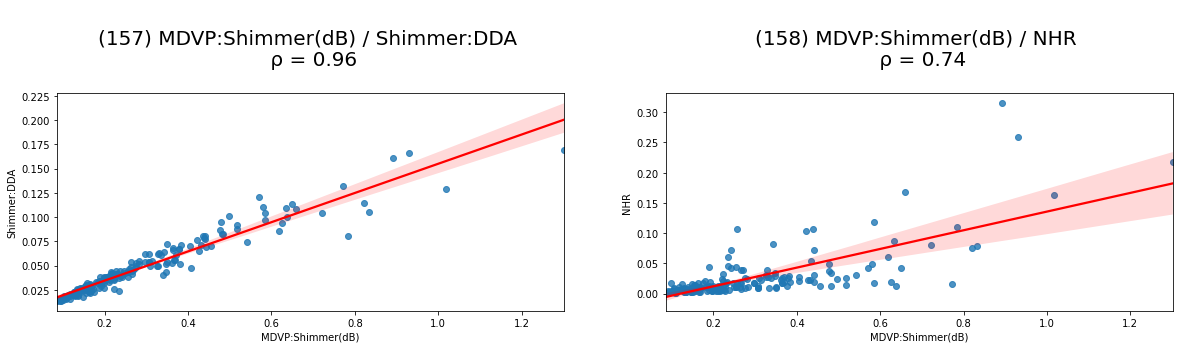

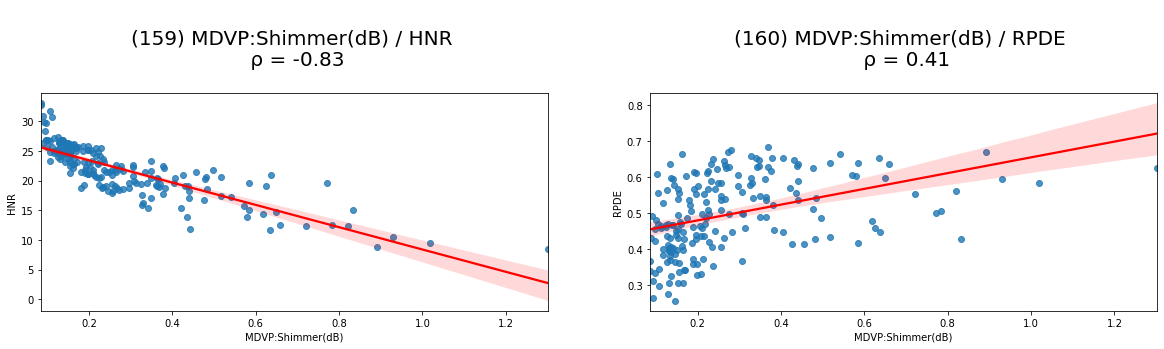

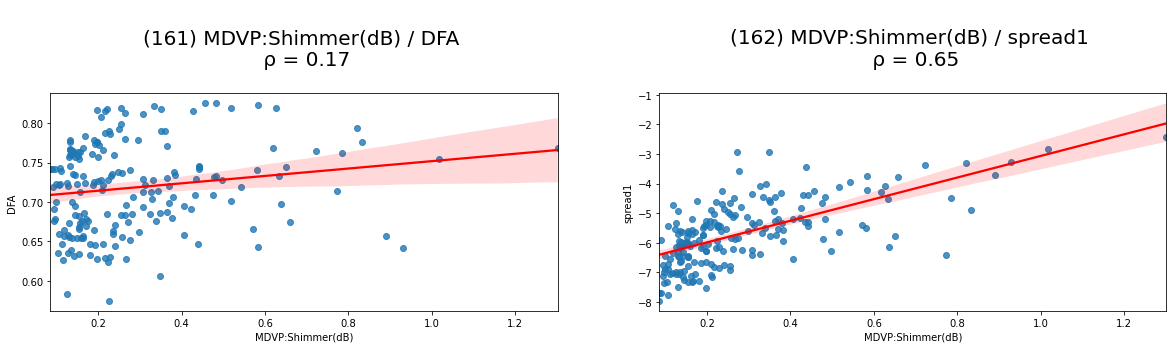

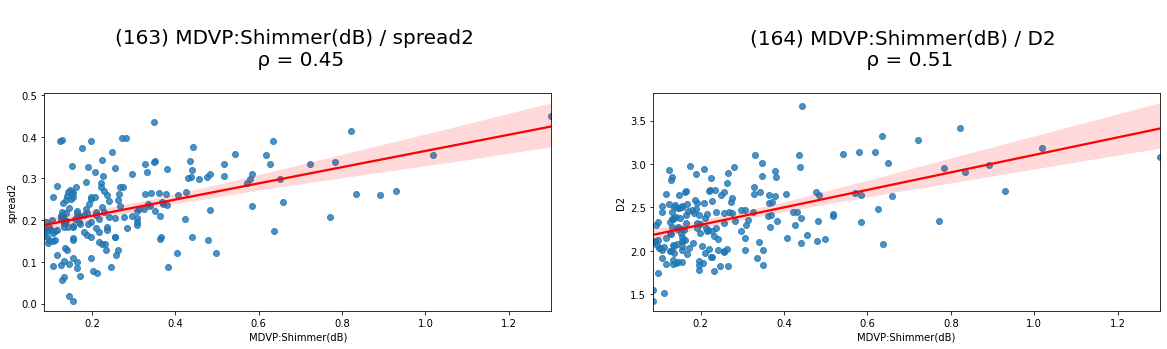

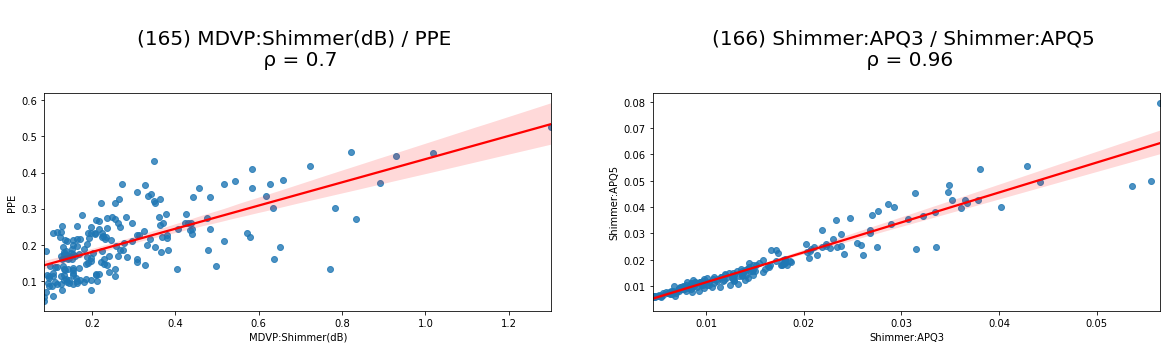

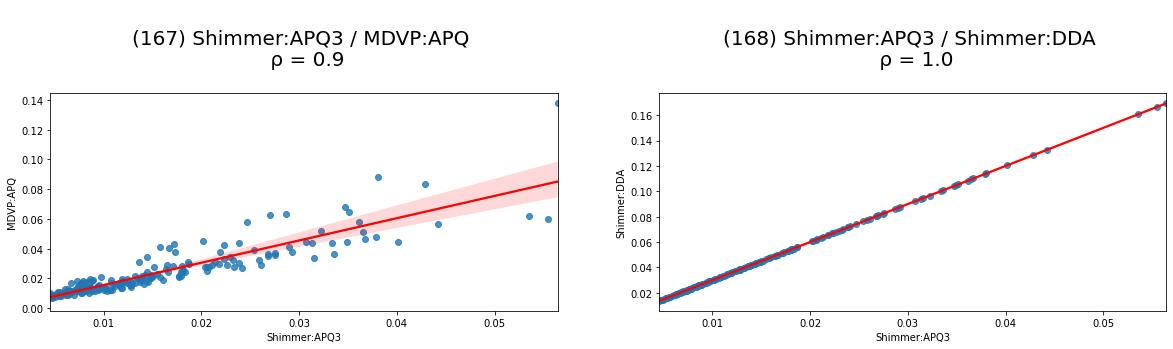

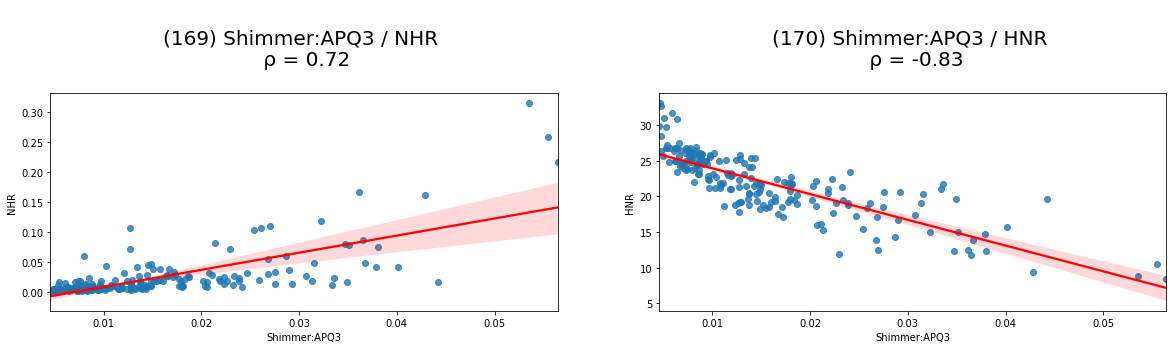

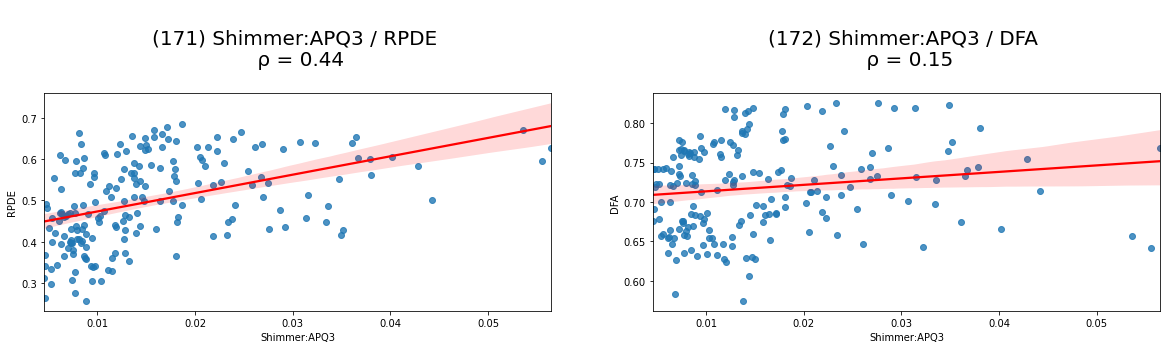

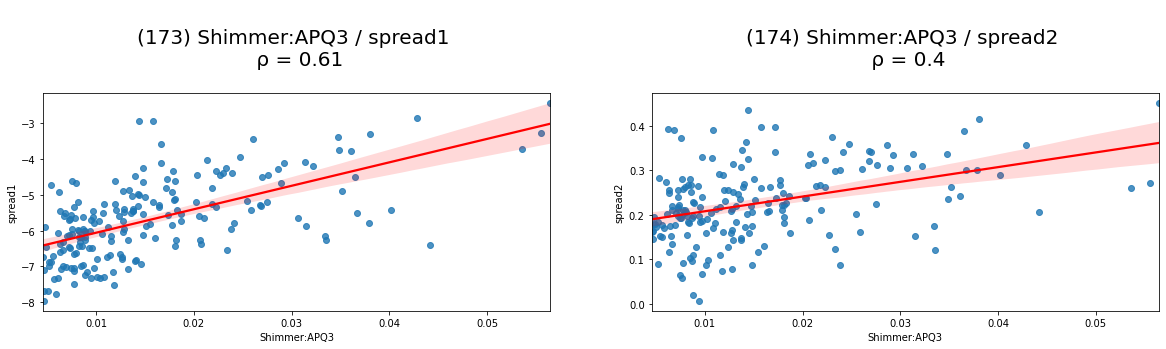

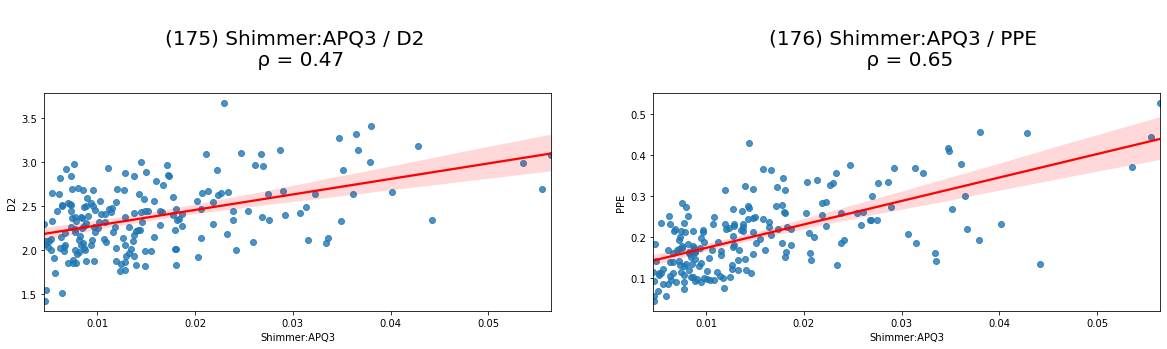

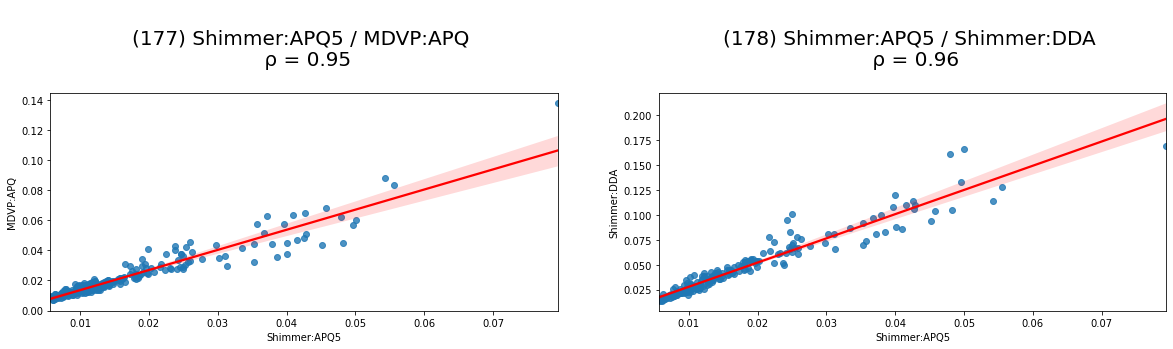

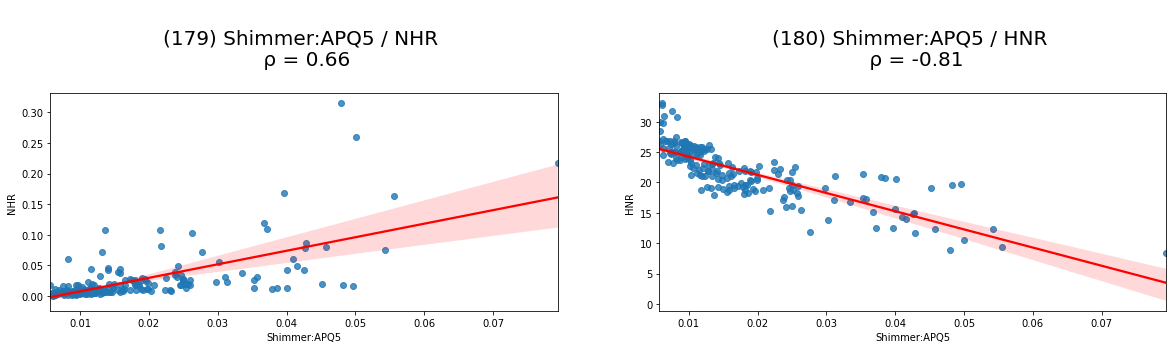

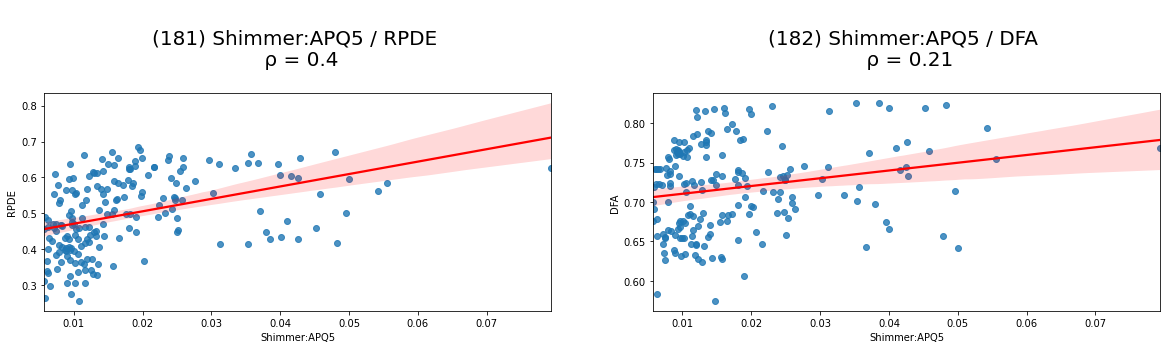

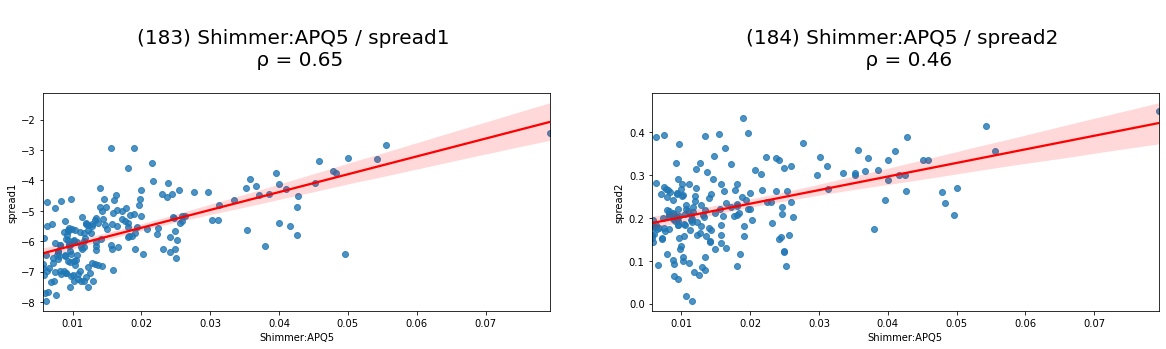

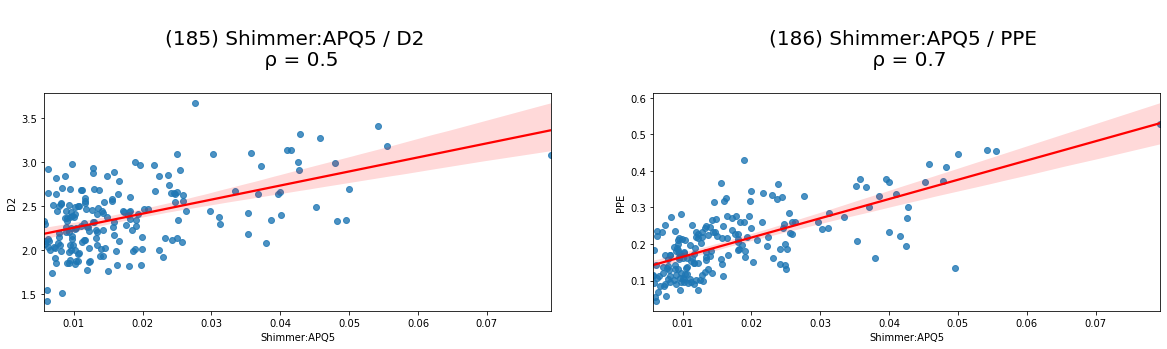

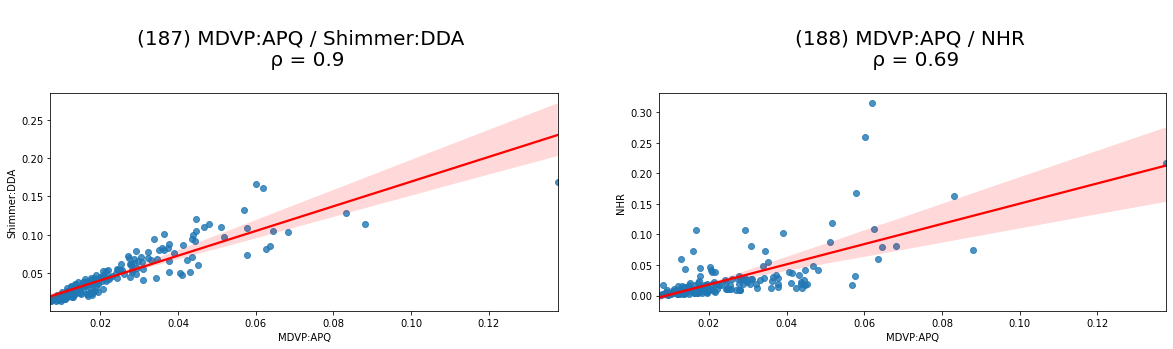

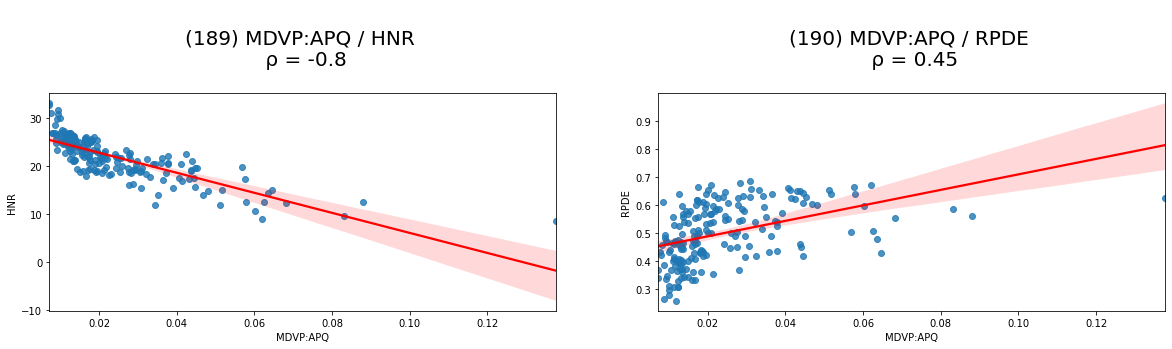

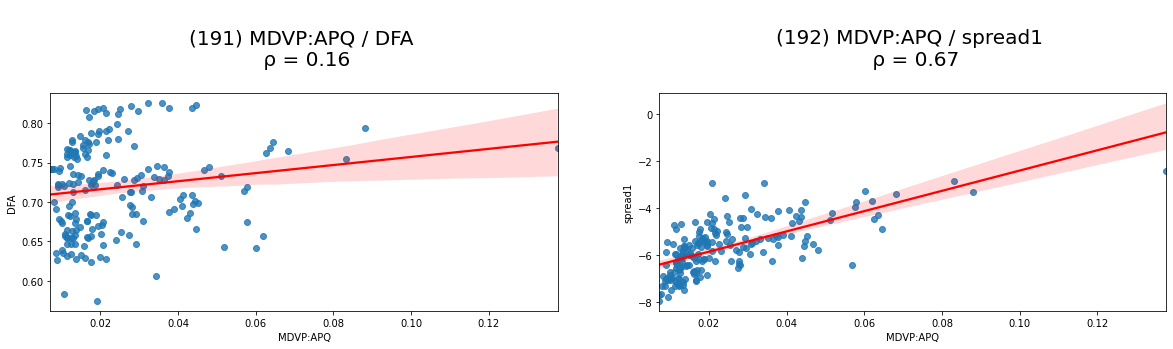

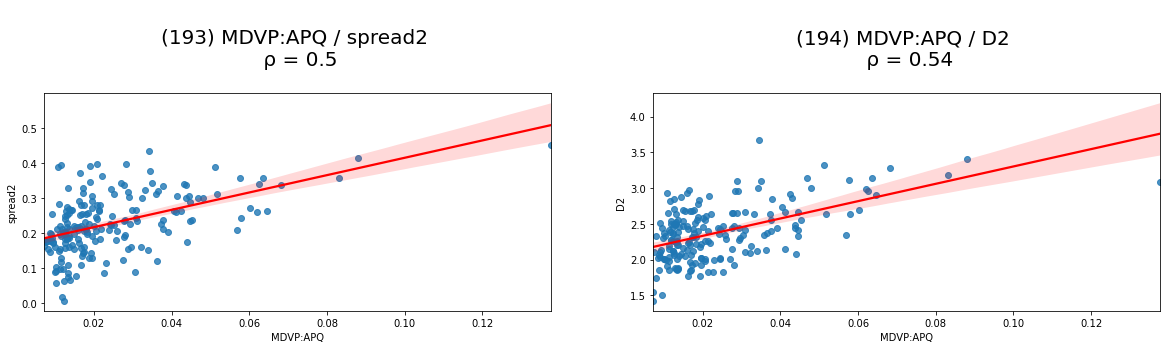

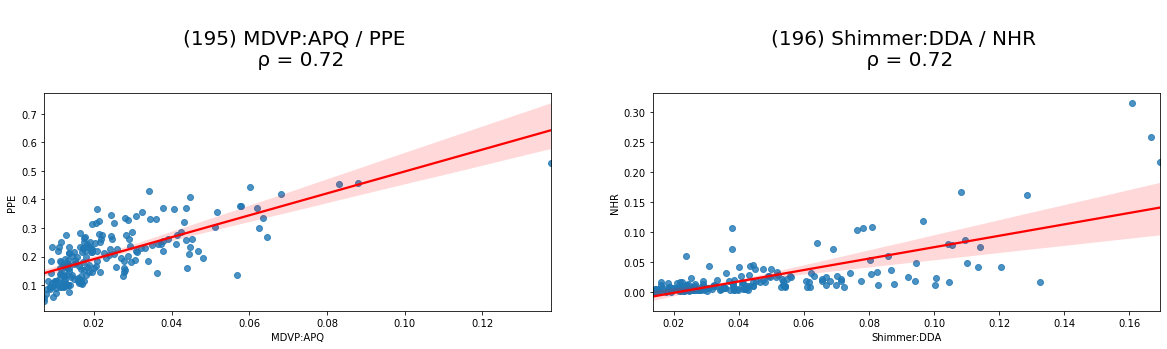

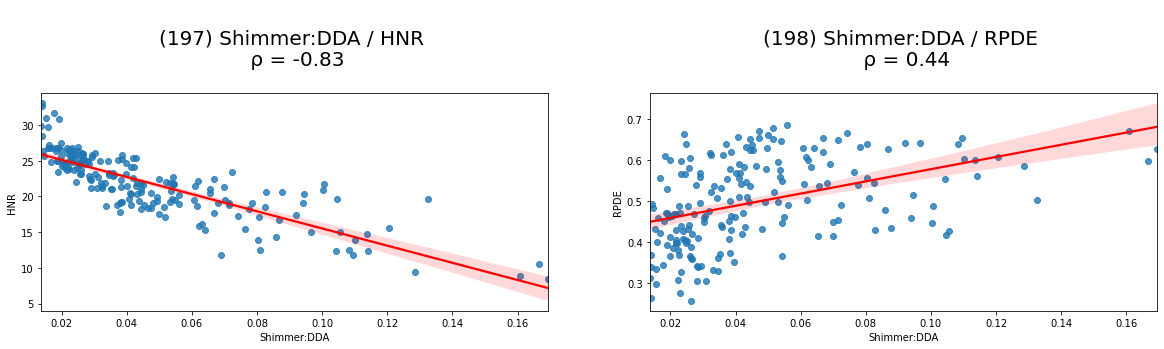

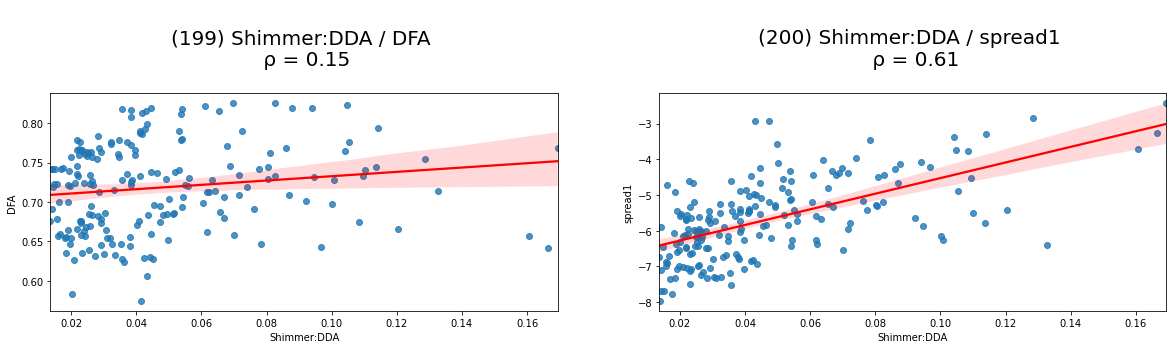

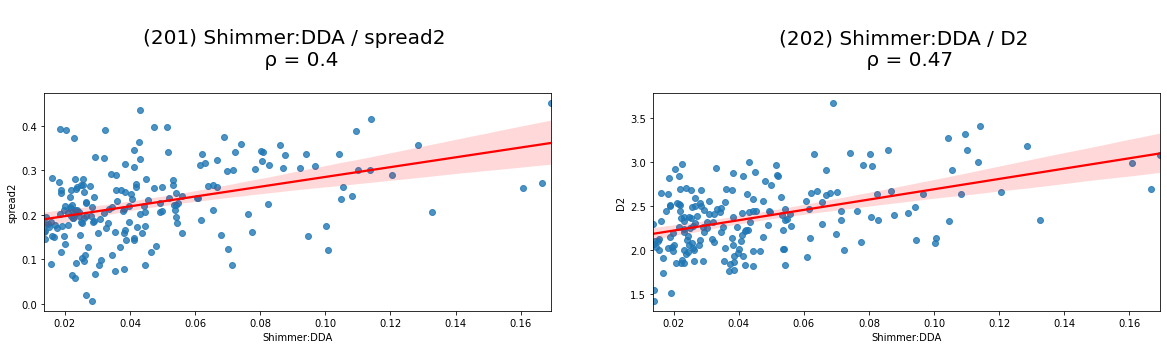

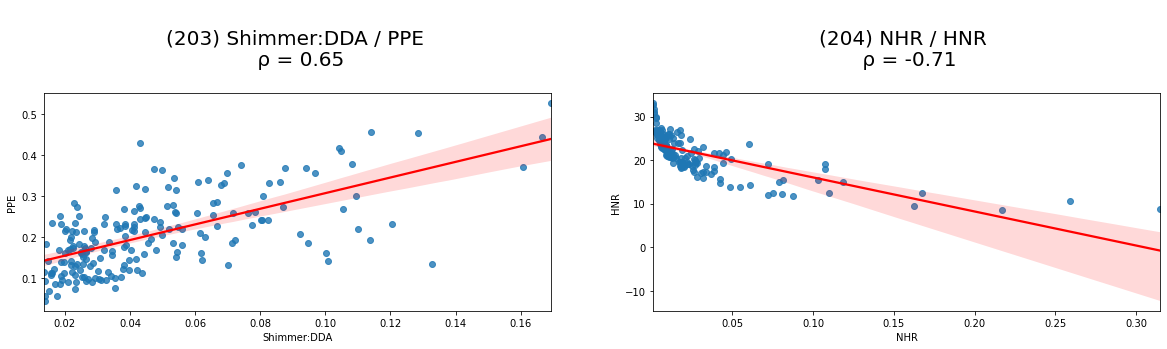

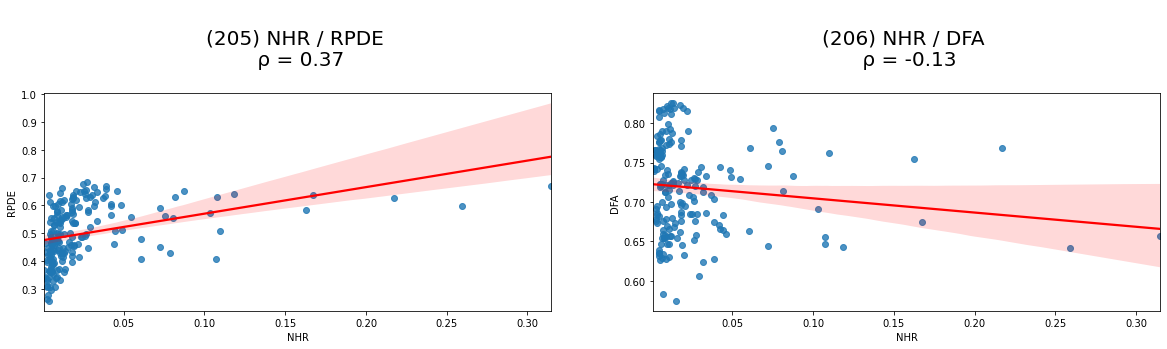

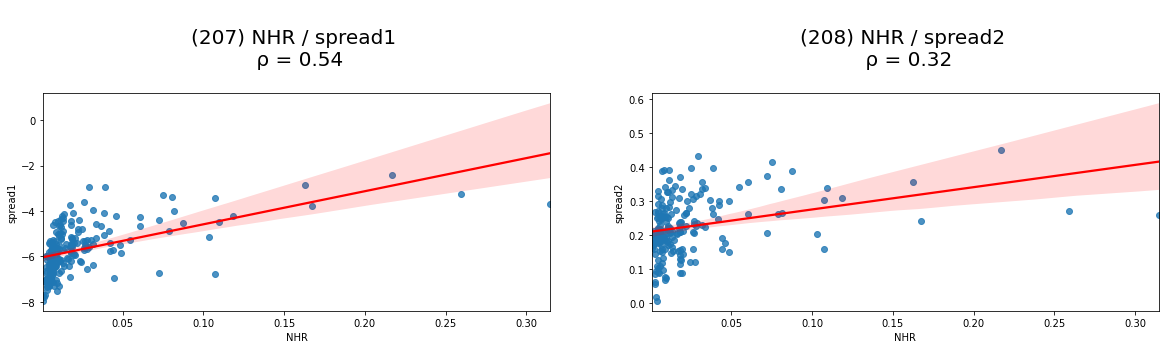

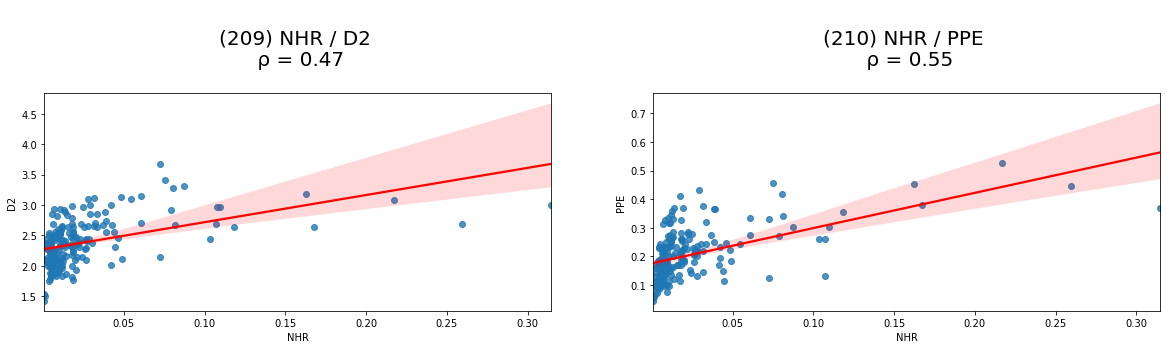

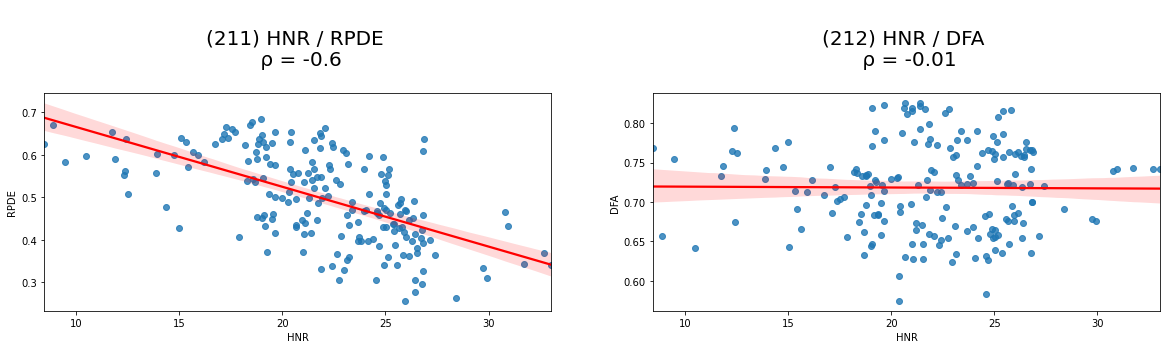

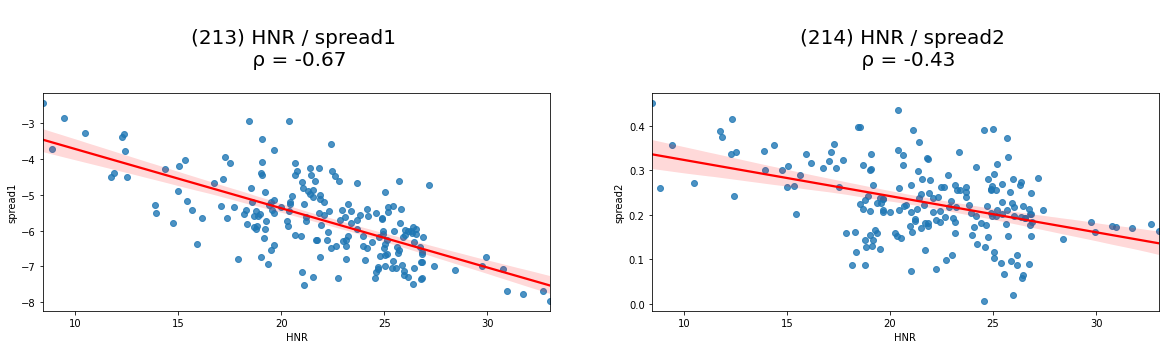

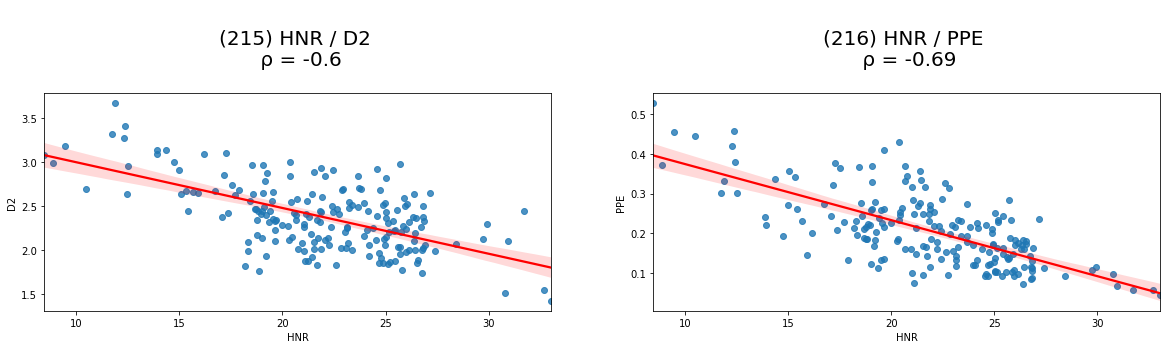

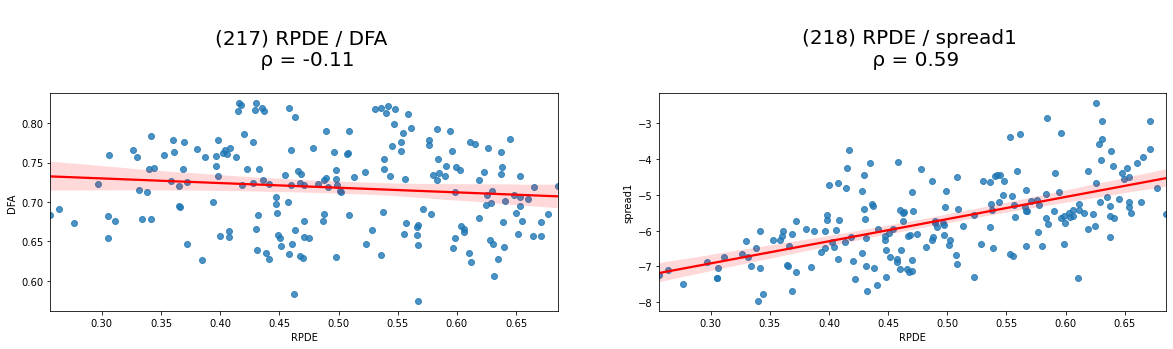

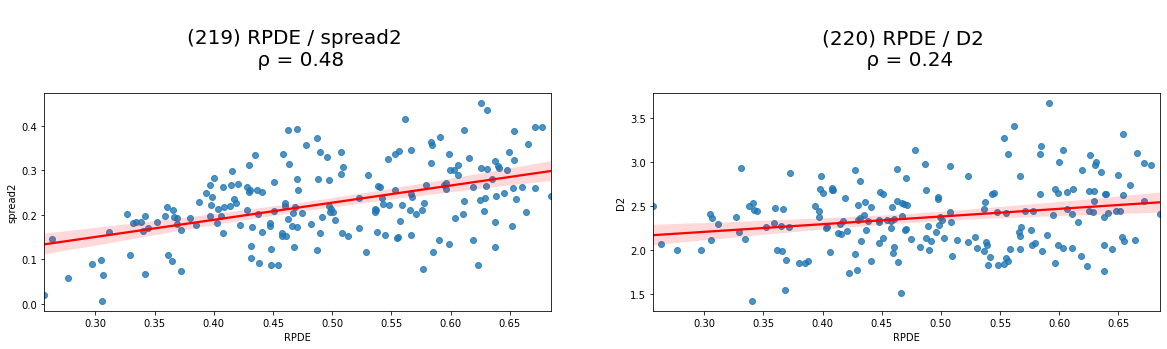

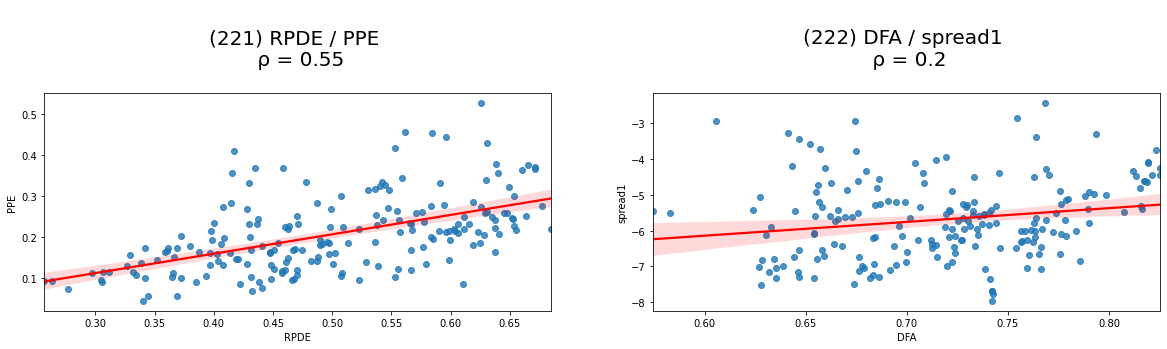

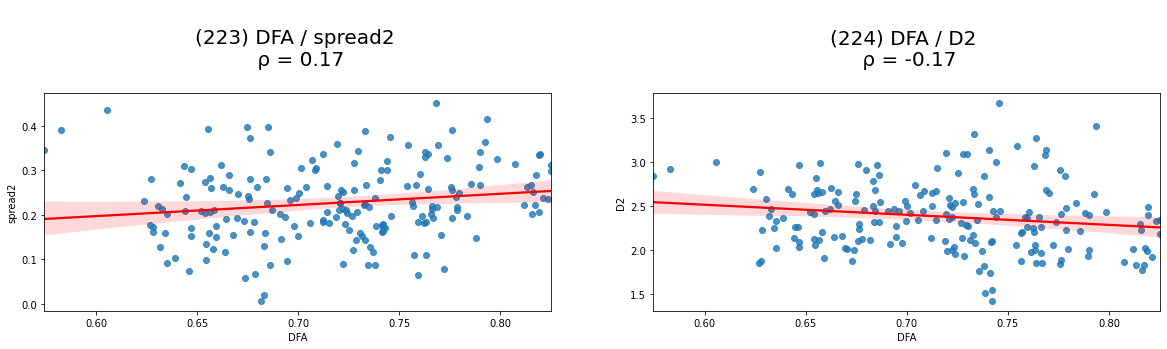

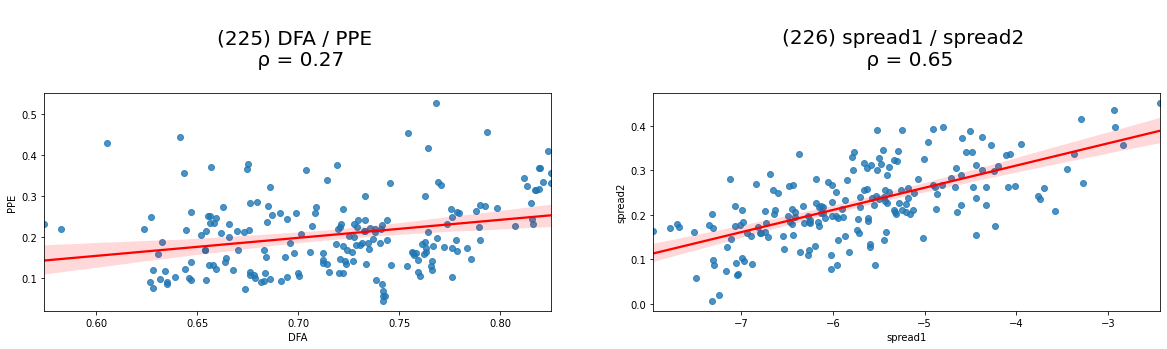

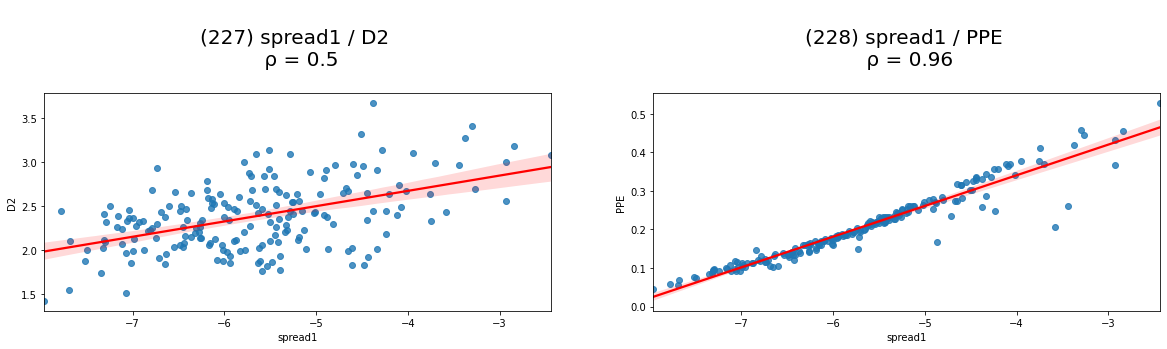

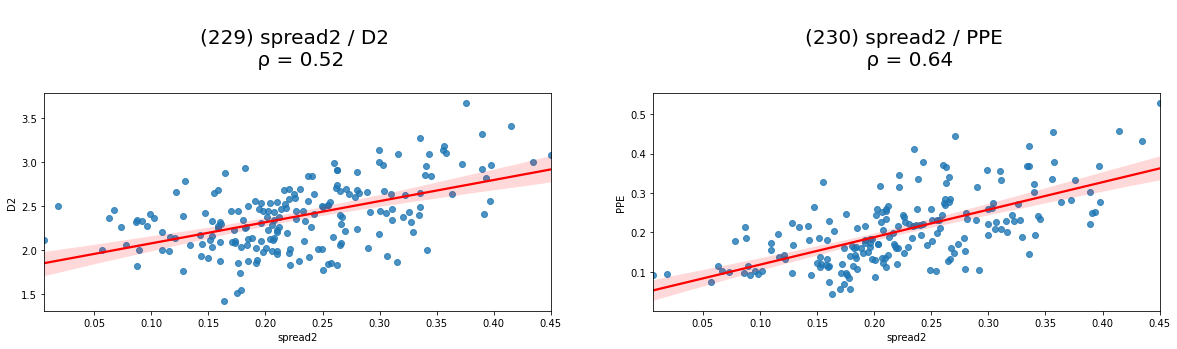

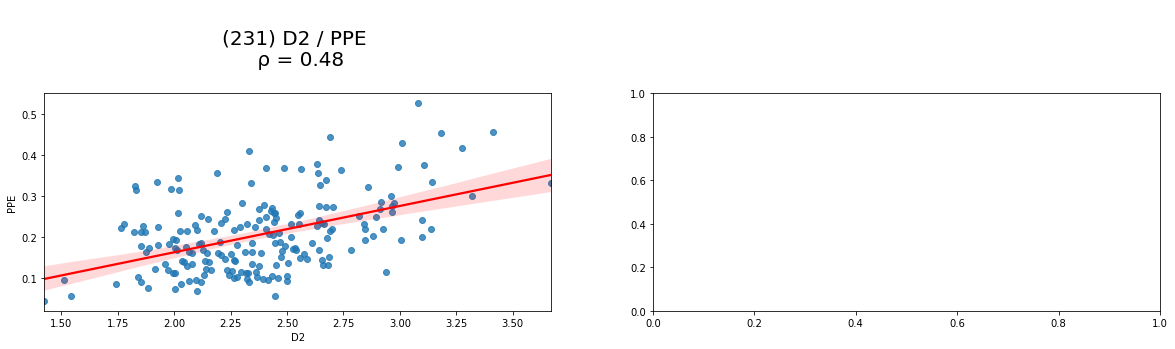

In [16]:
# sns.set(font_scale=1.2)
plots = [_ for _ in itertools.combinations(columns_to_show,2)]
num_cols=2
for i in tqdm(range(0,len(plots),2)):
    fig, ax = plt.subplots(1,num_cols,figsize=(20,4)) 
    
    sns.regplot(plots[i][0], 
               plots[i][1], 
               data=df, 
              fit_reg=1,
              line_kws={'color': 'red'},
               ax=ax[0]);
    ax[0].set_title(f"\n({i+1}) {plots[i][0]} / {plots[i][1]} \n ρ = {round(df[plots[i][0]].corr(df[plots[i][1]]),2)}\n",fontdict=dict(fontsize=20))
    
    if (len(plots)-i) >=2 :
        sns.regplot(plots[i+1][0], 
                   plots[i+1][1], 
                   data=df, 
                  fit_reg=1,
                  line_kws={'color': 'red'},
                   ax=ax[1]);
        ax[1].set_title(f"\n({i+2}) {plots[i+1][0]} / {plots[i+1][1]} \n ρ = {round(df[plots[i+1][0]].corr(df[plots[i+1][1]]),2)}\n",fontdict=dict(fontsize=20))

clear_output(wait=True)         
fig.show()


#### Observations:
1. Out of 231 regression plots almost 185 show a strong correlation between variables.
2. Jitter components show a strong linear relationship among themselves.
3. Jitter components also show a strong linear relationship with Shimmer components.
4. NHR and HNR show inverse linear relationship between them. 
5. Spread1 and Spread2 also exhist a strong linear relationship.

### (10) Visulaizing distribution of Continuous and Categorical varaibles

#### (10.1) Histograms of continuous variables and Normality test

In [17]:
#re-running the categorisation function
cat_var_list,cont_var_list,cats_df1= create_variable_list(df,10,stats=True)
cats_df1

Variable         Type Categorical_Class Uniques N-Uniques
0             status  Categorical            Binary  [1, 0]         2
1        MDVP:Fo(Hz)   Continuous               NaN     NaN       195
2       MDVP:Fhi(Hz)   Continuous               NaN     NaN       195
3       MDVP:Flo(Hz)   Continuous               NaN     NaN       195
4     MDVP:Jitter(%)   Continuous               NaN     NaN       173
5   MDVP:Jitter(Abs)   Continuous               NaN     NaN        19
6           MDVP:RAP   Continuous               NaN     NaN       155
7           MDVP:PPQ   Continuous               NaN     NaN       165
8         Jitter:DDP   Continuous               NaN     NaN       180
9       MDVP:Shimmer   Continuous               NaN     NaN       188
10  MDVP:Shimmer(dB)   Continuous               NaN     NaN       149
11      Shimmer:APQ3   Continuous               NaN     NaN       184
12      Shimmer:APQ5   Continuous               NaN     NaN       189
13          MDVP:APQ   Continuous               NaN     NaN       189
14       Shimmer:DDA   Continuous               NaN     NaN       189
15               NHR   Continuous               NaN     NaN       185
16               HNR   Continuous               NaN     NaN       195
17              RPDE   Continuous               NaN     NaN       195
18               DFA   Continuous               NaN     NaN       195
19           spread1   Continuous               NaN     NaN       195
20           spread2   Continuous               NaN     NaN       194
21                D2   Continuous               NaN     NaN       195
22               PPE   Continuous               NaN     NaN       195
23              name      Objects               NaN     NaN       195

In [18]:
def get_Normality_Check(df):
    '''
    This function uses Shpiro-Wilk method to test Normality at an alpha of 0.05.
    Ho: The sample  data is Normally distributed.
    H1: The sample data is not Normally distributed.
    Usage:
        1) df : Data Frame with all features who's normality needs to be tested.
    Returns:
        1) DataFrame with Features, Normality (yes/No) and corresponding P_value as columns.
    '''
    alpha = 0.05
    normal,p_value,cols=[],[],[]
    for i in df.columns:
        if (df[i].dtype.name == 'int64' or df[i].dtype.name == 'float64'):
            data = df[i]
            if shapiro(data)[1] > alpha :
                normal.append('Yes')
            else:
                normal.append('No')
            p_value.append(round(shapiro(data)[1],8))
            cols.append(i)
        else:
            pass
    normality_df = pd.DataFrame({'Features':cols,'Normality':normal,'P-Value':p_value})
    normality_df.set_index('Features',inplace=True)
    return(normality_df)


#Testing Only
#=============
# get_Normality_Check(df)

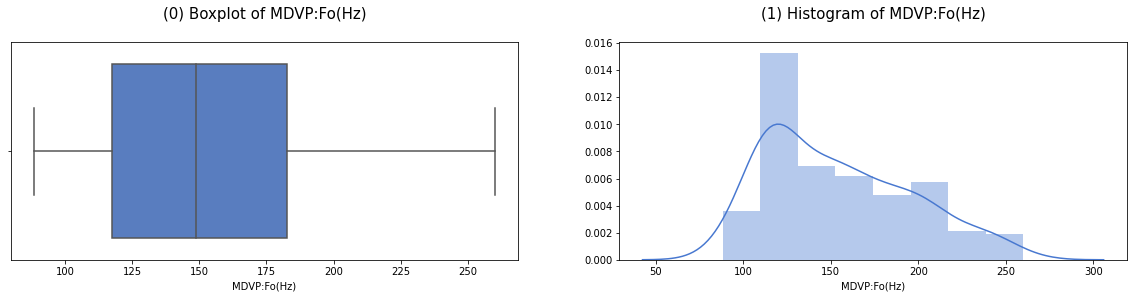

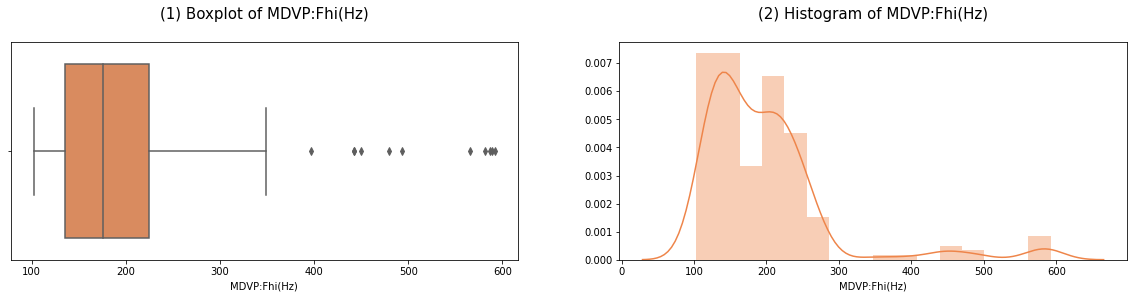

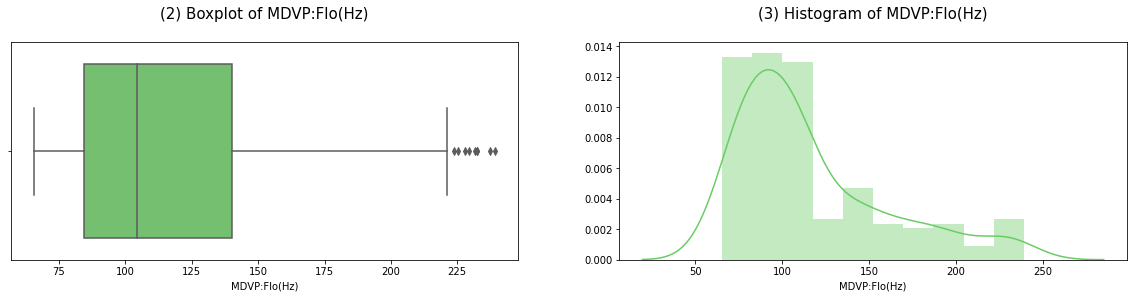

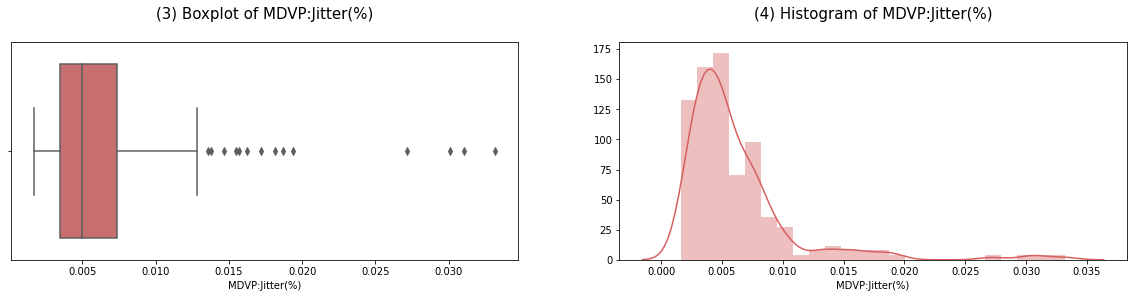

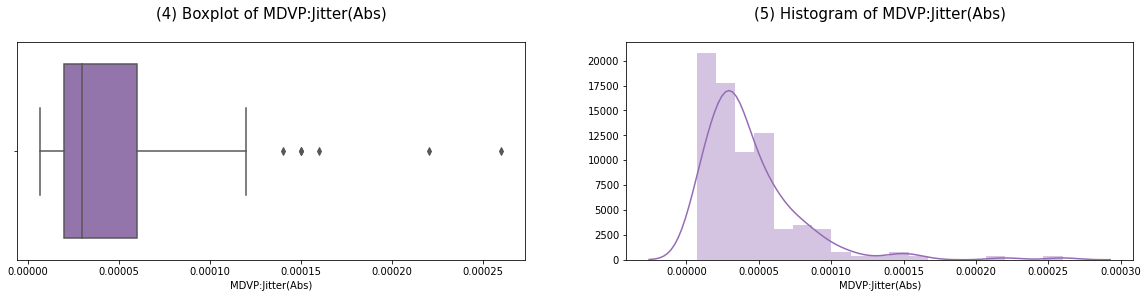

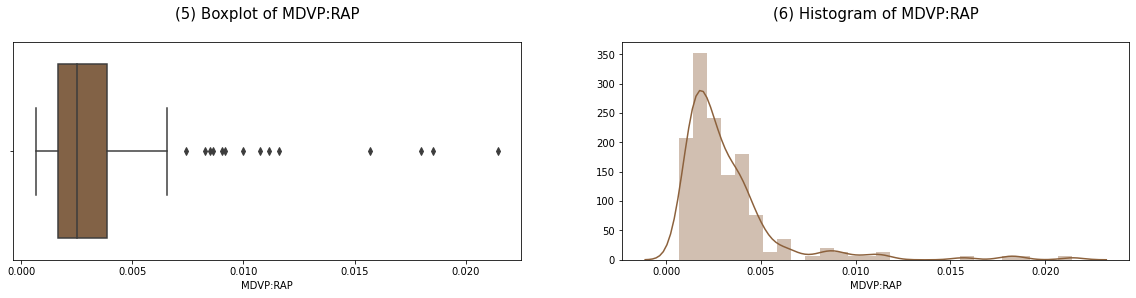

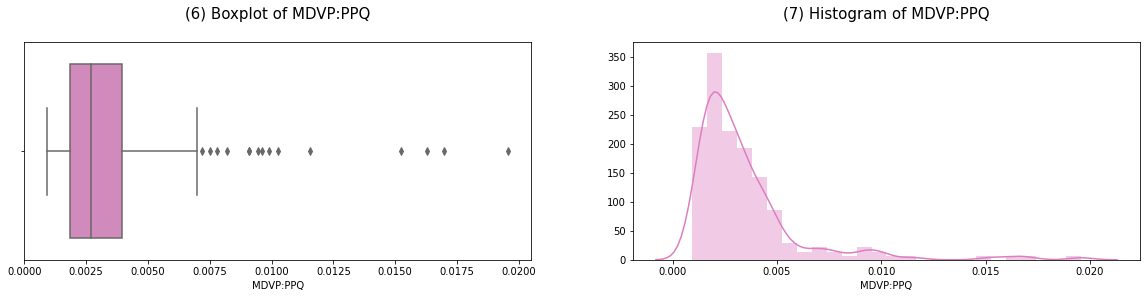

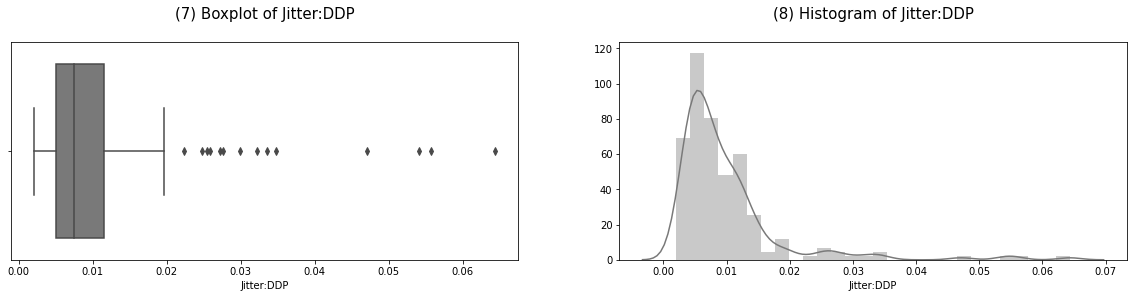

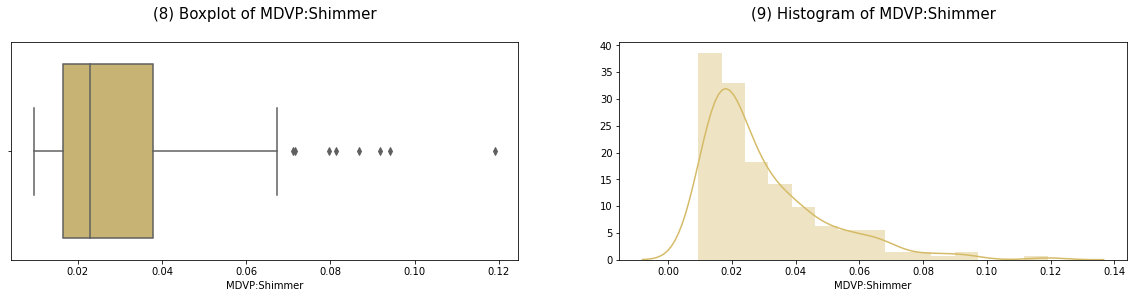

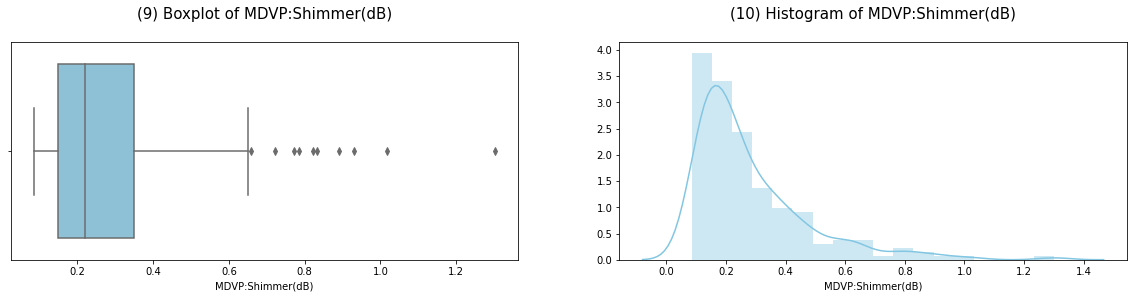

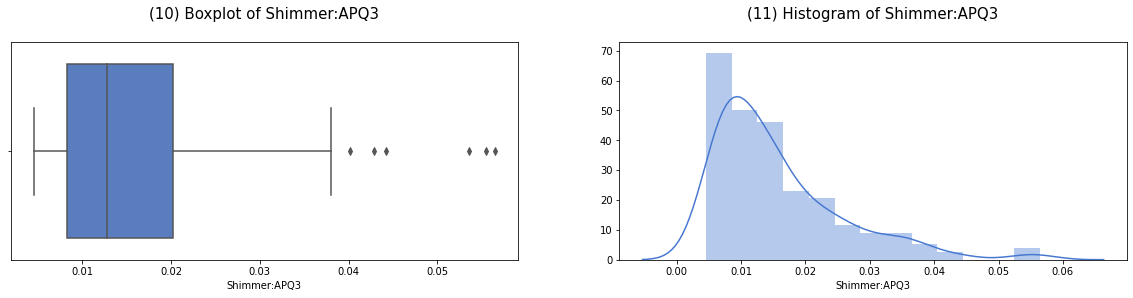

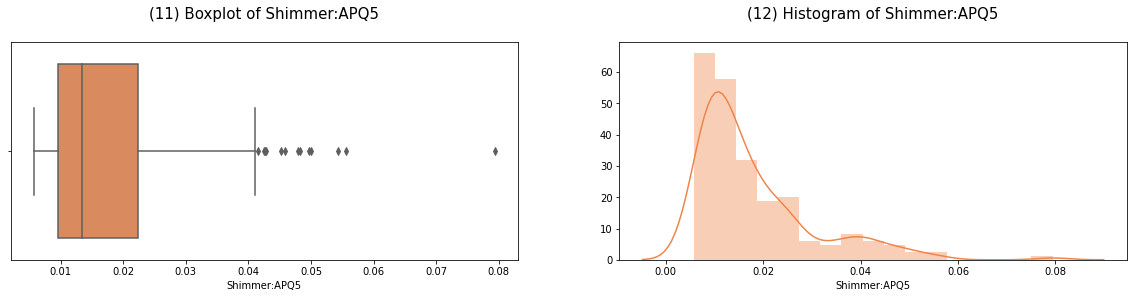

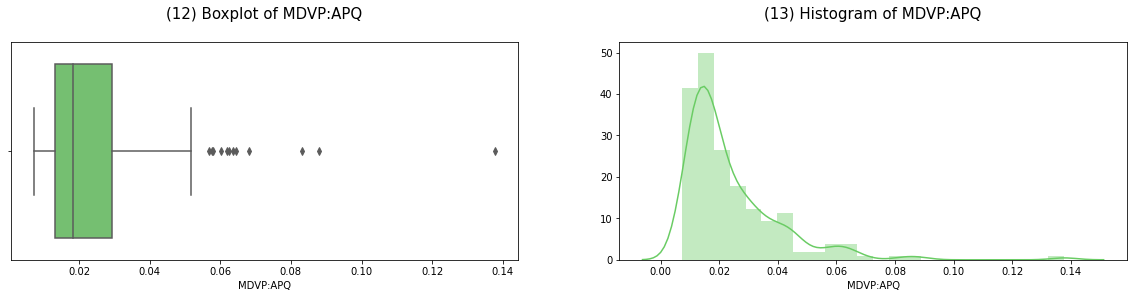

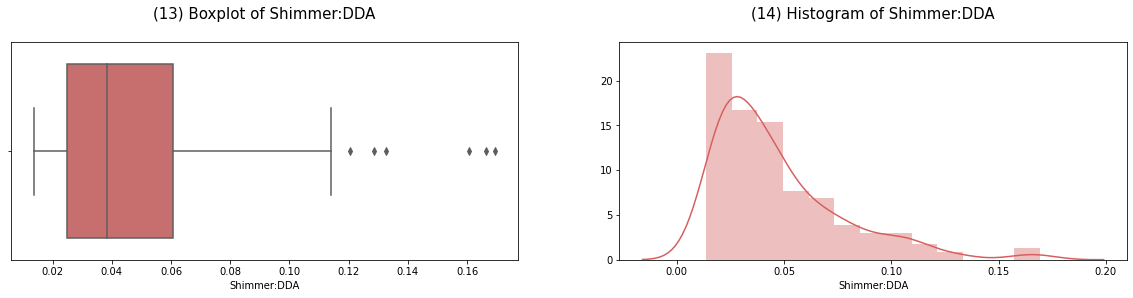

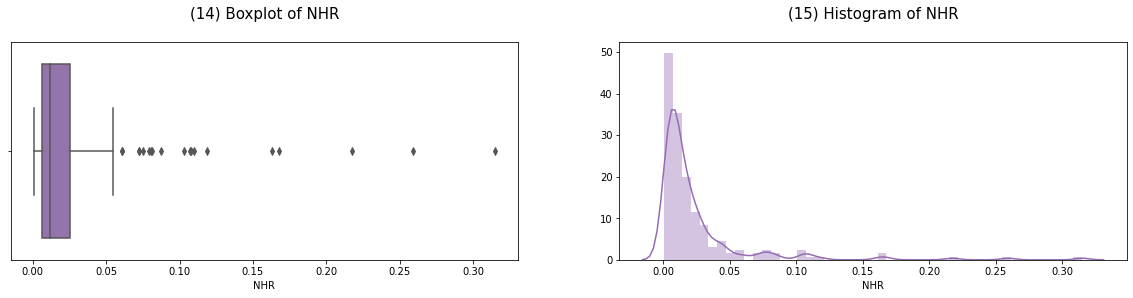

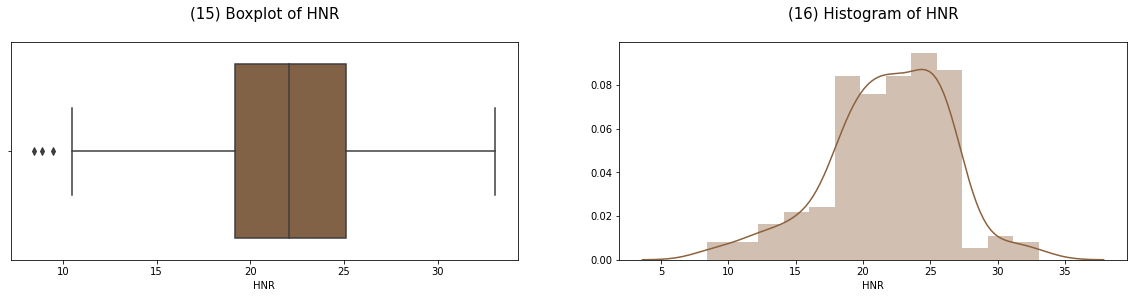

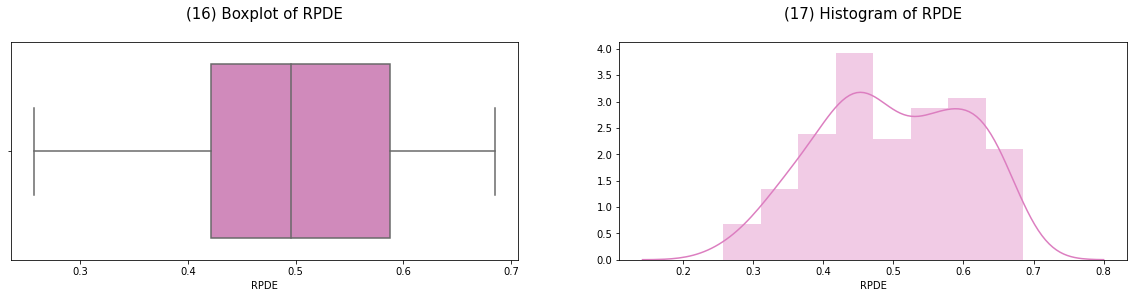

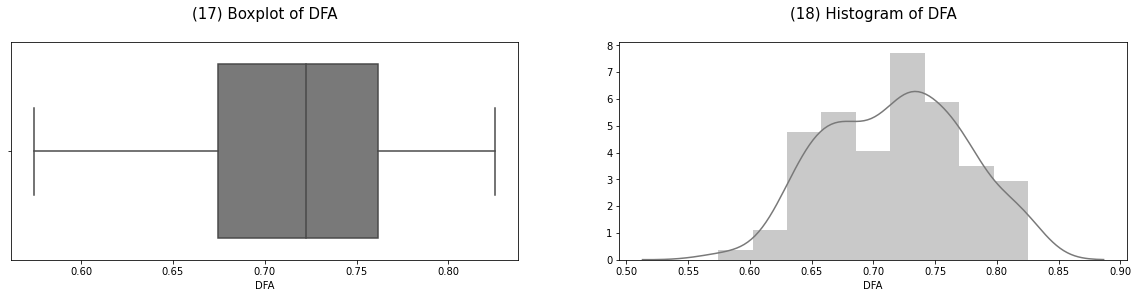

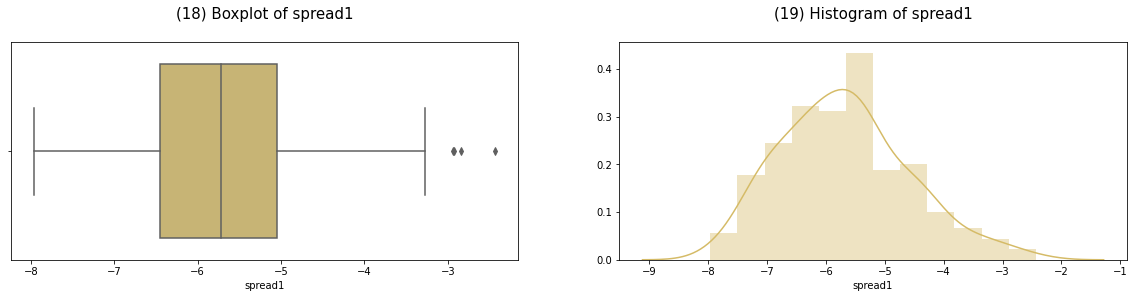

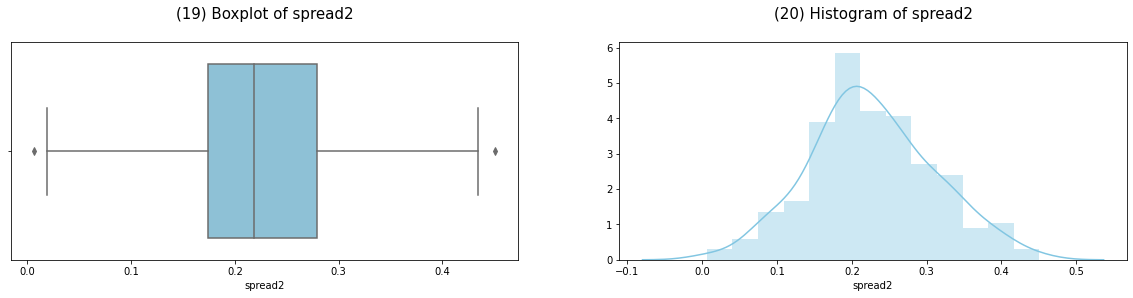

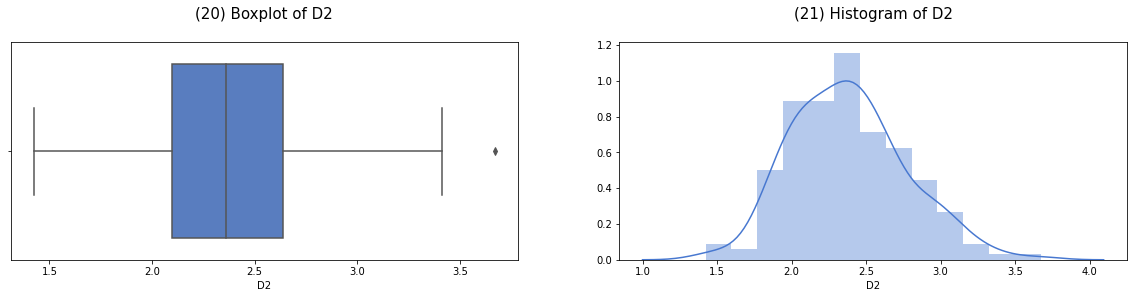

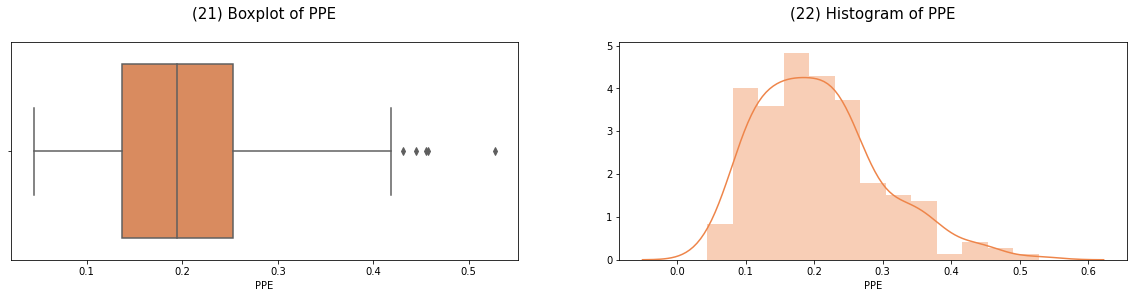

In [19]:
sncp_c1 = sns.color_palette("muted", 40)
if 'name' in cont_var_list:
    cont_var_list.remove('name')
else:
    pass


num_cols=2

for color,index in enumerate(tqdm(range(0,len(cont_var_list)))):
    fig, ax = plt.subplots(1,num_cols,figsize=(20,4)) 
    sns.boxplot(df[cont_var_list[index]],color=sncp_c1[color],ax=ax[0]);
    ax[0].set_title(f'({index}) Boxplot of {cont_var_list[index]}\n',{'fontsize':15})
    
    sns.distplot(df[cont_var_list[index]],kde=True,color=sncp_c1[color],ax=ax[1]);
    ax[1].set_title(f'({index+1}) Histogram of {cont_var_list[index]}\n',{'fontsize':15})
    
clear_output(wait=True) 
plt.show()

#### Observations:
1. All numeric variables are either left or right skewed which also shows the presence of outliers in the data.
2. No significant or invalid outliers.
3. Only variable spread2 seems to be normally distributed. We will test for normality.

In [20]:
print("\nBin'd data are not displayed in this chart\n")
get_Normality_Check(df)


Bin'd data are not displayed in this chart



Normality       P-Value
Features                                
MDVP:Fo(Hz)             No  1.700000e-07
MDVP:Fhi(Hz)            No  0.000000e+00
MDVP:Flo(Hz)            No  0.000000e+00
MDVP:Jitter(%)          No  0.000000e+00
MDVP:Jitter(Abs)        No  0.000000e+00
MDVP:RAP                No  0.000000e+00
MDVP:PPQ                No  0.000000e+00
Jitter:DDP              No  0.000000e+00
MDVP:Shimmer            No  0.000000e+00
MDVP:Shimmer(dB)        No  0.000000e+00
Shimmer:APQ3            No  0.000000e+00
Shimmer:APQ5            No  0.000000e+00
MDVP:APQ                No  0.000000e+00
Shimmer:DDA             No  0.000000e+00
NHR                     No  0.000000e+00
HNR                     No  6.426400e-04
status                  No  0.000000e+00
RPDE                    No  5.725500e-04
DFA                     No  1.432358e-02
spread1                 No  2.568336e-02
spread2                Yes  6.545005e-01
D2                      No  4.268244e-02
PPE                     No  1.047000e-05

#### Observation: 
1. Yes. Only spread2 is normally distributed as from the visualisation 

#### (10.2) Categorical Plots

#### Convert numerica variables into categorical variables

In [21]:
# Convert numeric variables into categorical variables
for cont_var in cont_var_list:
    df[cont_var+'-Bin'] = pd.cut(df[cont_var],bins=10,precision=0,right=True)
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

     MDVP:APQ-Bin  Shimmer:DDA-Bin           NHR-Bin       HNR-Bin  \
0   (0.02, 0.033]    (0.06, 0.076]  (0.00034, 0.032]  (21.0, 23.0]   
1  (0.033, 0.046]    (0.092, 0.11]  (0.00034, 0.032]  (18.0, 21.0]   
2  (0.033, 0.046]   (0.076, 0.092]  (0.00034, 0.032]  (18.0, 21.0]   
3  (0.033, 0.046]   (0.076, 0.092]  (0.00034, 0.032]  (18.0, 21.0]   
4  (0.033, 0.046]    (0.092, 0.11]  (0.00034, 0.032]  (18.0, 21.0]   

       RPDE-Bin      DFA-Bin   spread1-Bin   spread2-Bin      D2-Bin  \
0  (0.39, 0.43]  (0.8, 0.83]  (-5.2, -4.6]  (0.23, 0.27]  (2.1, 2.3]   
1  (0.43, 0.47]  (0.8, 0.83]  (-4.1, -3.5]  (0.32, 0.36]  (2.3, 2.5]   
2  (0.43, 0.47]  (0.8, 0.83]  (-4.6, -4.1]  (0.27, 0.32]  (2.3, 2.5]   
3  (0.43, 0.47]  (0.8, 0.83]  (-4.6, -4.1]  (0.32, 0.36]  (2.3, 2.5]   
4  (0.39, 0.43]  (0.8, 0.83]  (-4.1, -3.5]  (0.23, 0.27]  (2.3, 2.5]   

        PPE-Bin  
0  (0.24, 0.29]  
1  (0.33, 0.38]  
2  (0.29, 0.33]  
3  (0.33, 0.38]  
4  (0.38, 0.43]  

[5 rows x 46 columns]

In [22]:
#re-running the categorisation function
cat_var_list,cont_var_list,cats_df1= create_variable_list(df,10,stats=True)
cats_df1

Variable         Type Categorical_Class  \
0                 status  Categorical            Binary   
1        MDVP:Fo(Hz)-Bin  Categorical             Multi   
2       MDVP:Fhi(Hz)-Bin  Categorical             Multi   
3       MDVP:Flo(Hz)-Bin  Categorical             Multi   
4     MDVP:Jitter(%)-Bin  Categorical             Multi   
5   MDVP:Jitter(Abs)-Bin  Categorical             Multi   
6           MDVP:RAP-Bin  Categorical             Multi   
7           MDVP:PPQ-Bin  Categorical             Multi   
8         Jitter:DDP-Bin  Categorical             Multi   
9       MDVP:Shimmer-Bin  Categorical             Multi   
10  MDVP:Shimmer(dB)-Bin  Categorical             Multi   
11      Shimmer:APQ3-Bin  Categorical             Multi   
12      Shimmer:APQ5-Bin  Categorical             Multi   
13          MDVP:APQ-Bin  Categorical             Multi   
14       Shimmer:DDA-Bin  Categorical             Multi   
15               NHR-Bin  Categorical             Multi   
16               HNR-Bin  Categorical             Multi   
17              RPDE-Bin  Categorical             Multi   
18               DFA-Bin  Categorical             Multi   
19           spread1-Bin  Categorical             Multi   
20           spread2-Bin  Categorical             Multi   
21                D2-Bin  Categorical             Multi   
22               PPE-Bin  Categorical             Multi   
23           MDVP:Fo(Hz)   Continuous               NaN   
24          MDVP:Fhi(Hz)   Continuous               NaN   
25          MDVP:Flo(Hz)   Continuous               NaN   
26        MDVP:Jitter(%)   Continuous               NaN   
27      MDVP:Jitter(Abs)   Continuous               NaN   
28              MDVP:RAP   Continuous               NaN   
29              MDVP:PPQ   Continuous               NaN   
30            Jitter:DDP   Continuous               NaN   
31          MDVP:Shimmer   Continuous               NaN   
32      MDVP:Shimmer(dB)   Continuous               NaN   
33          Shimmer:APQ3   Continuous               NaN   
34          Shimmer:APQ5   Continuous               NaN   
35              MDVP:APQ   Continuous               NaN   
36           Shimmer:DDA   Continuous               NaN   
37                   NHR   Continuous               NaN   
38                   HNR   Continuous               NaN   
39                  RPDE   Continuous               NaN   
40                   DFA   Continuous               NaN   
41               spread1   Continuous               NaN   
42               spread2   Continuous               NaN   
43                    D2   Continuous               NaN   
44                   PPE   Continuous               NaN   
45                  name      Objects               NaN   

                                                                                                                                                                                                                                                                                                                                                                                              Uniques  \
0                                                                                                                                                                                                                                                                                                                                                                                              [1, 0]   
1                                                        [(106.0, 123.0], (88.0, 106.0], (123.0, 140.0], (140.0, 157.0], (157.0, 174.0], (191.0, 209.0], (174.0, 191.0], (226.0, 243.0], (243.0, 260.0], (209.0, 226.0]]
Categories (10, interval[float64]): [(88.0, 106.0] < (106.0, 123.0] < (123.0, 140.0] < (140.0, 157.0] ... (191.0, 209.0] < (209.0, 226.0] < (226.0, 243.0] < (243.0, 260.0]]   
2                                                              

#### Barplots for categorical variables 

In [23]:
# Remove the variable 'status' from the list holding categorical variable if present
if 'status' in cat_var_list:
    cat_var_list.remove('status')
cat_var_list

['MDVP:Fo(Hz)-Bin',
 'MDVP:Fhi(Hz)-Bin',
 'MDVP:Flo(Hz)-Bin',
 'MDVP:Jitter(%)-Bin',
 'MDVP:Jitter(Abs)-Bin',
 'MDVP:RAP-Bin',
 'MDVP:PPQ-Bin',
 'Jitter:DDP-Bin',
 'MDVP:Shimmer-Bin',
 'MDVP:Shimmer(dB)-Bin',
 'Shimmer:APQ3-Bin',
 'Shimmer:APQ5-Bin',
 'MDVP:APQ-Bin',
 'Shimmer:DDA-Bin',
 'NHR-Bin',
 'HNR-Bin',
 'RPDE-Bin',
 'DFA-Bin',
 'spread1-Bin',
 'spread2-Bin',
 'D2-Bin',
 'PPE-Bin']

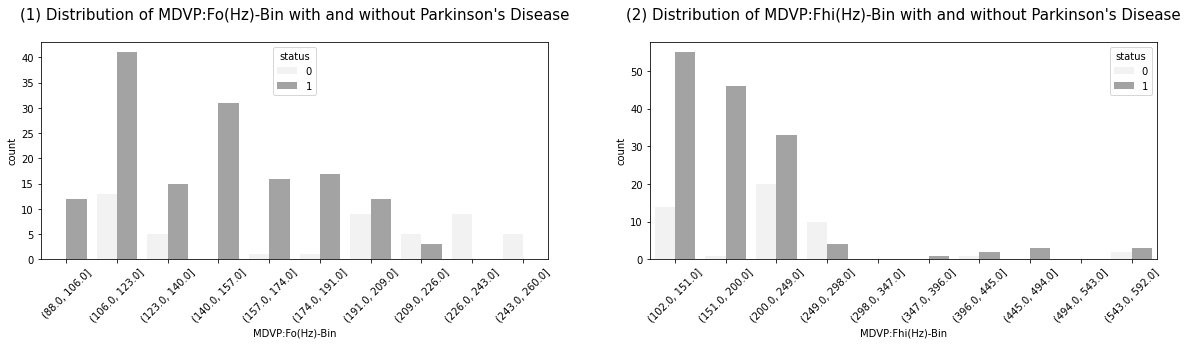

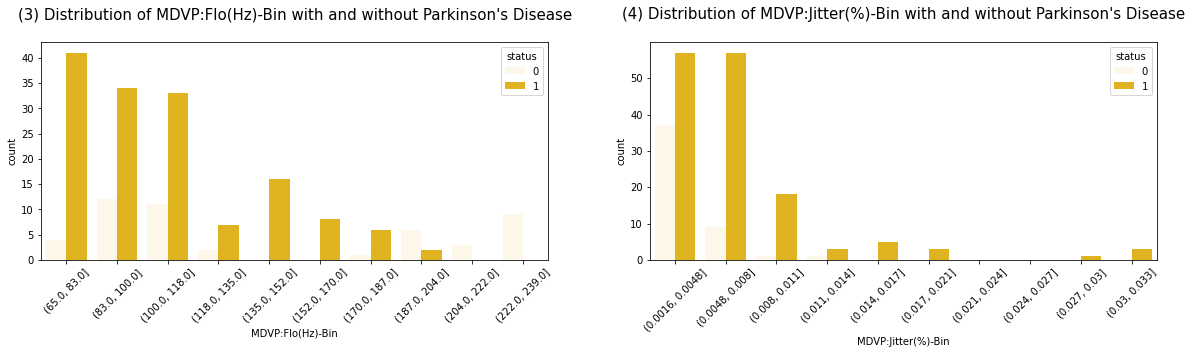

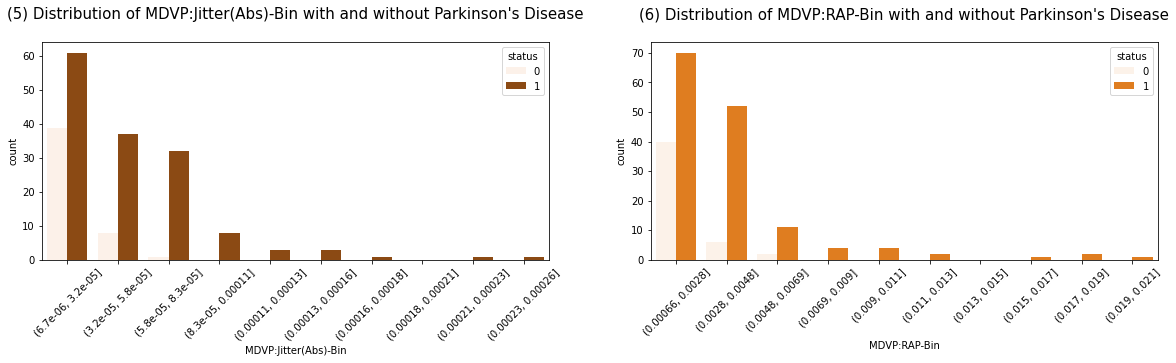

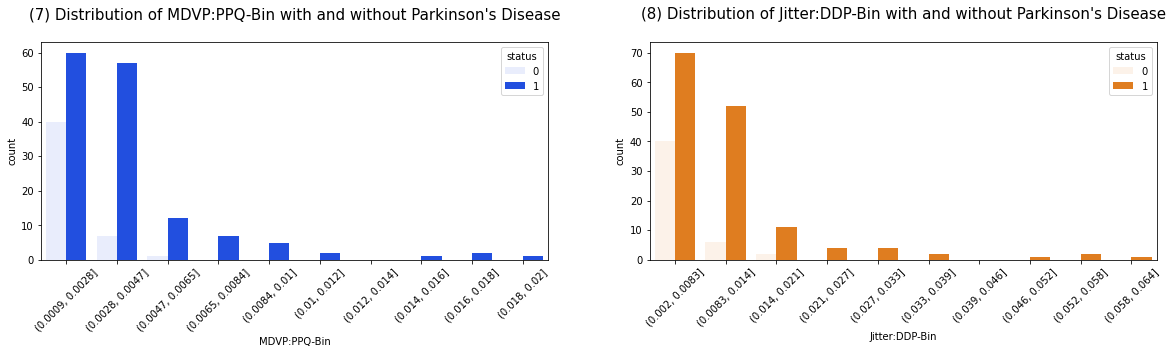

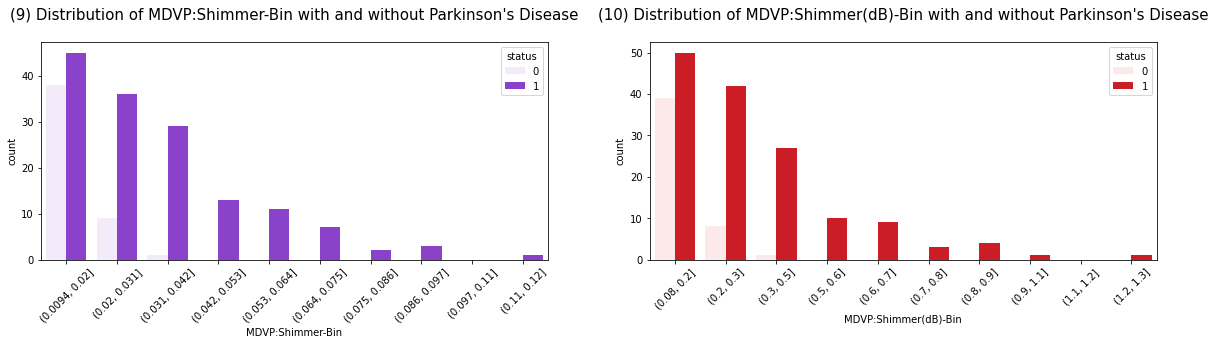

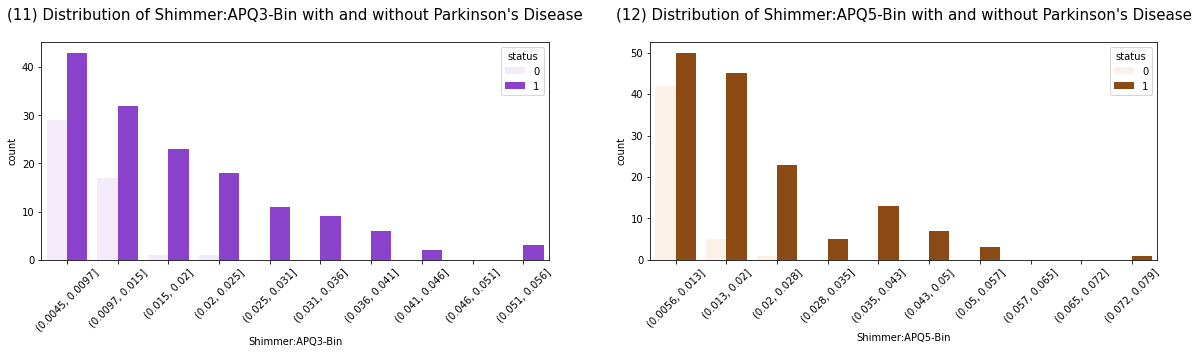

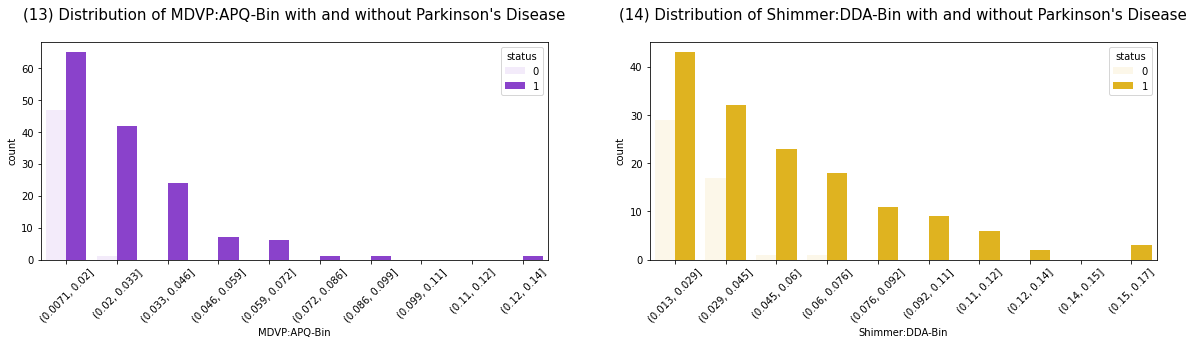

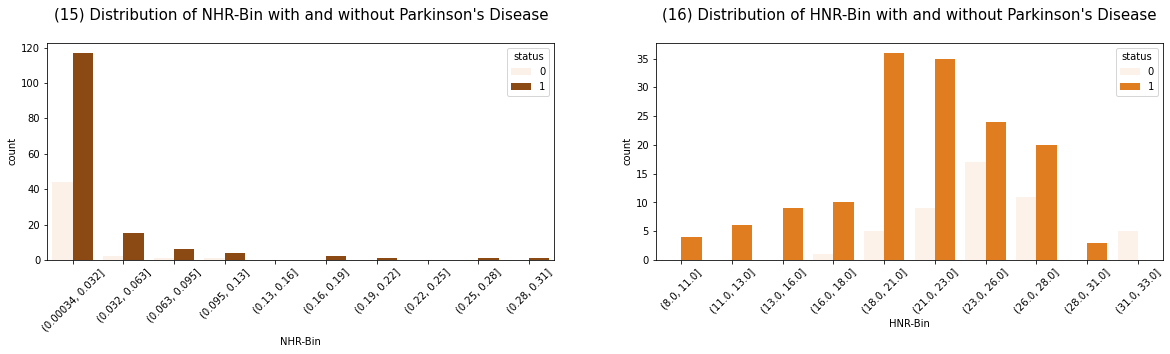

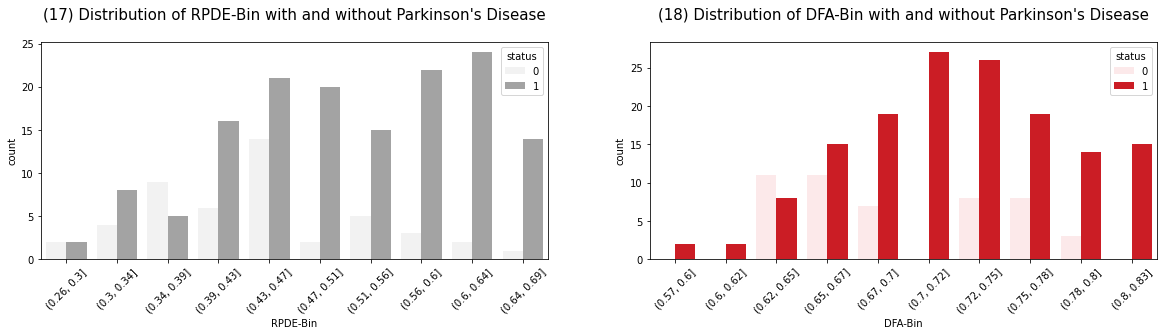

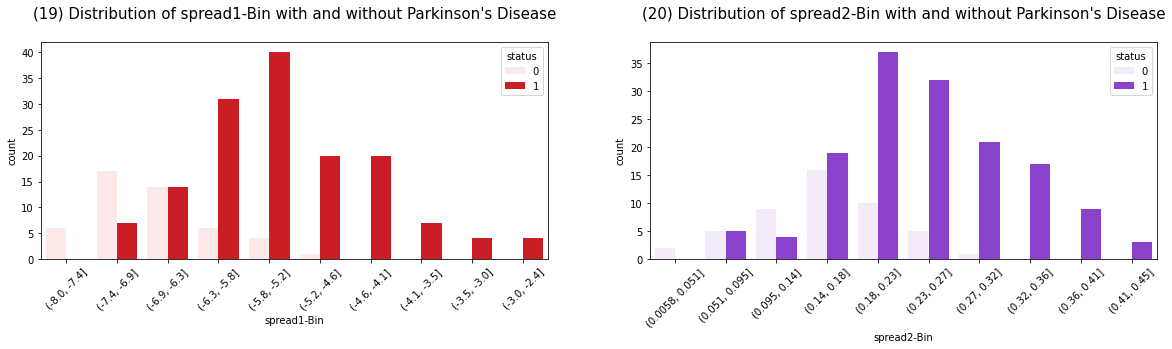

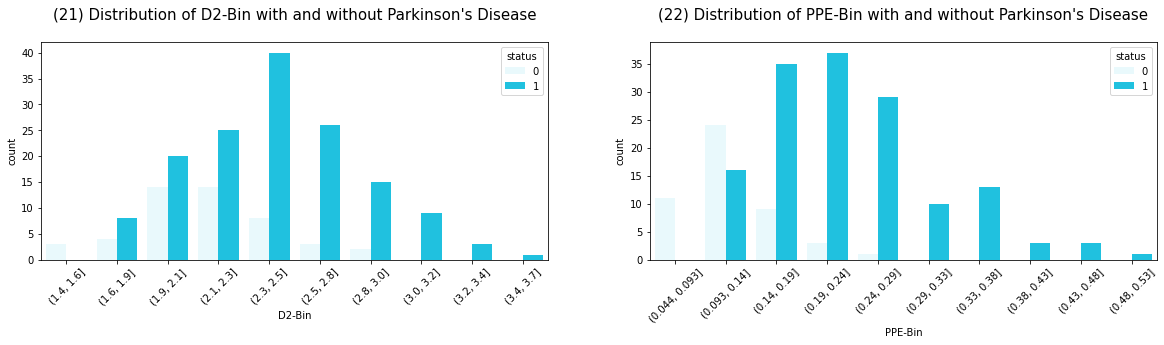

In [24]:
sncp_c2 = sns.color_palette("bright", 200)
num_cols=2
idx = 0

for color,index in enumerate(tqdm(range(0,len(cat_var_list),2))):
    fig, ax = plt.subplots(1,num_cols,figsize=(20,4)) 
    sns.countplot(df[cat_var_list[index]],hue=df['status'],color=sncp_c2[random.randint(0,100)],ax=ax[0])
    title_txt = re.sub(r'-Bin',"",cat_var_list[index])
    ax[0].set_title(f"({index+1}) Distribution of {cat_var_list[index]} with and without Parkinson's Disease\n",{'fontsize':15})
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 45)

    if (len(cat_var_list) - idx) >=2 :
        sns.countplot(df[cat_var_list[index+1]],hue=df['status'],color=sncp_c2[random.randint(0,100)],ax=ax[1]);
        ax[1].set_title(f"({index+2}) Distribution of {cat_var_list[index+1]} with and without Parkinson's Disease\n",{'fontsize':15})
        ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 45)

    idx = idx +1
clear_output(wait=True) 
plt.show()
    

#### Observations:
1. **MDVP:Fo(Hz)** : By large PWP have average fundamental frequency between 106 to 123Hz.
2. **MDVP:Fhi(Hz)** : By large PWP have maximum fundamental frequency between 102Hz to 200Hz
3. **MDVP:Flo(Hz)** : By large PWP have minimum fundamental frequency between 65Hz to 118Hz.
4. **Jitter**: PWP have lower jitters i.e lower variation in frequency.
5. **Shimmer** : PWP have lower value of shimmer I,.e variation in the amplitude.
6. **NHR** : PWP have the lowest Noise to Harmonic Ratio i.e 0.00034 to 0.032.
7. **HNR** : PWP have higher Harmonic to Noise Ratio I,.e 18-2

### (11) Visualize proportions for categorical variables

In [25]:
try:
    cats_df1.set_index('Variable',inplace=True)
except:
    pass
cats_df1

Type Categorical_Class  \
Variable                                              
status                Categorical            Binary   
MDVP:Fo(Hz)-Bin       Categorical             Multi   
MDVP:Fhi(Hz)-Bin      Categorical             Multi   
MDVP:Flo(Hz)-Bin      Categorical             Multi   
MDVP:Jitter(%)-Bin    Categorical             Multi   
MDVP:Jitter(Abs)-Bin  Categorical             Multi   
MDVP:RAP-Bin          Categorical             Multi   
MDVP:PPQ-Bin          Categorical             Multi   
Jitter:DDP-Bin        Categorical             Multi   
MDVP:Shimmer-Bin      Categorical             Multi   
MDVP:Shimmer(dB)-Bin  Categorical             Multi   
Shimmer:APQ3-Bin      Categorical             Multi   
Shimmer:APQ5-Bin      Categorical             Multi   
MDVP:APQ-Bin          Categorical             Multi   
Shimmer:DDA-Bin       Categorical             Multi   
NHR-Bin               Categorical             Multi   
HNR-Bin               Categorical             Multi   
RPDE-Bin              Categorical             Multi   
DFA-Bin               Categorical             Multi   
spread1-Bin           Categorical             Multi   
spread2-Bin           Categorical             Multi   
D2-Bin                Categorical             Multi   
PPE-Bin               Categorical             Multi   
MDVP:Fo(Hz)            Continuous               NaN   
MDVP:Fhi(Hz)           Continuous               NaN   
MDVP:Flo(Hz)           Continuous               NaN   
MDVP:Jitter(%)         Continuous               NaN   
MDVP:Jitter(Abs)       Continuous               NaN   
MDVP:RAP               Continuous               NaN   
MDVP:PPQ               Continuous               NaN   
Jitter:DDP             Continuous               NaN   
MDVP:Shimmer           Continuous               NaN   
MDVP:Shimmer(dB)       Continuous               NaN   
Shimmer:APQ3           Continuous               NaN   
Shimmer:APQ5           Continuous               NaN   
MDVP:APQ               Continuous               NaN   
Shimmer:DDA            Continuous               NaN   
NHR                    Continuous               NaN   
HNR                    Continuous               NaN   
RPDE                   Continuous               NaN   
DFA                    Continuous               NaN   
spread1                Continuous               NaN   
spread2                Continuous               NaN   
D2                     Continuous               NaN   
PPE                    Continuous               NaN   
name                      Objects               NaN   

                                                                                                                                                                                                                                                                                                                                                                                                                Uniques  \
Variable                                                                                                                                                                                                                                                                                                                                                                                                                  
status                                                                                                                                                                                                                                                                                                                                                                                                           [1, 0]   
MDVP:Fo(Hz)-Bin                                                            [(106.0, 123.0], (88.0, 106.0], (123.0, 140.0], (140.0, 157.0], (157.0, 174.0], 

In [26]:
df.head()

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

     MDVP:APQ-Bin  Shimmer:DDA-Bin           NHR-Bin       HNR-Bin  \
0   (0.02, 0.033]    (0.06, 0.076]  (0.00034, 0.032]  (21.0, 23.0]   
1  (0.033, 0.046]    (0.092, 0.11]  (0.00034, 0.032]  (18.0, 21.0]   
2  (0.033, 0.046]   (0.076, 0.092]  (0.00034, 0.032]  (18.0, 21.0]   
3  (0.033, 0.046]   (0.076, 0.092]  (0.00034, 0.032]  (18.0, 21.0]   
4  (0.033, 0.046]    (0.092, 0.11]  (0.00034, 0.032]  (18.0, 21.0]   

       RPDE-Bin      DFA-Bin   spread1-Bin   spread2-Bin      D2-Bin  \
0  (0.39, 0.43]  (0.8, 0.83]  (-5.2, -4.6]  (0.23, 0.27]  (2.1, 2.3]   
1  (0.43, 0.47]  (0.8, 0.83]  (-4.1, -3.5]  (0.32, 0.36]  (2.3, 2.5]   
2  (0.43, 0.47]  (0.8, 0.83]  (-4.6, -4.1]  (0.27, 0.32]  (2.3, 2.5]   
3  (0.43, 0.47]  (0.8, 0.83]  (-4.6, -4.1]  (0.32, 0.36]  (2.3, 2.5]   
4  (0.39, 0.43]  (0.8, 0.83]  (-4.1, -3.5]  (0.23, 0.27]  (2.3, 2.5]   

        PPE-Bin  
0  (0.24, 0.29]  
1  (0.33, 0.38]  
2  (0.29, 0.33]  
3  (0.33, 0.38]  
4  (0.38, 0.43]  

[5 rows x 46 columns]

In [27]:
### Plotly Version of the Pie Chart
if 'status' not in cat_var_list:
    cat_var_list.append('status')
# cat_var_list

for cat_vars in cat_var_list:
    data = df[cat_vars].value_counts(normalize=True)
    labels = data.index.values.astype('str')
    count = df[cat_vars].value_counts()
    fig = go.Figure(data=[go.Pie(labels=labels, 
                                 values=count, 
                                 textinfo='percent+value',
                                 insidetextorientation='radial',
                                 rotation=-40,
                                 title=f'<b>{cat_vars}</b>',
                                 hole=0.3
                                )])
    fig.update_layout(
    autosize=True,
    title=dict(
        text=f'<b>Pie Chart for {cat_vars}</b>',
        x=0.5,
        y=0.9,
        font=dict(
            family="Arial",
            size=15,
            color='#000000'
        )
    )
    )
    
    fig.show()

#### Observations:

1. ~28% of samples have average fundamental frequency f0 in the range of 106 to 123Hz. This is by large sample with PD.
2. ~82% of samples have jitter between 0.0016 to 0.008 . This is by large are samples with PD. 
3. ~56% of samples have Relative Amplitude Perturbation in the lowest range of 0.00066 to 0.0028. This is by large are samples with PD.
4. ~82% of samples have lowest NHR in the range of 0.00034 to 0.032. This by large are samples with PD.
5. ~64% of samples have HNR between 18 to 26. This by large are samples with PD.
6. Almost 75% of samples are those with PD.


Principal Components          Features  Cumulative Explained Variance  \
0                   PC0      Shimmer:APQ3                       0.502684   
1                   PC1       MDVP:Fo(Hz)                       0.666058   
2                   PC2               DFA                       0.759909   
3                   PC3      MDVP:Flo(Hz)                       0.814658   
4                   PC4           spread2                       0.864938   
5                   PC5      MDVP:Flo(Hz)                       0.909042   
6                   PC6      MDVP:Fhi(Hz)                       0.938565   
7                   PC7           spread2                       0.956246   
8                   PC8           spread1                       0.971224   
9                   PC9                D2                       0.984749   
10                 PC10               HNR                       0.990051   
11                 PC11          MDVP:APQ                       0.994468   
12                 PC12               NHR                       0.996273   
13                 PC13               PPE                       0.997882   
14                 PC14      Shimmer:APQ5                       0.998644   
15                 PC15  MDVP:Jitter(Abs)                       0.999197   
16                 PC16  MDVP:Shimmer(dB)                       0.999613   
17                 PC17    MDVP:Jitter(%)                       0.999846   
18                 PC18    MDVP:Jitter(%)                       0.999957   
19                 PC19      MDVP:Shimmer                       1.000000   
20                 PC20        Jitter:DDP                       1.000000   
21                 PC21      Shimmer:APQ3                       1.000000   

    Absolute Explained Variance  
0                  5.026841e-01  
1                  1.633742e-01  
2                  9.385052e-02  
3                  5.474926e-02  
4                  5.027985e-02  
5                  4.410452e-02  
6                  2.952223e-02  
7                  1.768095e-02  
8                  1.497833e-02  
9                  1.352560e-02  
10                 5.301467e-03  
11                 4.417021e-03  
12                 1.805413e-03  
13                 1.608632e-03  
14                 7.623206e-04  
15                 5.530085e-04  
16                 4.152375e-04  
17                 2.329329e-04  
18                 1.112709e-04  
19                 4.320387e-05  
20                 1.012908e-08  
21                 1.732024e-09

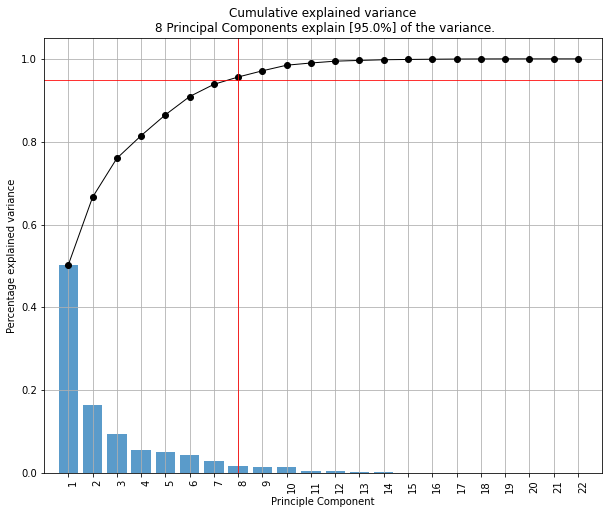

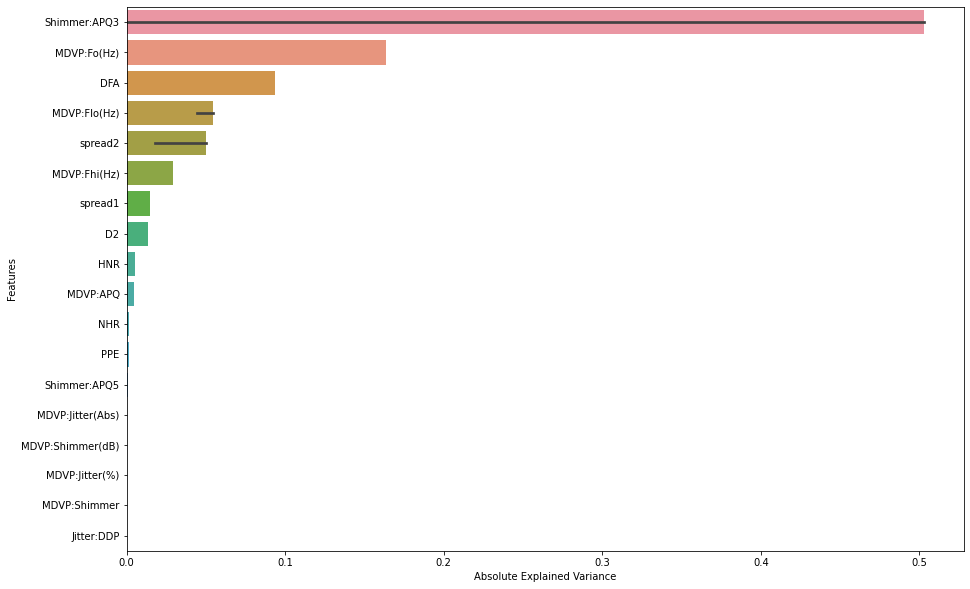

In [28]:
### Principal Component Analysis
from pca import pca
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X,y = df[columns_to_show],df['status']
s_X = MinMaxScaler().fit_transform(X)

pca_model = pca(normalize=False,)
model = pca_model.fit_transform(s_X,col_labels=columns_to_show,verbose=0)
n_pca = model['loadings'].shape[0]

feature_index_pca = [np.abs(model['loadings'].iloc[i]).argmax() for i in range(n_pca)]
pca_f_name = [columns_to_show[feature_index_pca[i]] for i in range(n_pca)]
p_comp_lst = [f"PC{i}" for i in range(n_pca)]
pca_ex_var = model['explained_var']
pca_df = pd.DataFrame({'Principal Components':p_comp_lst,
                       'Features':pca_f_name,
                       'Cumulative Explained Variance':pca_ex_var
                      })
# pca_df['Cumulative Explained Variance %'] = pca_df['Cumulative Explained Variance %'].map(lambda x : round(x*100,4) )
pca_df['Absolute Explained Variance'] = pca_df['Cumulative Explained Variance'].diff()
pca_df['Absolute Explained Variance'].iloc[0] = pca_df['Cumulative Explained Variance'].iloc[0]
display(pca_df)
pca_model.plot();
sns.barplot(y=pca_df['Features'],x=pca_df['Absolute Explained Variance'],orient='h',estimator=max);
# pca_model.biplot(n_feat=10, legend=False);
# pca_model.scatter(legend=True, SPE=True, hotellingt2=True);
# pca_model.scatter3d(legend=True, SPE=True, hotellingt2=True);
# pca_model.biplot3d(n_feat=10, legend=False)
# pca_model.biplot(legend=True, SPE=True, hotellingt2=True)
# pca_model.biplot3d(legend=True, SPE=True, hotellingt2=True)

#### Observations:
1. 8 principal components as shown above explain 95% of the variance in the data.
2. This means that these 8 components can be used model the entire classification instead of 22 variables.

## Summary and Conclusion:
1. We observe that almost all variables have either +ve or -ve correlation with the target variable and also among numeric variables which are statistically significant.
2. The data has significant multi collinearity and the same needs to be handled while modelling.
3. No significant or invalid outliers.
4. PWP have f0(Average fundamental frequency), jitter and shimmer components on the lower side of the scale compared to ones without PD. This could be explained by symptoms of PD that a patient could be suffering from, i.e rigid muscles and hence the speech changes.
5. PWP have lowest NHR and high HNR when compared to the ones without PD.
6. About 95% of the variance could be explained by 8 components i.e about 8 components can be used to model the classification instead of 22 variables.
